In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brainsignal-03/bc3.csv
/kaggle/input/brainsignals/bc1.csv


Cross Validation 

**Cross Validation**

In [5]:
# Logistic Regression

import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform k-fold cross-validation and compute evaluation metrics
accuracy_scores = cross_val_score(logistic_regression_classifier, X_scaled, y, cv=k_fold, scoring='accuracy')
precision_scores = cross_val_score(logistic_regression_classifier, X_scaled, y, cv=k_fold, scoring='precision_weighted')
recall_scores = cross_val_score(logistic_regression_classifier, X_scaled, y, cv=k_fold, scoring='recall_weighted')
f1_scores = cross_val_score(logistic_regression_classifier, X_scaled, y, cv=k_fold, scoring='f1_weighted')

# Compute average scores
accuracy = accuracy_scores.mean()
precision = precision_scores.mean()
recall = recall_scores.mean()
f1 = f1_scores.mean()

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Evaluation Metrics:
Accuracy: 0.8058106995884774
Precision: 0.8013232064297847
Recall: 0.8058106995884774
F1 Score: 0.7987080373122243


In [3]:
!pip install --upgrade scikit-learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print("  Like | Dislike | Neutral")
print("----------------------------")
print(f"Like    | {cm[0,0]} | {cm[0,1]}       | {cm[0,2]}")
print(f"Dislike | {cm[1,0]} | {cm[1,1]}       | {cm[1,2]}")
print(f"Neutral | {cm[2,0]} | {cm[2,1]}       | {cm[2,2]}")

# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])

# Print ROC Curve (False Positive Rate vs True Positive Rate)
print("\nROC Curve:")
for i in range(len(fpr)):
    print(f"False Positive Rate: {fpr[i]}, True Positive Rate: {tpr[i]}")

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
n_estimators: 200
max_depth: 3
Cross-Validation Scores: [0.97242798 0.97382716 0.97436214 0.9736214  0.97526749]
Mean CV Score: 0.9739012345679011
Confusion Matrix:
  Like | Dislike | Neutral
----------------------------
Like    | 71362 | 481       | 66
Dislike | 529 | 35692       | 310
Neutral | 45 | 559       | 12456


ValueError: multiclass format is not supported

Best hyperparameters:
n_estimators: 200
max_depth: 3
Cross-Validation Scores: [0.97242798 0.97382716 0.97436214 0.9736214  0.97526749]
Mean CV Score: 0.9739012345679011
Confusion Matrix:
  Like | Dislike | Neutral
----------------------------
Like    | 71362 | 481       | 66
Dislike | 529 | 35692       | 310
Neutral | 45 | 559       | 12456


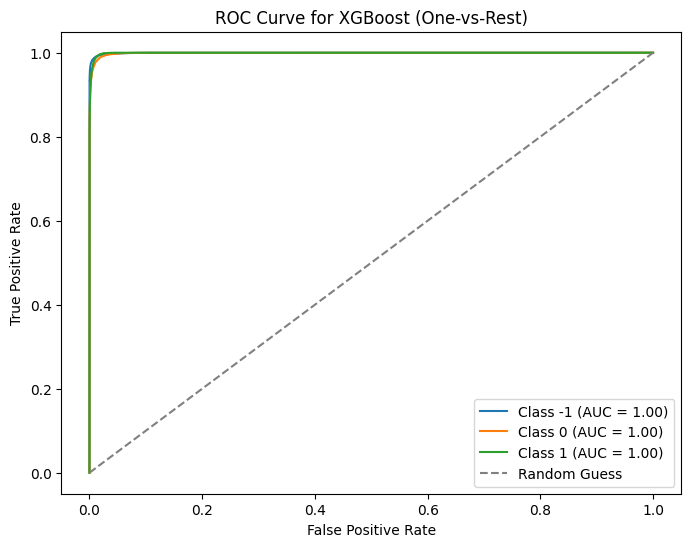


Evaluation Metrics:
Accuracy: 0.9836213991769547
Precision: 0.9836150254664056
Recall: 0.9836213991769547
F1 Score: 0.9836079663943268
Kappa: 0.9700759715148566
ROC AUC: {0: 0.9995451303532061, 1: 0.9990406781365071, 2: 0.9993850831336006}
MCC: 0.9700818610332511


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print("  Like | Dislike | Neutral")
print("----------------------------")
print(f"Like    | {cm[0,0]} | {cm[0,1]}       | {cm[0,2]}")
print(f"Dislike | {cm[1,0]} | {cm[1,1]}       | {cm[1,2]}")
print(f"Neutral | {cm[2,0]} | {cm[2,1]}       | {cm[2,2]}")

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost (One-vs-Rest)')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
n_estimators: 200
max_depth: 3
Cross-Validation Scores: [0.97242798 0.97382716 0.97436214 0.9736214  0.97526749]
Mean CV Score: 0.9739012345679011


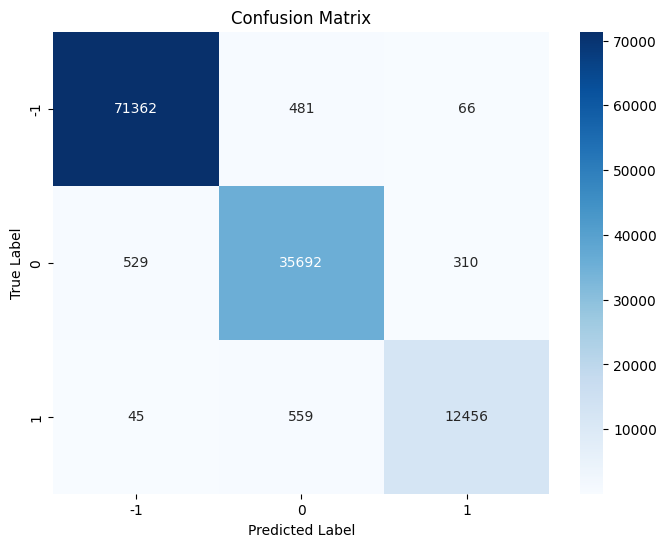

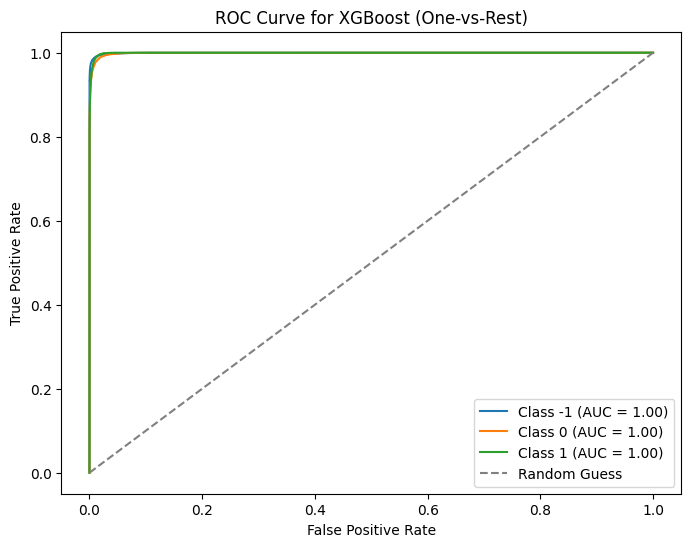


Evaluation Metrics:
Accuracy: 0.9836213991769547
Precision: 0.9836150254664056
Recall: 0.9836213991769547
F1 Score: 0.9836079663943268
Kappa: 0.9700759715148566
ROC AUC: {0: 0.9995451303532061, 1: 0.9990406781365071, 2: 0.9993850831336006}
MCC: 0.9700818610332511


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost (One-vs-Rest)')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
n_estimators: 200
max_depth: 3
Cross-Validation Scores: [0.97242798 0.97382716 0.97436214 0.9736214  0.97526749]
Mean CV Score: 0.9739012345679011


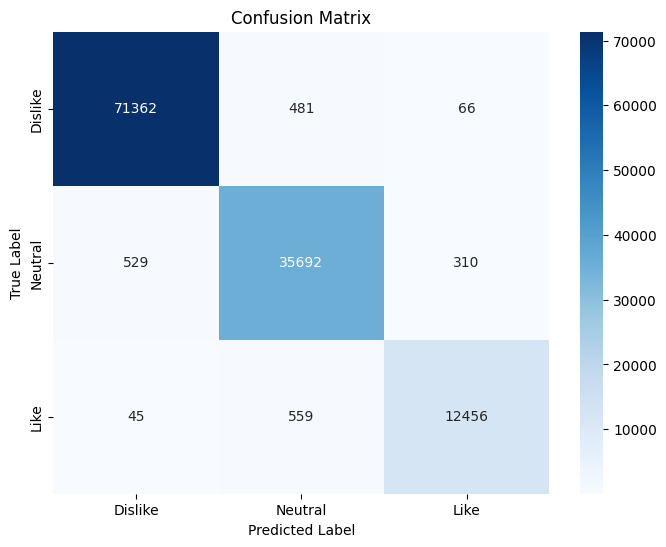

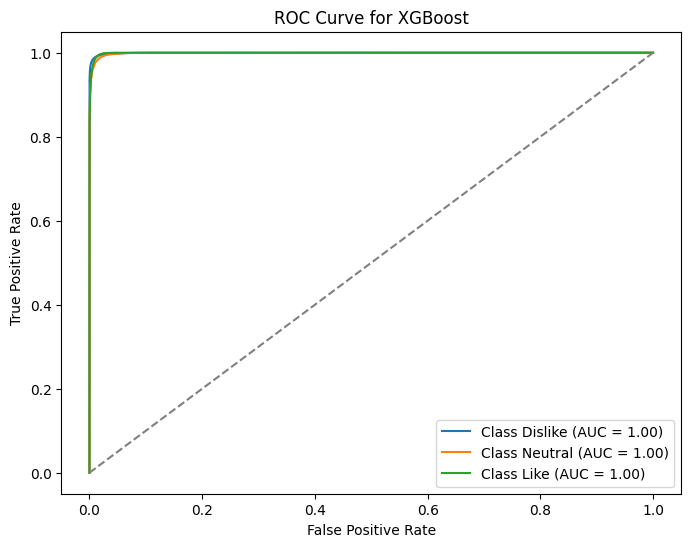


Evaluation Metrics:
Accuracy: 0.9836213991769547
Precision: 0.9836150254664056
Recall: 0.9836213991769547
F1 Score: 0.9836079663943268
Kappa: 0.9700759715148566
ROC AUC: 0.9993236305411046
MCC: 0.9700818610332511


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with the mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
n_estimators: 200
max_depth: 3
Cross-Validation Scores: [0.97242798 0.97382716 0.97436214 0.9736214  0.97526749]
Mean CV Score: 0.9739012345679011


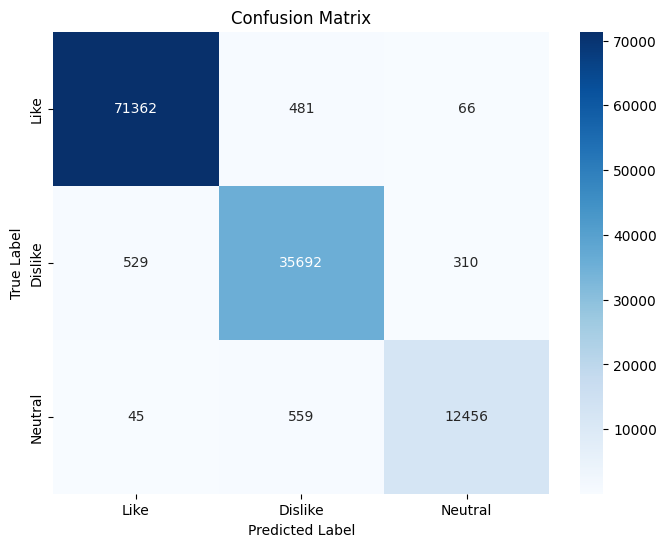

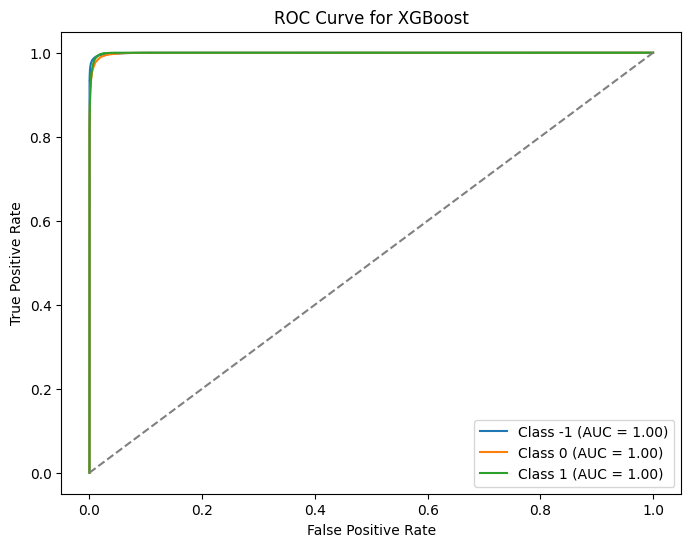


Evaluation Metrics:
Accuracy: 0.9836213991769547
Precision: 0.9836150254664056
Recall: 0.9836213991769547
F1 Score: 0.9836079663943268
Kappa: 0.9700759715148566
ROC AUC: {0: 0.9995451303532061, 1: 0.9990406781365071, 2: 0.9993850831336006}
MCC: 0.9700818610332511


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Like", "Dislike", "Neutral"], yticklabels=["Like", "Dislike", "Neutral"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y == i), y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
n_estimators: 200
max_depth: 5
learning_rate: 0.2
Cross-Validation Scores: [0.96781893 0.96901235 0.96884774 0.96901235 0.96806584]
Mean CV Score: 0.9685514403292181


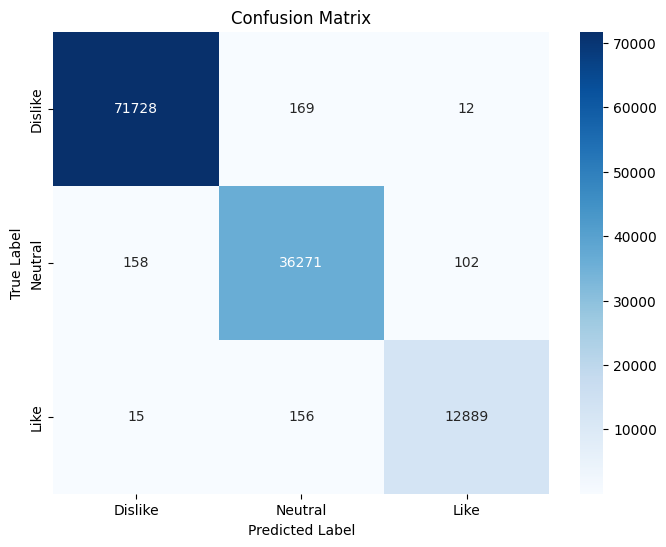

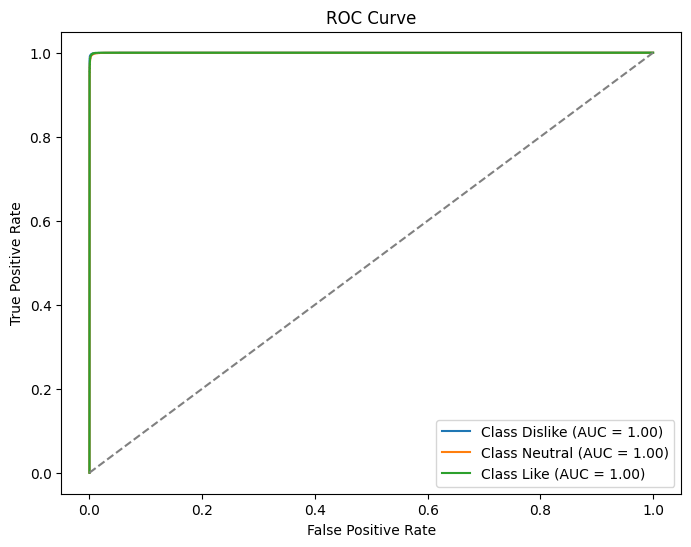


Evaluation Metrics:
Accuracy: 0.9949629629629629
Precision: 0.9949634425461656
Recall: 0.9949629629629629
F1 Score: 0.9949624567725652
Kappa: 0.9908032111313486
ROC AUC: 0.9999186936227851
MCC: 0.9908036814964509


In [1]:
#XGBoost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]  # Adding learning rate
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])
print("learning_rate:", best_xgb_classifier.get_params()['learning_rate'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
n_estimators: 200
max_depth: 5
learning_rate: 0.2
Cross-Validation Scores: [0.96781893 0.96901235 0.96884774 0.96901235 0.96806584]
Mean CV Score: 0.9685514403292181


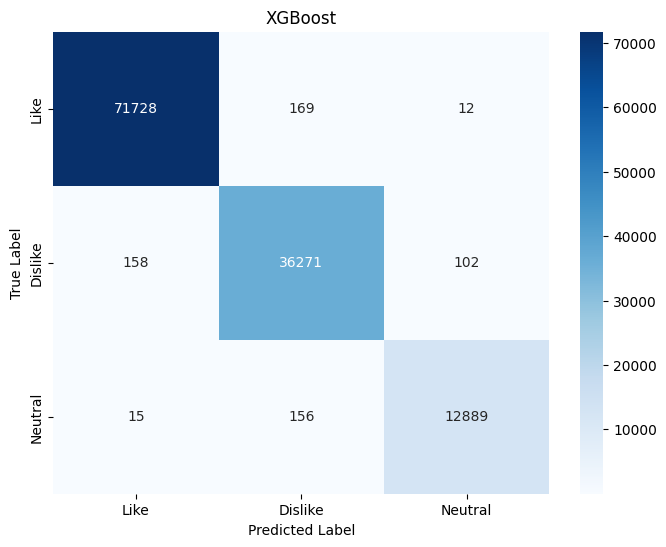

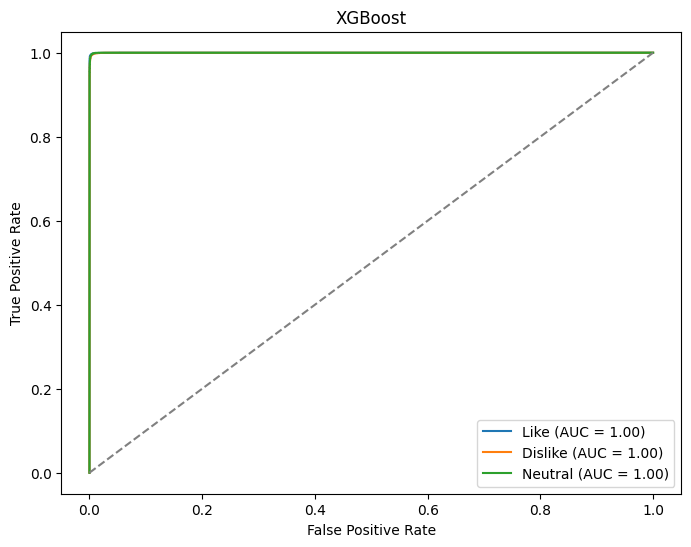


Evaluation Metrics:
Accuracy: 0.9949629629629629
Precision: 0.9949634425461656
Recall: 0.9949629629629629
F1 Score: 0.9949624567725652
Kappa: 0.9908032111313486
ROC AUC: 0.9999186936227851
MCC: 0.9908036814964509


In [2]:
#XCBoost
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]  # Adding learning rate
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])
print("learning_rate:", best_xgb_classifier.get_params()['learning_rate'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Labeling in the specified order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
n_estimators: 200
max_depth: 5
learning_rate: 0.2
Cross-Validation Scores: [0.96781893 0.96901235 0.96884774 0.96901235 0.96806584]
Mean CV Score: 0.9685514403292181


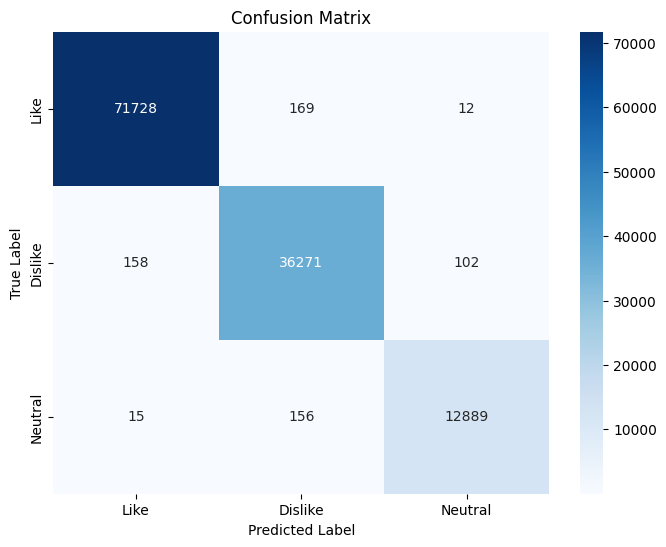

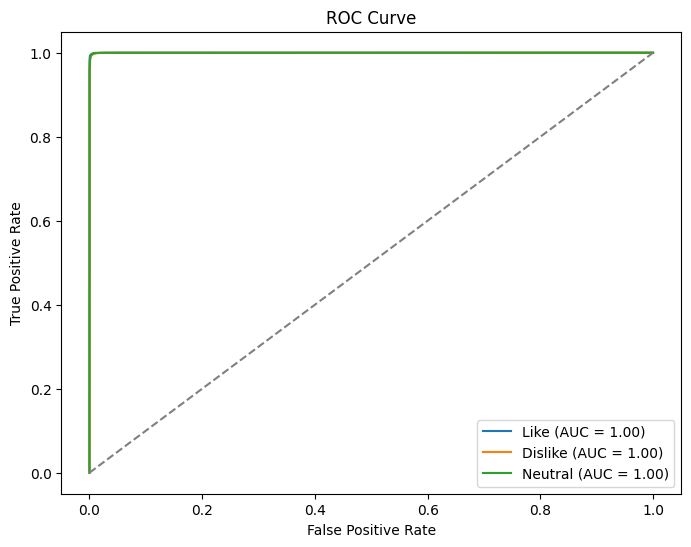


Evaluation Metrics:
Accuracy: 0.9949629629629629
Precision: 0.9949634425461656
Recall: 0.9949629629629629
F1 Score: 0.9949624567725652
Kappa: 0.9908032111313486
ROC AUC: 0.9999186936227851
MCC: 0.9908036814964509


In [1]:
#XCBoost
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]  # Adding learning rate
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])
print("learning_rate:", best_xgb_classifier.get_params()['learning_rate'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Labeling in the specified order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Cross validation. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(gb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Fit the classifier on the entire dataset
gb_classifier.fit(X_scaled, y)

# Predict probabilities for each class
y_pred_proba = gb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = gb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Gradient Boosting Algorithm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Gradient Boosting Classifier with default parameters
gb_classifier = GradientBoostingClassifier()

# Fit the classifier on the entire dataset
gb_classifier.fit(X_scaled, y)

# Predict probabilities for each class
y_pred_proba = gb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = gb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Gradient Boosting Algorithm

# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

# Train the Gradient Boosting classifier
gb_classifier.fit(X_scaled, y)

# Predict probabilities for each class
y_pred_proba = gb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = gb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Labeling in the specified order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Gradient Bosting Algorithms


# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]  # Adding learning rate
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_gb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_gb_classifier.n_estimators)
print("max_depth:", best_gb_classifier.max_depth)
print("learning_rate:", best_gb_classifier.learning_rate)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_gb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_gb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_gb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Labeling in the specified order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [12]:
#Gradient Boosting Algorithm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]  # Adding learning rate
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_gb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_gb_classifier.n_estimators)
print("max_depth:", best_gb_classifier.max_depth)
print("learning_rate:", best_gb_classifier.learning_rate)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_gb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_gb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_gb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


KeyboardInterrupt: 

In [ ]:
#Gradient Boosting Algorithm

# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]  # Adding learning rate
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_gb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_gb_classifier.n_estimators)
print("max_depth:", best_gb_classifier.max_depth)
print("learning_rate:", best_gb_classifier.learning_rate)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_gb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_gb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_gb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Labeling in the specified order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


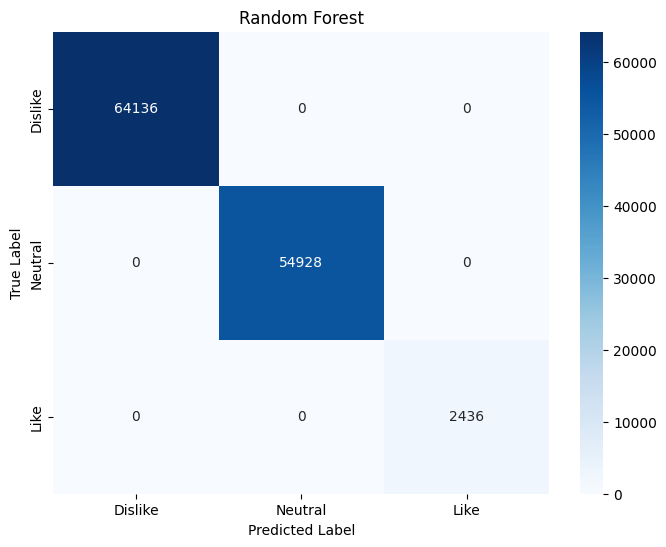

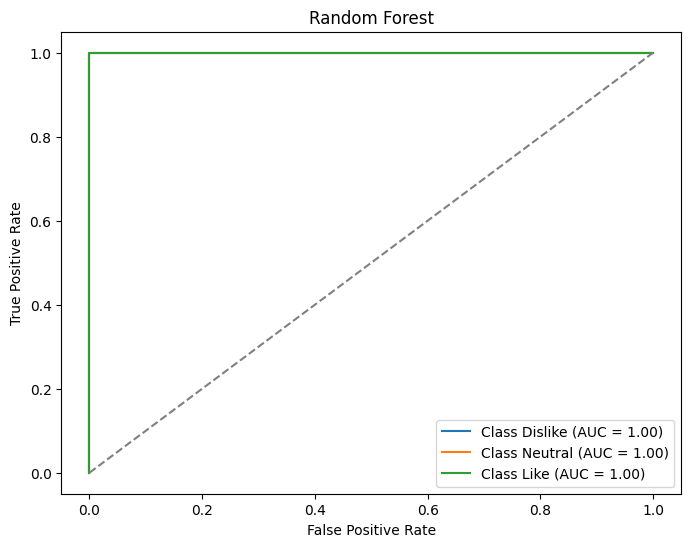


Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Kappa: 1.0
ROC AUC: 1.0
MCC: 1.0


In [1]:
#Random Forest Algorithm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Train the Random Forest classifier
rf_classifier.fit(X_scaled, y)

# Predict probabilities for each class
y_pred_proba = rf_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = rf_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Random Forest Algorithm 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_rf_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_rf_classifier.n_estimators)
print("max_depth:", best_rf_classifier.max_depth)
print("min_samples_split:", best_rf_classifier.min_samples_split)
print("min_samples_leaf:", best_rf_classifier.min_samples_leaf)

# Predict the labels for the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest')
plt.show()

# Predict probabilities for each class
y_pred_proba = best_rf_classifier.predict_proba(X_test)

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("MCC:", mcc)


In [ ]:
#Random Forest Algorithms

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_rf_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_rf_classifier.n_estimators)
print("max_depth:", best_rf_classifier.max_depth)
print("min_samples_split:", best_rf_classifier.min_samples_split)
print("min_samples_leaf:", best_rf_classifier.min_samples_leaf)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_rf_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_rf_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_rf_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Support Vector Machine 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1],
    'kernel': ['rbf', 'linear']
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_svc_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("C:", best_svc_classifier.C)
print("gamma:", best_svc_classifier.gamma)
print("kernel:", best_svc_classifier.kernel)

# Predict the labels for the test set
y_pred = best_svc_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM')
plt.show()

# Predict probabilities for each class
y_pred_proba = best_svc_classifier.predict_proba(X_test)

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("MCC:", mcc)


In [ ]:
#Support Vector Machine 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_svc_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("C:", best_svc_classifier.C)
print("gamma:", best_svc_classifier.gamma)
print("kernel:", best_svc_classifier.kernel)

# Predict the labels for the test set
y_pred = best_svc_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM')
plt.show()

# Predict probabilities for each class
y_pred_proba = best_svc_classifier.predict_proba(X_test)

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("MCC:", mcc)


In [ ]:
#Support Vector Machine 

# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Support Vector Machine
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_svm_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("C:", best_svm_classifier.C)
print("gamma:", best_svm_classifier.gamma)
print("kernel:", best_svm_classifier.kernel)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_svm_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_svm_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_svm_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Labeling in the specified order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
max_depth: 10
min_samples_split: 2
min_samples_leaf: 4
Cross-Validation Scores: [0.85534979 0.84971193 0.8390535  0.85144033 0.84897119]
Mean CV Score: 0.8489053497942386


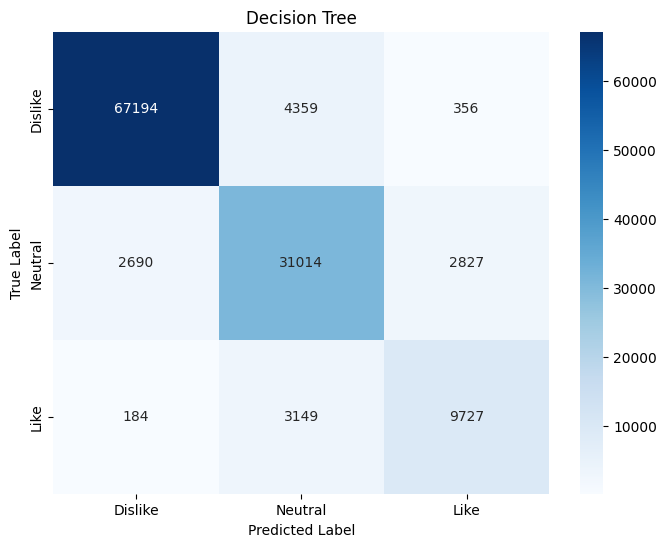

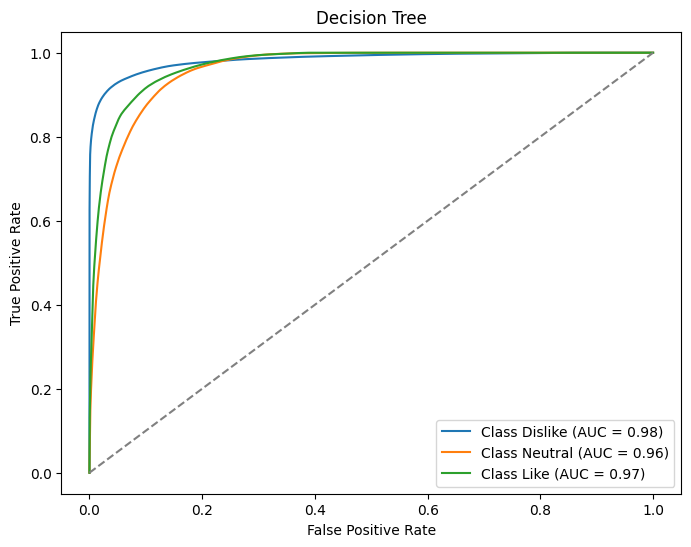


Evaluation Metrics:
Accuracy: 0.8883539094650206
Precision: 0.8906218379520973
Recall: 0.8883539094650206
F1 Score: 0.8892159864499134
Kappa: 0.797720655872046
ROC AUC: 0.9707096298377295
MCC: 0.7981020725003004


In [10]:
#Decision Tree Algorithms
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("max_depth:", best_dt_classifier.max_depth)
print("min_samples_split:", best_dt_classifier.min_samples_split)
print("min_samples_leaf:", best_dt_classifier.min_samples_leaf)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_dt_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_dt_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
max_depth: 10
min_samples_split: 2
min_samples_leaf: 4
Cross-Validation Scores: [0.85530864 0.84987654 0.83884774 0.85115226 0.8490535 ]
Mean CV Score: 0.8488477366255143


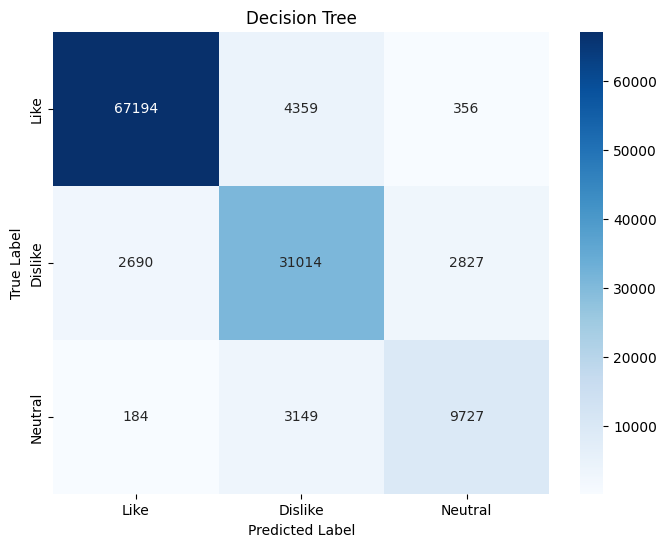

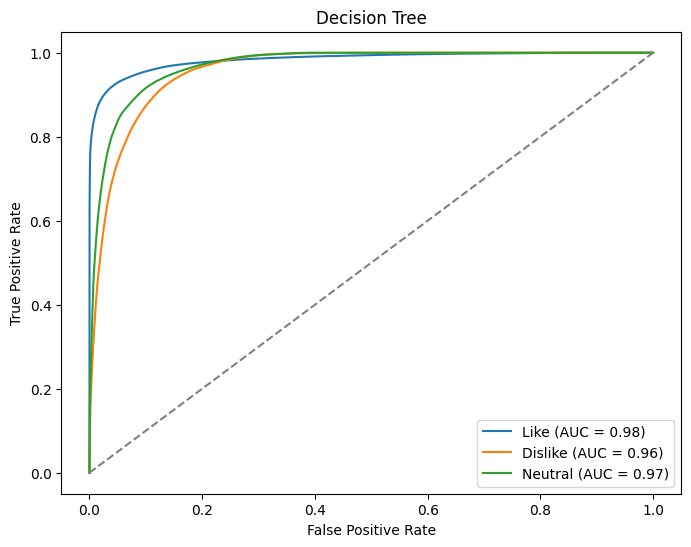


Evaluation Metrics:
Accuracy: 0.8883539094650206
Precision: 0.8906218379520973
Recall: 0.8883539094650206
F1 Score: 0.8892159864499134
Kappa: 0.797720655872046
ROC AUC: 0.9707096298377295
MCC: 0.7981020725003004


In [9]:
#Decision Tree Algorithms

# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("max_depth:", best_dt_classifier.max_depth)
print("min_samples_split:", best_dt_classifier.min_samples_split)
print("min_samples_leaf:", best_dt_classifier.min_samples_leaf)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_dt_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_dt_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Labeling in the specified order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Cross-Validation Scores: [0.82402263 0.82350823 0.82824074 0.81985597 0.82572016]
Mean CV Score: 0.8242695473251029


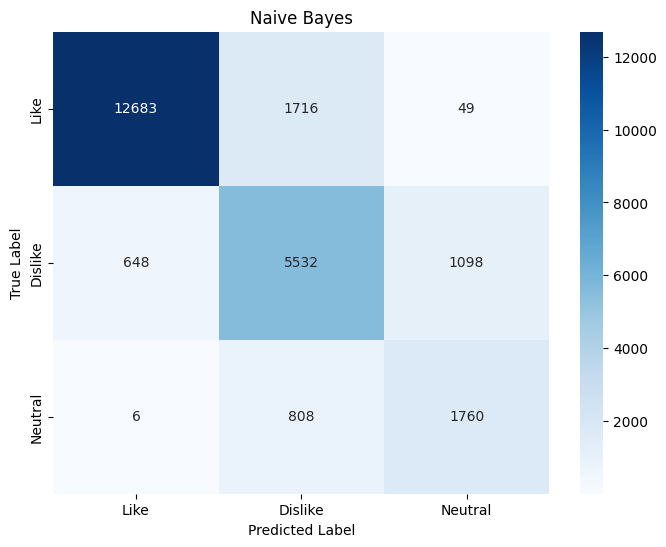

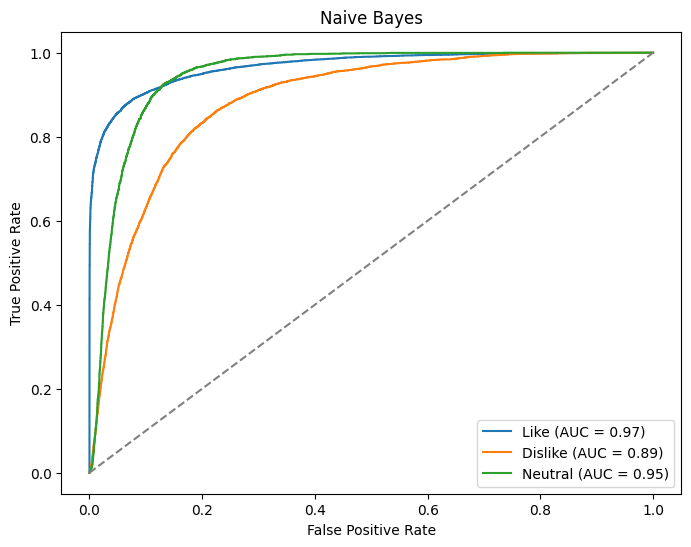


Evaluation Metrics:
Accuracy: 0.8220164609053497
Precision: 0.8352124796561442
Recall: 0.8220164609053497
F1 Score: 0.8269354466499701
Kappa: 0.6831385650408599
ROC AUC: 0.9336145851810599
MCC: 0.6853825960454624


In [6]:
#Naive Bayes Algorithms

# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(nb_classifier, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = nb_classifier.predict_proba(X_test_scaled)

# Predict the labels
y_pred = nb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Labeling in the specified order

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Cross-Validation Scores: [0.82402263 0.82350823 0.82824074 0.81985597 0.82572016]
Mean CV Score: 0.8242695473251029


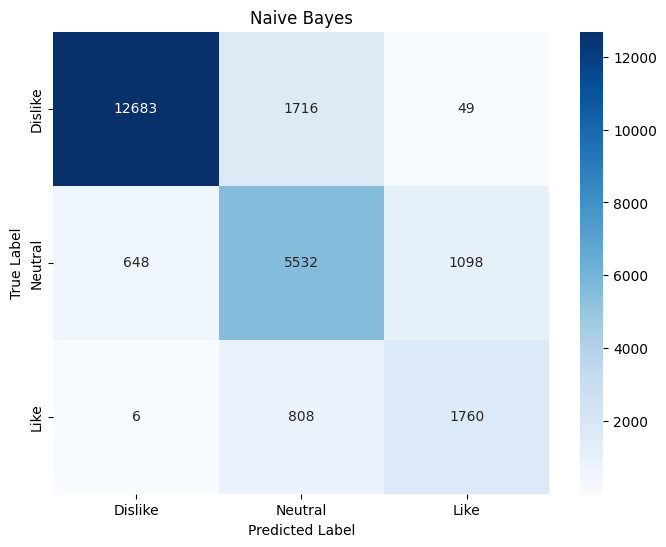

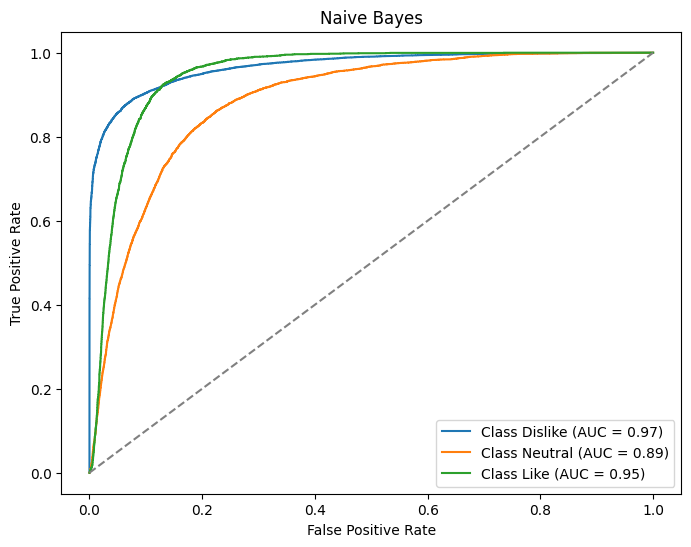


Evaluation Metrics:
Accuracy: 0.8220164609053497
Precision: 0.8352124796561442
Recall: 0.8220164609053497
F1 Score: 0.8269354466499701
Kappa: 0.6831385650408599
MCC: 0.6853825960454624


In [11]:
#Naive Bayes Algorithms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(naive_bayes_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict the labels for the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes')
plt.show()

# Calculate ROC Curve for each class (using decision function)
y_score = naive_bayes_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("MCC:", mcc)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best hyperparameters:
C: 100
penalty: l2
Cross-Validation Scores: [0.80563786 0.80674897 0.79946502 0.80563786 0.81111111]
Mean CV Score: 0.8057201646090535


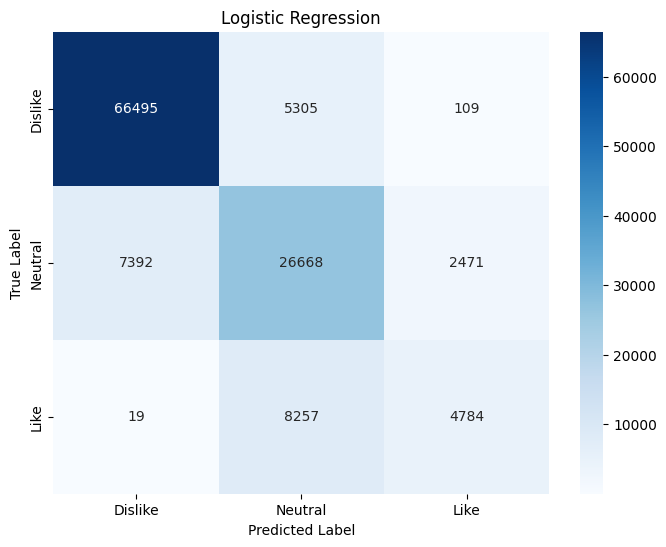

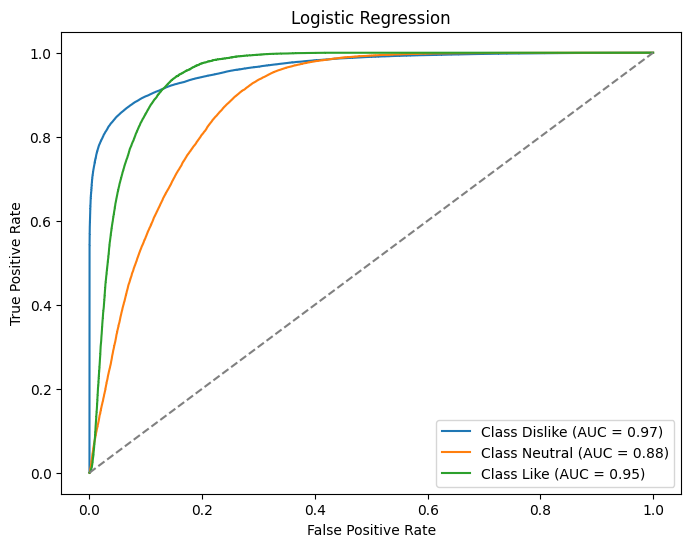


Evaluation Metrics:
Accuracy: 0.8061481481481482
Precision: 0.801634699444612
Recall: 0.8061481481481482
F1 Score: 0.7990570236798461
Kappa: 0.6369302421630147
ROC AUC: 0.9325584230557258
MCC: 0.6392340943043674


In [8]:
#Logistic Regression
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with the mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_lr_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("C:", best_lr_classifier.C)
print("penalty:", best_lr_classifier.penalty)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_lr_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_lr_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_lr_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best hyperparameters:
C: 10
penalty: l2
Cross-Validation Scores: [0.80838477 0.80565844 0.8061214  0.80555556 0.80509259]
Mean CV Score: 0.8061625514403292


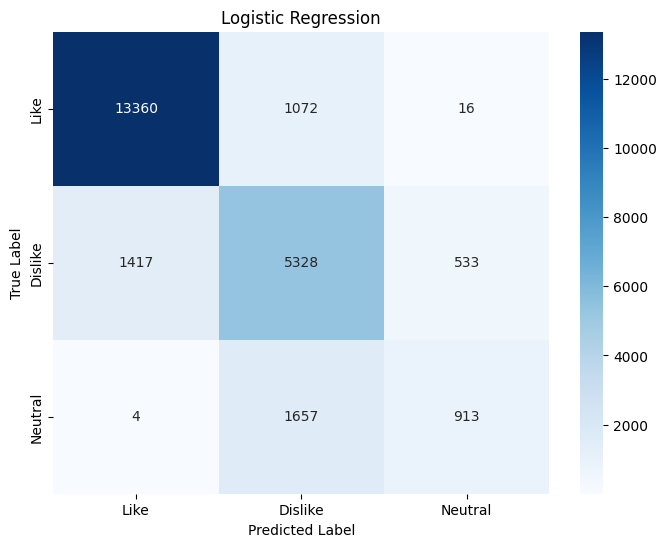

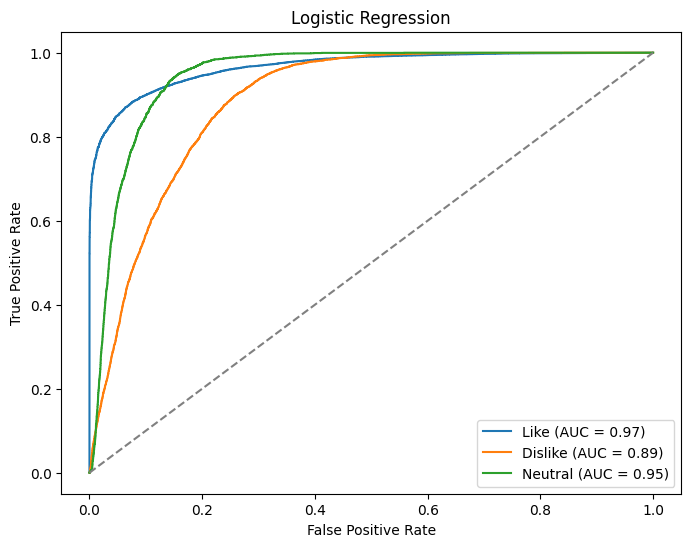


Evaluation Metrics:
Accuracy: 0.8066255144032922
Precision: 0.8016172652372577
Recall: 0.8066255144032922
F1 Score: 0.7995755623289497
Kappa: 0.6369664400335027
ROC AUC: 0.9325919755099242
MCC: 0.6391916491773889


In [7]:
#Logistic Regression Algorithms

# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best classifier after hyperparameter optimization
best_lr_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("C:", best_lr_classifier.C)
print("penalty:", best_lr_classifier.penalty)

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_lr_classifier, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_lr_classifier.predict_proba(X_test_scaled)

# Predict the labels
y_pred = best_lr_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Labeling in the specified order

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Gradient Boosting
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_gb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_gb_classifier.get_params()['n_estimators'])
print("max_depth:", best_gb_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_gb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_gb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_gb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Like", "Dislike", "Neutral"], yticklabels=["Like", "Dislike", "Neutral"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y == i, y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting ')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Gradient Boosting 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Gradient Boosting
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_gb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_gb_classifier.get_params()['n_estimators'])
print("max_depth:", best_gb_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_gb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_gb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_gb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y == i, y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameter: 100
Cross-Validation Scores: [0.80563786 0.80674897 0.79946502 0.80563786 0.81111111]
Mean CV Score: 0.8057201646090535


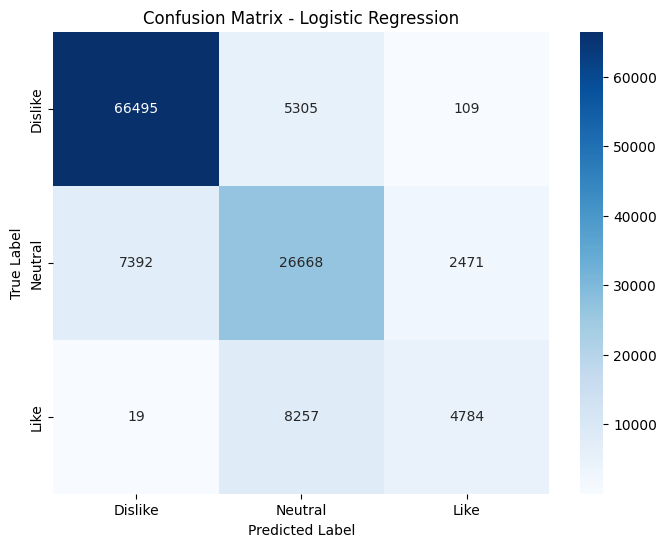

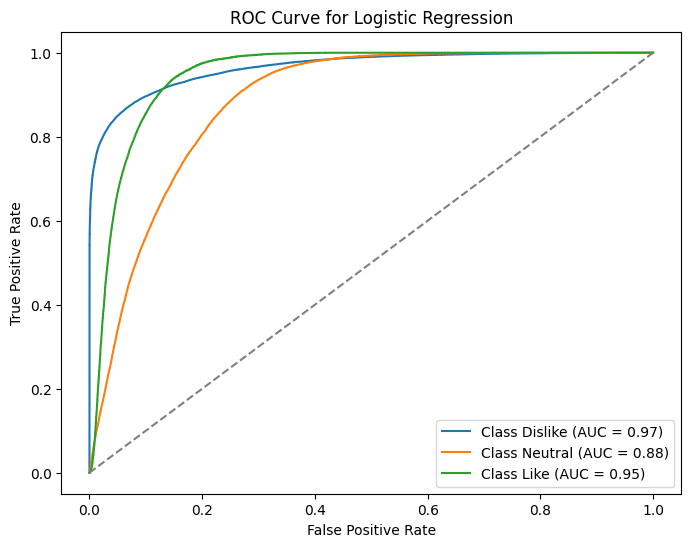


Evaluation Metrics:
Accuracy: 0.8061481481481482
Precision: 0.801634699444612
Recall: 0.8061481481481482
F1 Score: 0.7990570236798461
Kappa: 0.6369302421630147
ROC AUC: 0.9325584230557258
MCC: 0.6392340943043674


In [1]:
#Logistic Regression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Read the CSV file
df = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with the mean value for each feature
df.fillna(df.mean(), inplace=True)

# Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_lr_classifier = grid_search.best_estimator_

# Print the best hyperparameter
print("Best hyperparameter:", best_lr_classifier.get_params()['C'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_lr_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_lr_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_lr_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Cross-Validation Scores: [0.81242798 0.82135802 0.82481481 0.82872428 0.82786008]
Mean CV Score: 0.823037037037037


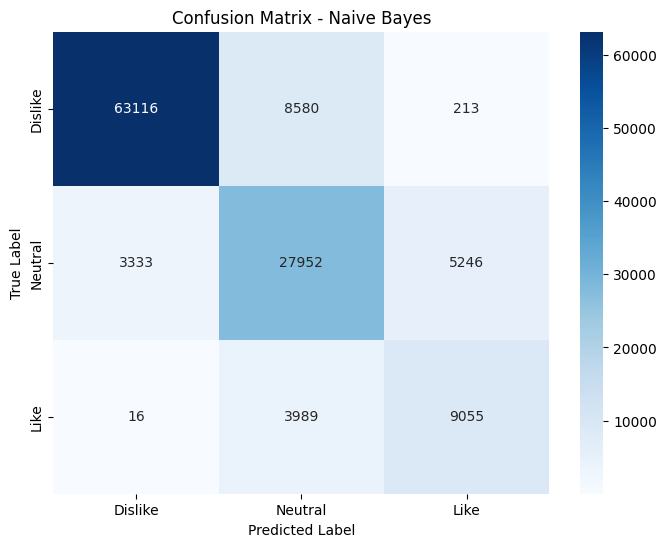

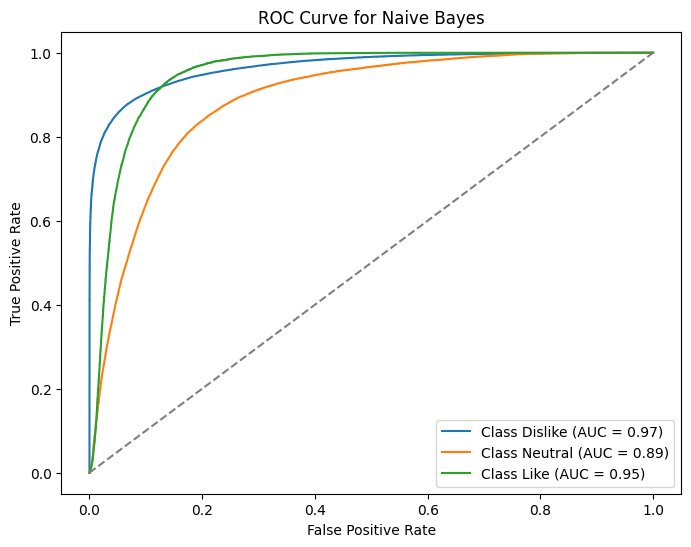


Evaluation Metrics:
Accuracy: 0.8240576131687243
Precision: 0.8364872947091714
Recall: 0.8240576131687243
F1 Score: 0.8286520884413366
Kappa: 0.6875607191069073
ROC AUC: 0.9343280909936299
MCC: 0.6897444593570266


In [2]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Define Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(nb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Train the Naive Bayes classifier
nb_classifier.fit(X_scaled, y)

# Predict probabilities for each class
y_pred_proba = nb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = nb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameter: 10
Cross-Validation Scores: [0.85395062 0.84806584 0.8381893  0.85057613 0.84921811]
Mean CV Score: 0.8480000000000001


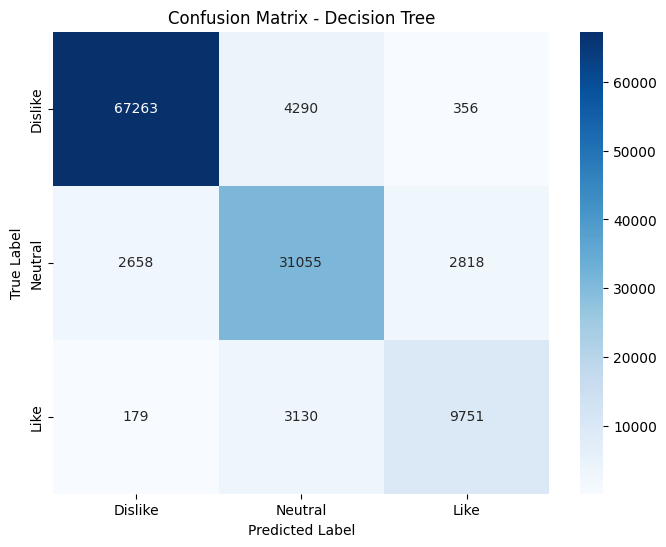

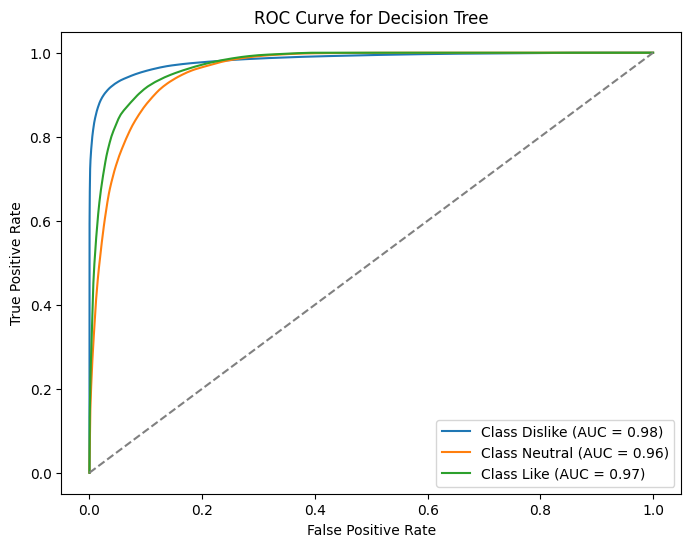


Evaluation Metrics:
Accuracy: 0.8894567901234568
Precision: 0.8916670093373874
Recall: 0.8894567901234568
F1 Score: 0.89030137142456
Kappa: 0.7996996691475449
ROC AUC: 0.9707216685547171
MCC: 0.8000666012093224


In [3]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid for Decision Tree
param_grid = {'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameter
print("Best hyperparameter:", best_dt_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_dt_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_dt_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameter: 10
Cross-Validation Scores: [0.85489712 0.84868313 0.83790123 0.85041152 0.84930041]
Mean CV Score: 0.848238683127572


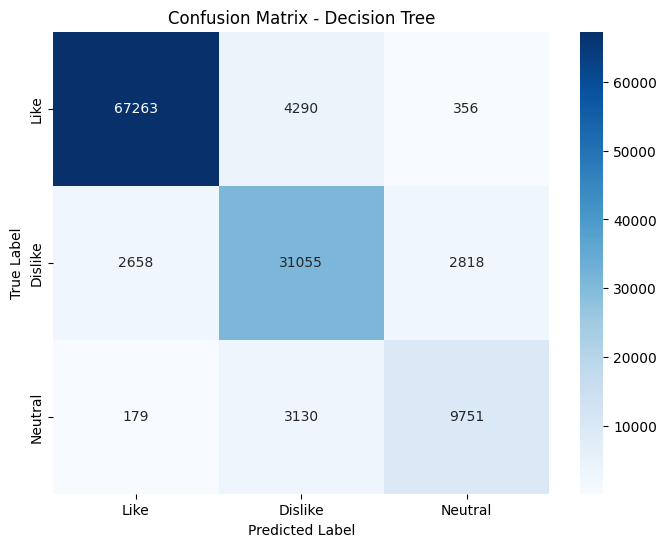

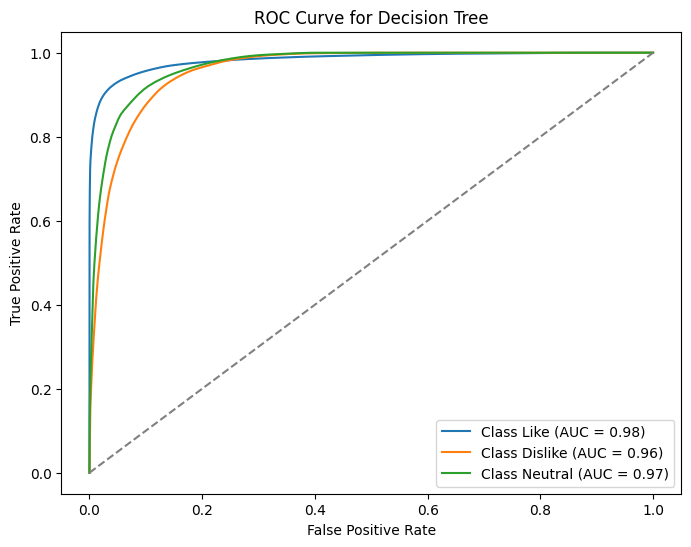


Evaluation Metrics:
Accuracy: 0.8894567901234568
Precision: 0.8916670093373874
Recall: 0.8894567901234568
F1 Score: 0.89030137142456
Kappa: 0.7996996691475449
ROC AUC: 0.9707216685547171
MCC: 0.8000666012093224


In [6]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid for Decision Tree
param_grid = {'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameter
print("Best hyperparameter:", best_dt_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_dt_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_dt_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Adjusted label order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Decision Tree. 

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Define the hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy'
)
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("max_depth:", best_dt_classifier.get_params()['max_depth'])
print("min_samples_split:", best_dt_classifier.get_params()['min_samples_split'])
print("min_samples_leaf:", best_dt_classifier.get_params()['min_samples_leaf'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_dt_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_dt_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
max_depth: 10
min_samples_split: 2
min_samples_leaf: 4
Cross-Validation Scores: [0.85465021 0.84942387 0.83880658 0.85115226 0.84946502]
Mean CV Score: 0.8486995884773663


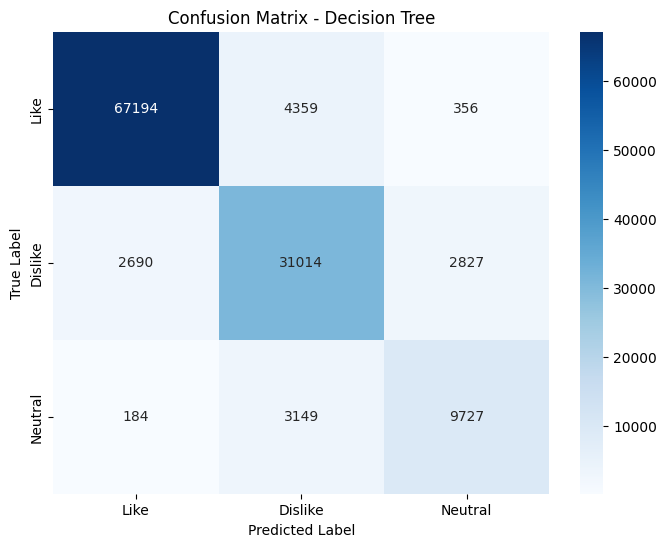

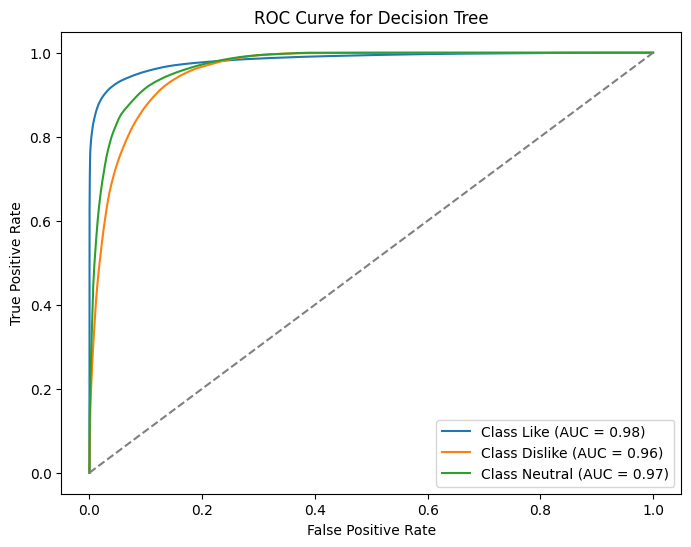


Evaluation Metrics:
Accuracy: 0.8883539094650206
Precision: 0.8906218379520973
Recall: 0.8883539094650206
F1 Score: 0.8892159864499134
Kappa: 0.797720655872046
ROC AUC: 0.9707096298377295
MCC: 0.7981020725003004


In [7]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Define the hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy'
)
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("max_depth:", best_dt_classifier.get_params()['max_depth'])
print("min_samples_split:", best_dt_classifier.get_params()['min_samples_split'])
print("min_samples_leaf:", best_dt_classifier.get_params()['min_samples_leaf'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_dt_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_dt_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']  # Adjusted label order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
max_depth: 10
min_samples_split: 10
min_samples_leaf: 4
Cross-Validation Scores: [0.85534979 0.84958848 0.83884774 0.85139918 0.84909465]
Mean CV Score: 0.8488559670781892


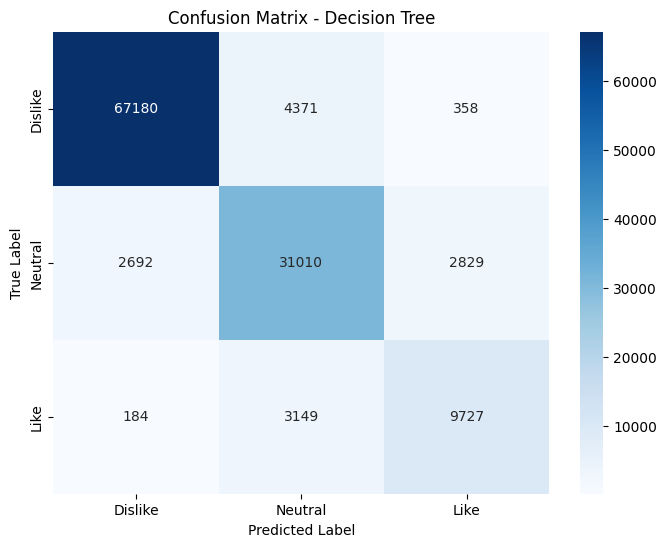

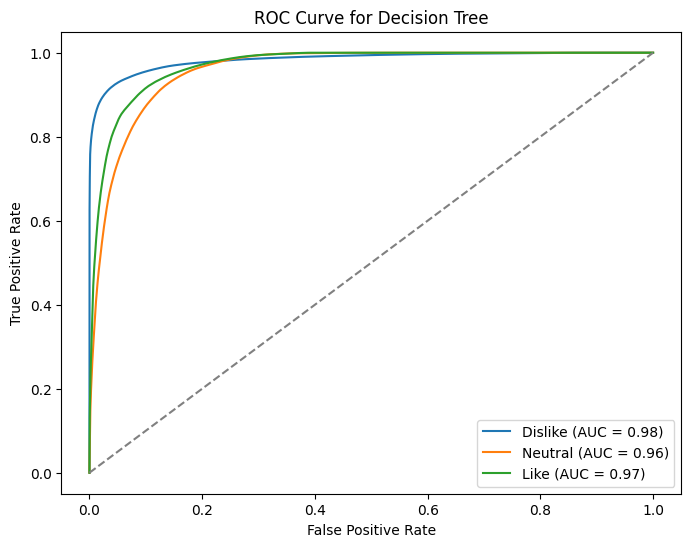


Evaluation Metrics:
Accuracy: 0.8882057613168725
Precision: 0.8904942240486995
Recall: 0.8882057613168725
F1 Score: 0.8890756803653689
Kappa: 0.7974651290013155
ROC AUC: 0.9706515189359335
MCC: 0.7978504111164877


In [8]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Define the hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy'
)
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("max_depth:", best_dt_classifier.get_params()['max_depth'])
print("min_samples_split:", best_dt_classifier.get_params()['min_samples_split'])
print("min_samples_leaf:", best_dt_classifier.get_params()['min_samples_leaf'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_dt_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_dt_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']  # Adjusted label order

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
n_neighbors: 7
p: 1
Cross-Validation Scores: [0.85872428 0.86304527 0.85164609 0.86366255 0.8663786 ]
Mean CV Score: 0.8606913580246912


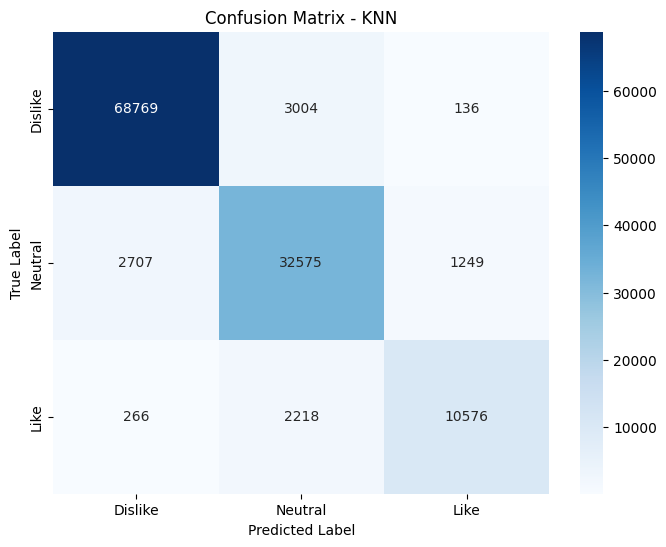

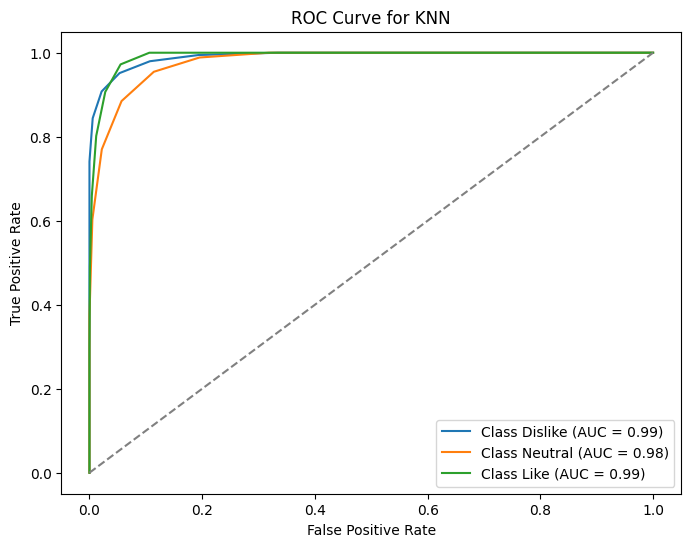


Evaluation Metrics:
Accuracy: 0.9211522633744856
Precision: 0.9214875097131542
Recall: 0.9211522633744856
F1 Score: 0.9210669967800867
Kappa: 0.855701099974794
ROC AUC: 0.9869982405227485
MCC: 0.8558546675201676


In [4]:
#KNN Algorithms

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with the mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for KNN
param_grid = {'n_neighbors': [3, 5, 7], 'p': [1, 2]}  # p = 1 for Manhattan distance, p = 2 for Euclidean distance

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_knn_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_neighbors:", best_knn_classifier.get_params()['n_neighbors'])
print("p:", best_knn_classifier.get_params()['p'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_knn_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_knn_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_knn_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Best hyperparameters:
n_neighbors: 7
p: 1
Cross-Validation Scores: [0.85872428 0.86304527 0.85164609 0.86366255 0.8663786 ]
Mean CV Score: 0.8606913580246912


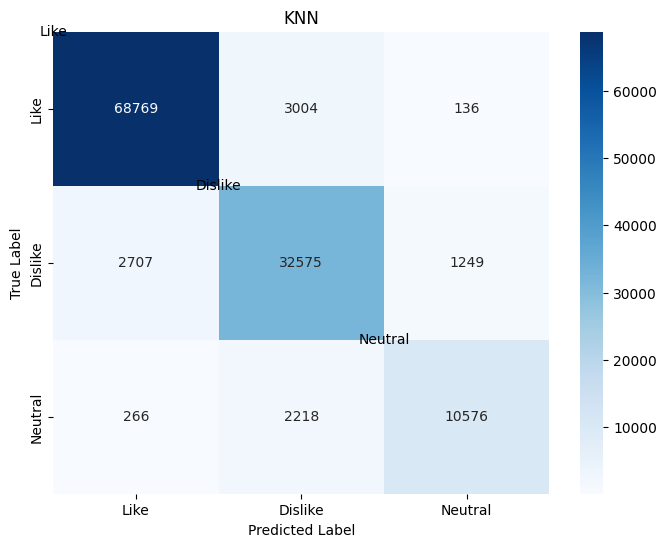

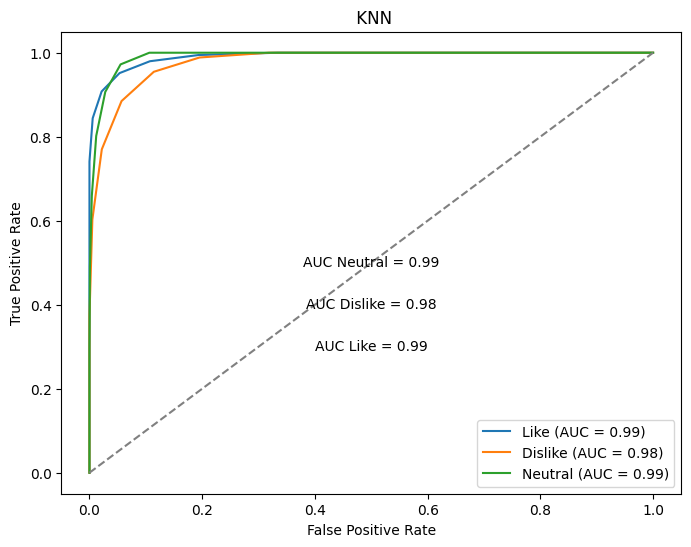


Evaluation Metrics:
Accuracy: 0.9211522633744856
Precision: 0.9214875097131542
Recall: 0.9211522633744856
F1 Score: 0.9210669967800867
Kappa: 0.855701099974794
ROC AUC: 0.9869982405227485
MCC: 0.8558546675201676


In [1]:
#KNN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with the mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for KNN
param_grid = {'n_neighbors': [3, 5, 7], 'p': [1, 2]}  # p = 1 for Manhattan distance, p = 2 for Euclidean distance

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_knn_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_neighbors:", best_knn_classifier.get_params()['n_neighbors'])
print("p:", best_knn_classifier.get_params()['p'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_knn_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_knn_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_knn_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Like', 'Dislike', 'Neutral']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN')

# Labeling specific cells in the confusion matrix
plt.text(0, 0, 'Like', ha='center', va='center')
plt.text(1, 1, 'Dislike', ha='center', va='center')
plt.text(2, 2, 'Neutral', ha='center', va='center')

plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"{confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' KNN')
plt.legend()

# Labeling ROC curve
for i in range(len(label_encoder.classes_)):
    plt.text(0.5, 0.3 + i * 0.1, f"AUC {confusion_labels[i]} = {roc_auc_dict[i]:.2f}", ha='center', va='center')

plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#KNN 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with the mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for KNN
param_grid = {'n_neighbors': [3, 5, 7], 'p': [1, 2]}  # p = 1 for Manhattan distance, p = 2 for Euclidean distance

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_knn_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_neighbors:", best_knn_classifier.get_params()['n_neighbors'])
print("p:", best_knn_classifier.get_params()['p'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_knn_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_knn_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_knn_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Custom Confusion Matrix Labels
confusion_labels = ['Dislike', 'Neutral', 'Like']

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')

# Labeling specific cells in the confusion matrix
plt.text(0, 0, 'Like', ha='center', va='center')
plt.text(1, 1, 'Dislike', ha='center', va='center')
plt.text(2, 2, 'Neutral', ha='center', va='center')

plt.show()

# Calculate ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred_proba[:, i], pos_label=i)
    roc_auc_dict[i] = roc_auc_score(y == i, y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {confusion_labels[i]} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()

# Labeling ROC curve
for i in range(len(label_encoder.classes_)):
    plt.text(0.5, 0.3 + i * 0.1, f"AUC {confusion_labels[i]} = {roc_auc_dict[i]:.2f}", ha='center', va='center')

plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print("  Like | Dislike | Neutral")
print("----------------------------")
print(f"Like    | {cm[0,0]} | {cm[0,1]}       | {cm[0,2]}")
print(f"Dislike | {cm[1,0]} | {cm[1,1]}       | {cm[1,2]}")
print(f"Neutral | {cm[2,0]} | {cm[2,1]}       | {cm[2,2]}")

# Plot ROC Curve
plot_roc_curve(best_xgb_classifier, X_scaled, y)
plt.title("ROC Curve")
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import plot_roc_curve

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:")
print("n_estimators:", best_xgb_classifier.get_params()['n_estimators'])
print("max_depth:", best_xgb_classifier.get_params()['max_depth'])

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print("  Like | Dislike | Neutral")
print("----------------------------")
print(f"Like    | {cm[0,0]} | {cm[0,1]}       | {cm[0,2]}")
print(f"Dislike | {cm[1,0]} | {cm[1,1]}       | {cm[1,2]}")
print(f"Neutral | {cm[2,0]} | {cm[2,1]}       | {cm[2,2]}")

# Plot ROC Curve
plot_roc_curve(best_xgb_classifier, X_scaled, y)
plt.title("ROC Curve")
plt.show()

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [10]:
#XGBOost cross Validation 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_xgb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Cross-Validation Scores: [0.97242798 0.97382716 0.97436214 0.9736214  0.97526749]
Mean CV Score: 0.9739012345679011

Evaluation Metrics:
Accuracy: 0.9836213991769547
Precision: 0.9836150254664056
Recall: 0.9836213991769547
F1 Score: 0.9836079663943268
Kappa: 0.9700759715148566
ROC AUC: 0.9993236305411046
MCC: 0.9700818610332511


In [ ]:
#Gradient Bosting
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Gradient Boosting
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_gb_classifier = grid_search.best_estimator_

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_gb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_gb_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_gb_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Random Forest Algorithm

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_rf_classifier = grid_search.best_estimator_

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_rf_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_rf_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_rf_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Decision  Tree Algorithm 

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Decision Tree
param_grid = {'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_dt_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_dt_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#SVC
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for SVC
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_svc_classifier = grid_search.best_estimator_

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_svc_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_svc_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_svc_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#knn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for KNN
param_grid = {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_knn_classifier = grid_search.best_estimator_

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_knn_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class (not supported by KNN, so we'll skip this part)

# Predict the labels
y_pred = best_knn_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
# roc_auc_score is not applicable for multi-class classification
mcc = matthews_corrcoef(y, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
# Skip printing ROC AUC score as it's not applicable for multi-class classification
print("MCC:", mcc)


In [ ]:
#Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid for Logistic Regression
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best classifier after hyperparameter optimization
best_lr_classifier = grid_search.best_estimator_

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_lr_classifier, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict probabilities for each class
y_pred_proba = best_lr_classifier.predict_proba(X_scaled)

# Predict the labels
y_pred = best_lr_classifier.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling (not required for Naive Bayes)

# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Perform k-fold cross-validation to evaluate the model
cv_scores = cross_val_score(naive_bayes_classifier, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Fit the classifier on the entire dataset (no need to split into train and test for Naive Bayes)
naive_bayes_classifier.fit(X, y)

# Predict probabilities for each class
y_pred_proba = naive_bayes_classifier.predict_proba(X)

# Predict the labels
y_pred = naive_bayes_classifier.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
kappa = cohen_kappa_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


**Hyperparameter optimization**


In [3]:
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the reduced hyperparameter grid for Random Forest
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_rf_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_rf_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Evaluation Metrics:
Accuracy: 0.9153909465020577
Precision: 0.9150748745821287
Recall: 0.9153909465020577
F1 Score: 0.9148297909544106
Kappa: 0.844000538118334
ROC AUC: 0.9853171731466462
MCC: 0.8442169743683314


In [ ]:
#Random Forest1

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters after hyperparameter optimization
best_params = grid_search.best_params_
print("Best Parameters:")
print("n_estimators:", best_params['n_estimators'])
print("max_depth:", best_params['max_depth'])

# Get the best classifier after hyperparameter optimization
best_rf_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_rf_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Random Forest 2
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters after hyperparameter optimization
best_params = grid_search.best_params_
print("Best Parameters:")
print("n_estimators:", best_params['n_estimators'])
print("max_depth:", best_params['max_depth'])
print("min_samples_split:", best_params['min_samples_split'])
print("min_samples_leaf:", best_params['min_samples_leaf'])

# Get the best classifier after hyperparameter optimization
best_rf_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_rf_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [5]:
#XGBoost 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Evaluation Metrics:
Accuracy: 0.973761316872428
Precision: 0.9736841266879294
Recall: 0.973761316872428
F1 Score: 0.9737114137180692
Kappa: 0.9519004697581459
ROC AUC: 0.9984546240289548
MCC: 0.9519097961013945


In [ ]:
#Gradient Boosting algorithm 


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for Gradient Boosting
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters after hyperparameter optimization
best_params = grid_search.best_params_
print("Best Parameters:")
print("n_estimators:", best_params['n_estimators'])
print("max_depth:", best_params['max_depth'])

# Get the best classifier after hyperparameter optimization
best_gb_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_gb_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
XGBoost1
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters after hyperparameter optimization
best_params = grid_search.best_params_
print("Best Parameters:")
print("n_estimators:", best_params['n_estimators'])
print("max_depth:", best_params['max_depth'])

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [5]:
!pip install --upgrade scikit-learn


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
    roc_auc_score,
    matthews_corrcoef,
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=1
)

# Define the hyperparameter grid for XGBoost
param_grid = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(
    xgb.XGBClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)

# Print True Positives, True Negatives, False Positives, False Negatives
for i, label in enumerate(label_encoder.classes_):
    print(f"Class: {label}")
    print(f"True Positives: {cm[i, i]}")
    print(f"True Negatives: {cm[:i, :i].sum() + cm[i+1:, i+1:].sum()}")
    print(f"False Positives: {cm[:, i].sum() - cm[i, i]}")
    print(f"False Negatives: {cm[i, :].sum() - cm[i, i]}")
    print("=" * 20)


Evaluation Metrics:
Accuracy: 0.973761316872428
Precision: 0.9736841266879294
Recall: 0.973761316872428
F1 Score: 0.9737114137180692
Kappa: 0.9519004697581459
ROC AUC: 0.9984546240289548
MCC: 0.9519097961013945
Class: -1
True Positives: 17820
True Negatives: 12100
False Positives: 260
False Negatives: 195
Class: 0
True Positives: 8756
True Negatives: 20822
False Positives: 376
False Negatives: 379
Class: 1
True Positives: 3002
True Negatives: 26989
False Positives: 161
False Negatives: 223


Confusion Matrix:
True Negatives: [17820  8756  3002]
False Positives: [260 376 161]
False Negatives: [195 379 223]
True Positives: [12100 20864 26989]


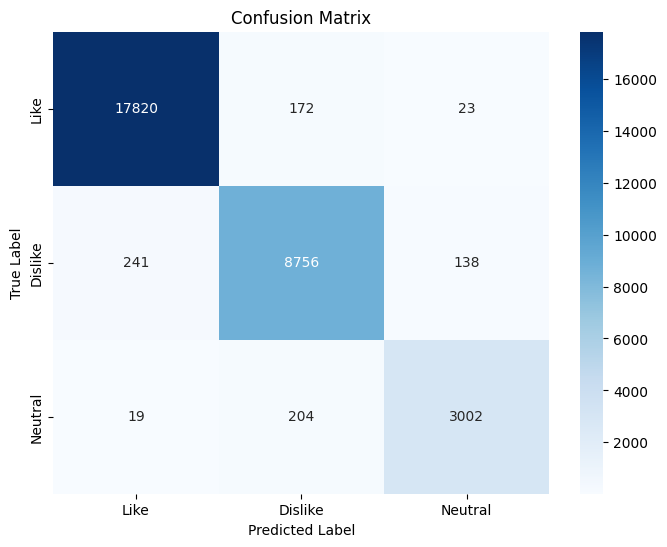

ValueError: multi_class must be in ('ovo', 'ovr')

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_test)

# Calculate True Positives, True Negatives, False Positives, False Negatives
conf_matrix = confusion_matrix(y_test, y_pred)
tn = np.diag(conf_matrix)
fp = np.sum(conf_matrix, axis=0) - tn
fn = np.sum(conf_matrix, axis=1) - tn
tp = np.sum(conf_matrix) - (tn + fp + fn)

# Print Confusion Matrix
print("Confusion Matrix:")
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Create a dictionary for label mapping in confusion matrix
label_mapping = {0: "Like", 1: "Dislike", 2: "Neutral"}

# Plot Confusion Matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=[label_mapping[i] for i in range(len(label_mapping))], columns=[label_mapping[i] for i in range(len(label_mapping))])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test, y_pred_proba[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(label_mapping)):
    plt.plot(fpr[i], tpr[i], label=f"{label_mapping[i]} (AUC = {roc_auc[i]:0.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Confusion Matrix:
True Negatives: [17820  8756  3002]
False Positives: [260 376 161]
False Negatives: [195 379 223]
True Positives: [12100 20864 26989]


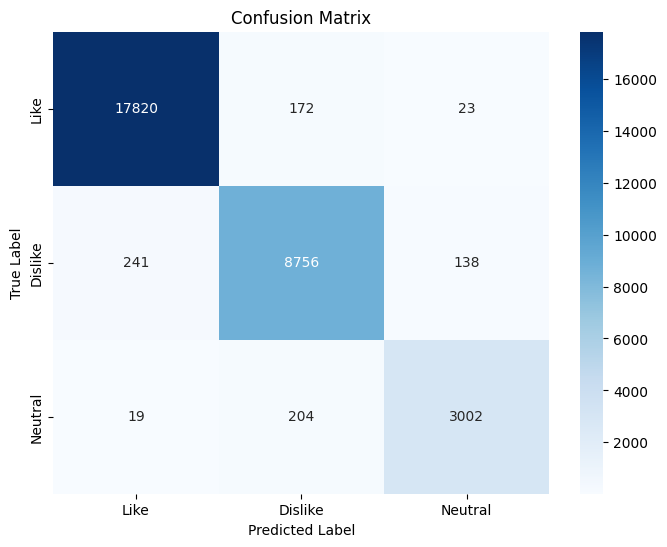

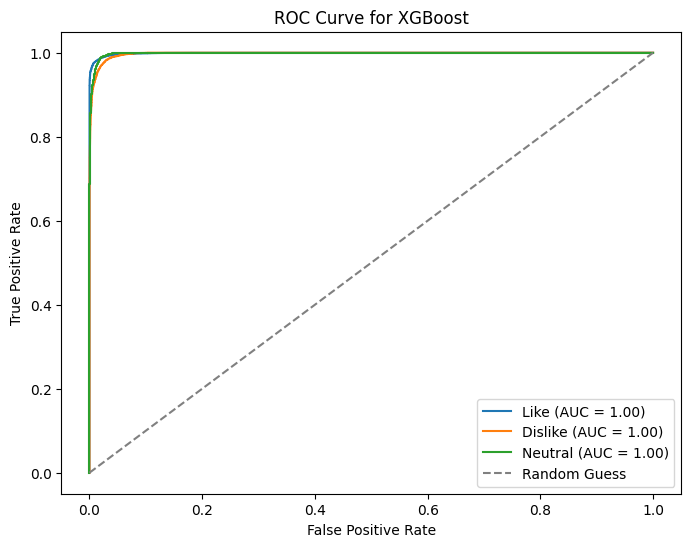

Evaluation Metrics:
Accuracy: 0.973761316872428
Precision: 0.9736841266879294
Recall: 0.973761316872428
F1 Score: 0.9737114137180692
Kappa: 0.9519004697581459
ROC AUC: 0.9984546240289548
MCC: 0.9519097961013945


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_test)

# Calculate True Positives, True Negatives, False Positives, False Negatives
conf_matrix = confusion_matrix(y_test, y_pred)
tn = np.diag(conf_matrix)
fp = np.sum(conf_matrix, axis=0) - tn
fn = np.sum(conf_matrix, axis=1) - tn
tp = np.sum(conf_matrix) - (tn + fp + fn)

# Print Confusion Matrix
print("Confusion Matrix:")
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Create a dictionary for label mapping in confusion matrix
label_mapping = {0: "Like", 1: "Dislike", 2: "Neutral"}

# Plot Confusion Matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=[label_mapping[i] for i in range(len(label_mapping))], columns=[label_mapping[i] for i in range(len(label_mapping))])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(label_mapping)):
    plt.plot(fpr[i], tpr[i], label=f"{label_mapping[i]} (AUC = {roc_auc[i]:0.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Confusion Matrix:
True Negatives: [17820  8756  3002]
False Positives: [260 376 161]
False Negatives: [195 379 223]
True Positives: [12100 20864 26989]


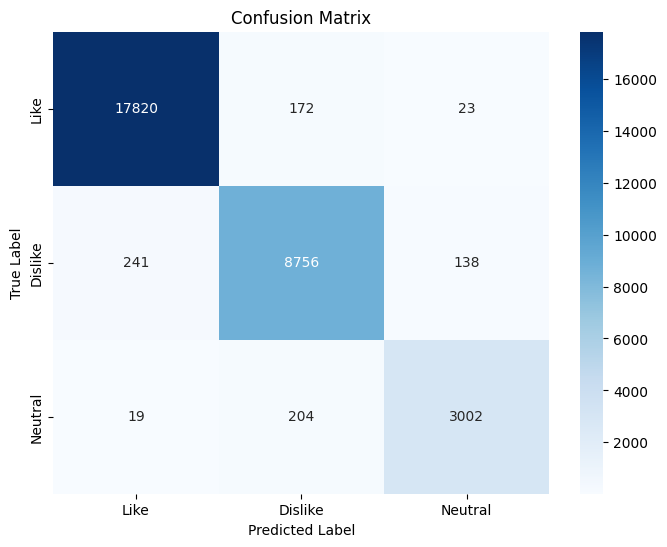

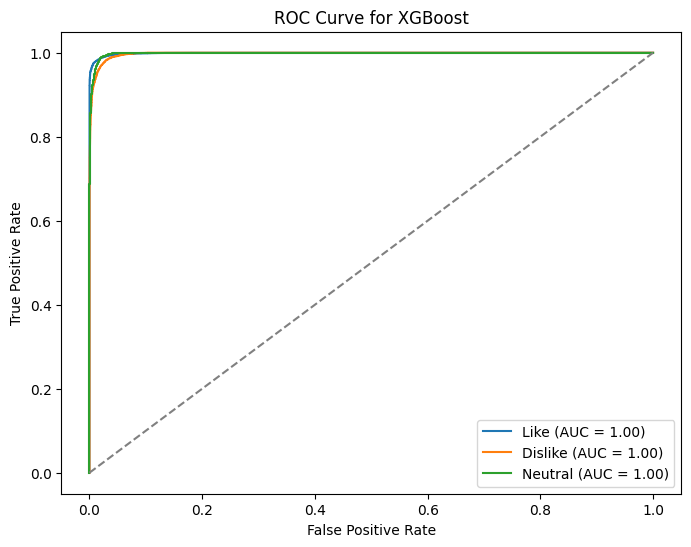

Evaluation Metrics:
Accuracy: 0.973761316872428
Precision: 0.9736841266879294
Recall: 0.973761316872428
F1 Score: 0.9737114137180692
Kappa: 0.9519004697581459
ROC AUC: 0.9984546240289548
MCC: 0.9519097961013945


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for XGBoost
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_xgb_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_xgb_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_xgb_classifier.predict(X_test)

# Calculate True Positives, True Negatives, False Positives, False Negatives
conf_matrix = confusion_matrix(y_test, y_pred)
tn = np.diag(conf_matrix)
fp = np.sum(conf_matrix, axis=0) - tn
fn = np.sum(conf_matrix, axis=1) - tn
tp = np.sum(conf_matrix) - (tn + fp + fn)

# Print Confusion Matrix
print("Confusion Matrix:")
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Create a dictionary for label mapping in confusion matrix
label_mapping = {0: "Like", 1: "Dislike", 2: "Neutral"}

# Plot Confusion Matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=[label_mapping[i] for i in range(len(label_mapping))], columns=[label_mapping[i] for i in range(len(label_mapping))])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(label_mapping)):
    plt.plot(fpr[i], tpr[i], label=f"{label_mapping[i]} (AUC = {roc_auc[i]:0.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_svm_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_svm_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [1]:
#Naive Bays

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict the labels
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, naive_bayes_classifier.predict_proba(X_test), multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Evaluation Metrics:
Accuracy: 0.8237695473251029
Precision: 0.8352220570543546
Recall: 0.8237695473251029
F1 Score: 0.8281190748087115
Kappa: 0.6859473663625077
ROC AUC: 0.9338351072858049
MCC: 0.6877769432514673


In [2]:
#K Nearest Neigbor

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict the labels
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn_classifier.predict_proba(X_test), multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Evaluation Metrics:
Accuracy: 0.8724938271604938
Precision: 0.8724213954213009
Recall: 0.8724938271604938
F1 Score: 0.8721221688456365
Kappa: 0.7655708741122477
ROC AUC: 0.9567009409058645
MCC: 0.7657511145448415


In [3]:
#Logistic Regression 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Train the classifier
logistic_regression_classifier.fit(X_train, y_train)

# Predict the labels
y_pred = logistic_regression_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_regression_classifier.predict_proba(X_test), multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Evaluation Metrics:
Accuracy: 0.8050699588477366
Precision: 0.7997058317927251
Recall: 0.8050699588477366
F1 Score: 0.7982303701321981
Kappa: 0.6337222569626993
ROC AUC: 0.931916699993208
MCC: 0.635736397213148


In [4]:
#Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for Decision Tree
param_grid = {'max_depth': [None, 10, 20]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Evaluation Metrics:
Accuracy: 0.8586008230452675
Precision: 0.8592370369665621
Recall: 0.8586008230452675
F1 Score: 0.8588946699165365
Kappa: 0.7417926282524576
ROC AUC: 0.9473317855450839
MCC: 0.7418238571969388


In [9]:
#Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the reduced hyperparameter grid for Decision Tree
param_grid = {'max_depth': [10, 10]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_dt_classifier = grid_search.best_estimator_

# Predict probabilities for each class
y_pred_proba = best_dt_classifier.predict_proba(X_test)

# Predict the labels
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify 'ovr' for multiclass
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


Evaluation Metrics:
Accuracy: 0.8585349794238684
Precision: 0.8591840500955731
Recall: 0.8585349794238684
F1 Score: 0.8588349094336108
Kappa: 0.7416844934550009
ROC AUC: 0.9473096245648468
MCC: 0.7417163561391555


In [ ]:
#Random Forest
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define the hyperparameter grid for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter optimization
best_rf_classifier = grid_search.best_estimator_

# Predict the labels
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


In [ ]:
#Hyper parameter optimization

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define classifiers with hyperparameter grids for optimization
classifiers = {
    "SVM": (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}),
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    "XGBoost": (xgb.XGBClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
}

# Lists to store evaluation metrics for each classifier
metrics_dict = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Kappa': [], 'ROC AUC': [], 'MCC': []}

# Loop through classifiers
for name, (classifier, param_grid) in classifiers.items():
    # Perform hyperparameter optimization with GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best classifier after hyperparameter optimization
    best_classifier = grid_search.best_estimator_
    
    # Predict the labels
    y_pred = best_classifier.predict(X_test)
    
    # Update metrics
    metrics_dict['Classifier'].append(name)
    metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics_dict['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics_dict['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics_dict['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
    metrics_dict['Kappa'].append(cohen_kappa_score(y_test, y_pred))
    metrics_dict['ROC AUC'].append(roc_auc_score(y_test, y_pred))
    metrics_dict['MCC'].append(matthews_corrcoef(y_test, y_pred))

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers (Hyperparameter Optimization)')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)

In [ ]:
# only cross validation of this code. 

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s03/bc3.csv")

# i) Replace null values with the mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# ii) Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# iii) Define classifiers with hyperparameter grids for optimization
classifiers = {
    "SVM": (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}),
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    "XGBoost": (xgb.XGBClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
}

# iv) Lists to store evaluation metrics for each classifier
metrics_dict = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Kappa': [], 'ROC AUC': [], 'MCC': []}

# v) Loop through classifiers
for name, (classifier, param_grid) in classifiers.items():
    # v) Perform cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_scaled, y)
    
    # v) Get the best classifier after hyperparameter optimization
    best_classifier = grid_search.best_estimator_
    
    # v) Perform cross-validation to get evaluation metrics
    cv_results = cross_val_score(best_classifier, X_scaled, y, cv=5, scoring='accuracy')
    
    # v) Update metrics
    metrics_dict['Classifier'].append(name)
    metrics_dict['Accuracy'].append(np.mean(cv_results))
    
    # v) Fit the classifier to get other metrics
    best_classifier.fit(X_scaled, y)
    y_pred = best_classifier.predict(X_scaled)
    
    # v) Precision
    precision = precision_score(y, y_pred, average='weighted')
    metrics_dict['Precision'].append(precision)
    
    # v) Recall
    recall = recall_score(y, y_pred, average='weighted')
    metrics_dict['Recall'].append(recall)
    
    # v) F1 Score
    f1 = f1_score(y, y_pred, average='weighted')
    metrics_dict['F1 Score'].append(f1)
    
    # v) Cohen's Kappa
    kappa = cohen_kappa_score(y, y_pred)
    metrics_dict['Kappa'].append(kappa)
    
    # v) ROC AUC
    if len(best_classifier.classes_) == 2:  # Binary classification
        y_prob = best_classifier.predict_proba(X_scaled)[:, 1]
        roc_auc = roc_auc_score(y, y_prob)
    else:  # Multi-class classification
        y_prob = best_classifier.predict_proba(X_scaled)
        roc_auc = roc_auc_score(y, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    metrics_dict['ROC AUC'].append(roc_auc)
    
    # v) Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y, y_pred)
    metrics_dict['MCC'].append(mcc)

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers (Hyperparameter Optimization with Cross-Validation)')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)


In [ ]:
#Cross Validatioin 

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s03/bc3.csv")

# i) Replace null values with the mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# ii) Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# iii) Define classifiers with hyperparameter grids for optimization
classifiers = {
    "SVM": (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}),
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    "XGBoost": (xgb.XGBClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
}

# iv) Lists to store evaluation metrics for each classifier
metrics_dict = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Kappa': [], 'ROC AUC': [], 'MCC': []}

# v) Loop through classifiers
for name, (classifier, param_grid) in classifiers.items():
    # v) Perform cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_scaled, y)
    
    # v) Get the best classifier after hyperparameter optimization
    best_classifier = grid_search.best_estimator_
    
    # v) Perform cross-validation to get evaluation metrics
    cv_results = cross_val_score(best_classifier, X_scaled, y, cv=5, scoring='accuracy')
    
    # v) Update metrics
    metrics_dict['Classifier'].append(name)
    metrics_dict['Accuracy'].append(np.mean(cv_results))
    
    # v) Fit the classifier to get other metrics
    best_classifier.fit(X_scaled, y)
    y_pred = best_classifier.predict(X_scaled)
    
    # v) Precision
    precision = precision_score(y, y_pred, average='weighted')
    metrics_dict['Precision'].append(precision)
    
    # v) Recall
    recall = recall_score(y, y_pred, average='weighted')
    metrics_dict['Recall'].append(recall)
    
    # v) F1 Score
    f1 = f1_score(y, y_pred, average='weighted')
    metrics_dict['F1 Score'].append(f1)
    
    # v) Cohen's Kappa
    kappa = cohen_kappa_score(y, y_pred)
    metrics_dict['Kappa'].append(kappa)
    
    # v) ROC AUC
    if len(best_classifier.classes_) == 2:  # Binary classification
        y_prob = best_classifier.predict_proba(X_scaled)[:, 1]
        roc_auc = roc_auc_score(y, y_prob)
    else:  # Multi-class classification
        y_prob = best_classifier.predict_proba(X_scaled)
        roc_auc = roc_auc_score(y, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    metrics_dict['ROC AUC'].append(roc_auc)
    
    # v) Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y, y_pred)
    metrics_dict['MCC'].append(mcc)

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers (Hyperparameter Optimization with Cross-Validation)')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s03/bc3.csv")

# i) Replace null values with the mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# ii) Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# iii) Define classifiers with hyperparameter grids for optimization
classifiers = {
    "SVM": (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}),
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    "XGBoost": (xgb.XGBClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
}

# iv) Lists to store evaluation metrics for each classifier
metrics_dict = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Kappa': [], 'ROC AUC': [], 'MCC': []}

# v) Loop through classifiers
for name, (classifier, param_grid) in classifiers.items():
    # v) Perform cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_scaled, y)
    
    # v) Get the best classifier after hyperparameter optimization
    best_classifier = grid_search.best_estimator_
    
    # v) Perform cross-validation to get evaluation metrics
    cv_results = cross_val_score(best_classifier, X_scaled, y, cv=5, scoring='accuracy')
    
    # v) Update metrics
    metrics_dict['Classifier'].append(name)
    metrics_dict['Accuracy'].append(np.mean(cv_results))
    
    # v) Fit the classifier to get other metrics
    best_classifier.fit(X_scaled, y)
    y_pred = best_classifier.predict(X_scaled)
    
    # v) Precision
    precision = precision_score(y, y_pred, average='weighted')
    metrics_dict['Precision'].append(precision)
    
    # v) Recall
    recall = recall_score(y, y_pred, average='weighted')
    metrics_dict['Recall'].append(recall)
    
    # v) F1 Score
    f1 = f1_score(y, y_pred, average='weighted')
    metrics_dict['F1 Score'].append(f1)
    
    # v) Cohen's Kappa
    kappa = cohen_kappa_score(y, y_pred)
    metrics_dict['Kappa'].append(kappa)
    
    # v) ROC AUC
    if len(best_classifier.classes_) == 2:  # Binary classification
        y_prob = best_classifier.predict_proba(X_scaled)[:, 1]
        roc_auc = roc_auc_score(y, y_prob)
    else:  # Multi-class classification
        y_prob = best_classifier.predict_proba(X_scaled)
        roc_auc = roc_auc_score(y, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    metrics_dict['ROC AUC'].append(roc_auc)
    
    # v) Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y, y_pred)
    metrics_dict['MCC'].append(mcc)

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers (Hyperparameter Optimization with Cross-Validation)')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s03/bc3.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


SVM Accuracy: 0.8729218106995885
Random Forest Accuracy: 0.8806995884773663
Decision Tree Accuracy: 0.8252674897119342
KNN Accuracy: 0.8795061728395062


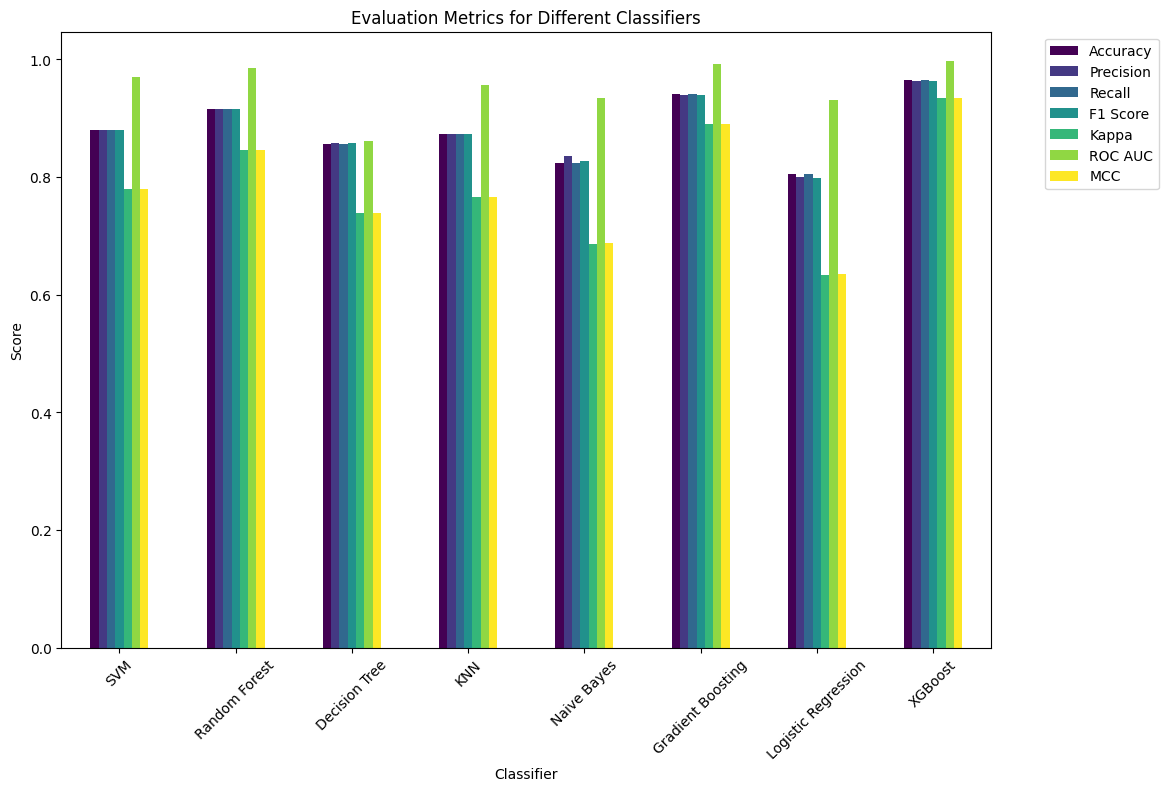

            Classifier  Accuracy  Precision    Recall  F1 Score  \
0                  SVM  0.880132   0.879537  0.880132  0.879709   
1        Random Forest  0.916444   0.916318  0.916444  0.915946   
2        Decision Tree  0.857119   0.857298  0.857119  0.857207   
3                  KNN  0.872922   0.872933  0.872922  0.872538   
4          Naive Bayes  0.823770   0.835222  0.823770  0.828119   
5    Gradient Boosting  0.940609   0.940321  0.940609  0.940272   
6  Logistic Regression  0.805070   0.799706  0.805070  0.798230   
7              XGBoost  0.964313   0.964244  0.964313  0.964262   

                    TP                   TN                 FP  \
0  [16953, 7401, 2380]  [2380, 7401, 16953]  [1186, 1839, 616]   
1  [17313, 8038, 2486]  [2486, 8038, 17313]   [835, 1360, 343]   
2  [16630, 7108, 2297]  [2297, 7108, 16630]  [1347, 2070, 923]   
3  [16776, 7466, 2273]  [2273, 7466, 16776]  [1264, 2019, 577]   
4  [15863, 6916, 2243]  [2243, 6916, 15863]  [898, 3075, 1380]   


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s03/bc3.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store evaluation metrics for each classifier
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []
kappa_list = []
roc_auc_list = []
mcc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_list.append(precision)
    
    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_list.append(recall)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_score_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tp_list.append(np.diag(cm))
    tn_list.append(np.diag(cm[::-1, ::-1]))
    fp_list.append(np.sum(cm, axis=0) - tp_list[-1])
    fn_list.append(np.sum(cm, axis=1) - tp_list[-1])
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_list.append(kappa)
    
    # ROC AUC
    if len(classifier.classes_) == 2:  # Binary classification
        y_prob = classifier.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:  # Multi-class classification
        y_prob = classifier.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    roc_auc_list.append(roc_auc)
    
    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_list.append(mcc)

# Convert lists to DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'TP': tp_list,
    'TN': tn_list,
    'FP': fp_list,
    'FN': fn_list,
    'Kappa': kappa_list,
    'ROC AUC': roc_auc_list,
    'MCC': mcc_list
})

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s03/bc3.csv")

# Replace null values with mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Define classifiers with hyperparameter grids for optimization
classifiers = {
    "SVM": (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}),
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    "XGBoost": (xgb.XGBClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
}

# Lists to store evaluation metrics for each classifier
metrics_dict = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Kappa': [], 'ROC AUC': [], 'MCC': []}

# Loop through classifiers
for name, (classifier, param_grid) in classifiers.items():
    # Perform hyperparameter optimization with GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best classifier after hyperparameter optimization
    best_classifier = grid_search.best_estimator_
    
    # Predict the labels
    y_pred = best_classifier.predict(X_test)
    
    # Update metrics
    metrics_dict['Classifier'].append(name)
    metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics_dict['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics_dict['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics_dict['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
    metrics_dict['Kappa'].append(cohen_kappa_score(y_test, y_pred))
    metrics_dict['ROC AUC'].append(roc_auc_score(y_test, y_pred))
    metrics_dict['MCC'].append(matthews_corrcoef(y_test, y_pred))

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers (Hyperparameter Optimization)')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s03/bc3.csv")

# i) Replace null values with the mean value for each feature
df123.fillna(df123.mean(), inplace=True)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# ii) Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# iii) Define classifiers with hyperparameter grids for optimization
classifiers = {
    "SVM": (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}),
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    "XGBoost": (xgb.XGBClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
}

# iv) Lists to store evaluation metrics for each classifier
metrics_dict = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Kappa': [], 'ROC AUC': [], 'MCC': []}

# v) Loop through classifiers
for name, (classifier, param_grid) in classifiers.items():
    # v) Perform cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_scaled, y)
    
    # v) Get the best classifier after hyperparameter optimization
    best_classifier = grid_search.best_estimator_
    
    # v) Perform cross-validation to get evaluation metrics
    cv_results = cross_val_score(best_classifier, X_scaled, y, cv=5, scoring='accuracy')
    
    # v) Update metrics
    metrics_dict['Classifier'].append(name)
    metrics_dict['Accuracy'].append(np.mean(cv_results))
    
    # v) Fit the classifier to get other metrics
    best_classifier.fit(X_scaled, y)
    y_pred = best_classifier.predict(X_scaled)
    
    # v) Precision
    precision = precision_score(y, y_pred, average='weighted')
    metrics_dict['Precision'].append(precision)
    
    # v) Recall
    recall = recall_score(y, y_pred, average='weighted')
    metrics_dict['Recall'].append(recall)
    
    # v) F1 Score
    f1 = f1_score(y, y_pred, average='weighted')
    metrics_dict['F1 Score'].append(f1)
    
    # v) Cohen's Kappa
    kappa = cohen_kappa_score(y, y_pred)
    metrics_dict['Kappa'].append(kappa)
    
    # v) ROC AUC
    if len(best_classifier.classes_) == 2:  # Binary classification
        y_prob = best_classifier.predict_proba(X_scaled)[:, 1]
        roc_auc = roc_auc_score(y, y_prob)
    else:  # Multi-class classification
        y_prob = best_classifier.predict_proba(X_scaled)
        roc_auc = roc_auc_score(y, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    metrics_dict['ROC AUC'].append(roc_auc)
    
    # v) Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y, y_pred)
    metrics_dict['MCC'].append(mcc)

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers (Hyperparameter Optimization with Cross-Validation)')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Particle Swarm Optimization (PSO) for PCA components optimization
# Set up PSO parameters (you may need to adjust these based on your specific problem)
pso_params = {
    'n_components': [5, 10, 15, 20],  # Adjust as needed
    'learning_rate': 0.01,
    'n_iter': 100
}

# Define a function to optimize PCA components using PSO
def optimize_pca_components(X_train, y_train):
    pca = PCA()
    pipe = Pipeline([('reduce_dim', pca), ('classify', SVC())])  # You can change the classifier as needed
    param_grid = {
        'reduce_dim__n_components': [5, 10, 15, 20],
        'classify__C': [1, 10, 100],
        'classify__kernel': ['linear', 'rbf'],
    }
    search = GridSearchCV(pipe, param_grid, n_jobs=-1)
    search.fit(X_train, y_train)
    return search.best_params_['reduce_dim__n_components']

try:
    # Use PSO to find optimal PCA components
    best_pca_components = optimize_pca_components(X_train, y_train)

    # Apply PCA with the optimal number of components
    pca = PCA(n_components=best_pca_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define classifiers
    classifiers = {
        "SVM": SVC(),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "Logistic Regression": LogisticRegression()
    }

    # Lists to store accuracy values
    accuracies = []

    # Loop through classifiers
    for name, classifier in classifiers.items():
        # Train and evaluate each classifier
        classifier.fit(X_train_pca, y_train)
        y_pred = classifier.predict(X_test_pca)

        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        print(f"{name} Accuracy: {accuracy}\n")

except KeyboardInterrupt:
    print("Keyboard interrupt detected. Exiting gracefully.")

# Plotting the histogram
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
plt.hist(accuracies, bins=np.arange(0, 1.1, 0.1), color=colors, edgecolor='black', linewidth=1.2)
plt.title('Accuracy Histogram')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Define bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Apply bandpass filter to each column
for col in df123.columns:
    if col != "label":
        df123[col] = bandpass_filter(df123[col], lowcut=2, highcut=45, fs=1000)  # Adjust fs according to your sampling frequency

# Keep values between -45 and +45
df123 = df123.clip(lower=-45, upper=45)

# Print the dataset
print(df123)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers...
# Rest of your code...


             Fp1       Fp2        Fz        F3        F4        F7        F8  \
0       2.586227  3.239815  5.136881  1.883467 -0.435649 -0.519952 -1.279481   
1       2.364121  3.608829  5.570297  2.003432 -0.433159 -0.276636 -1.348004   
2       2.124011  3.934769  5.957667  2.116938 -0.426414 -0.050904 -1.407245   
3       1.847069  4.177894  6.255816  2.213104 -0.417841  0.142385 -1.450841   
4       1.516806  4.304576  6.429084  2.283506 -0.408318  0.291098 -1.474568   
...          ...       ...       ...       ...       ...       ...       ...   
121495 -1.725604 -2.698235 -2.889125 -3.079981 -3.724197 -3.248094  1.984043   
121496 -1.408596 -1.990475 -2.003699 -2.445835 -3.034644 -2.952476  1.652370   
121497 -1.112664 -1.273609 -1.062469 -1.823693 -2.336932 -2.718924  1.189766   
121498 -0.836612 -0.559165 -0.087543 -1.215825 -1.638106 -2.534875  0.625572   
121499 -0.577497  0.142322  0.898158 -0.623631 -0.946158 -2.385769 -0.004992   

              Cz        C3        C4   

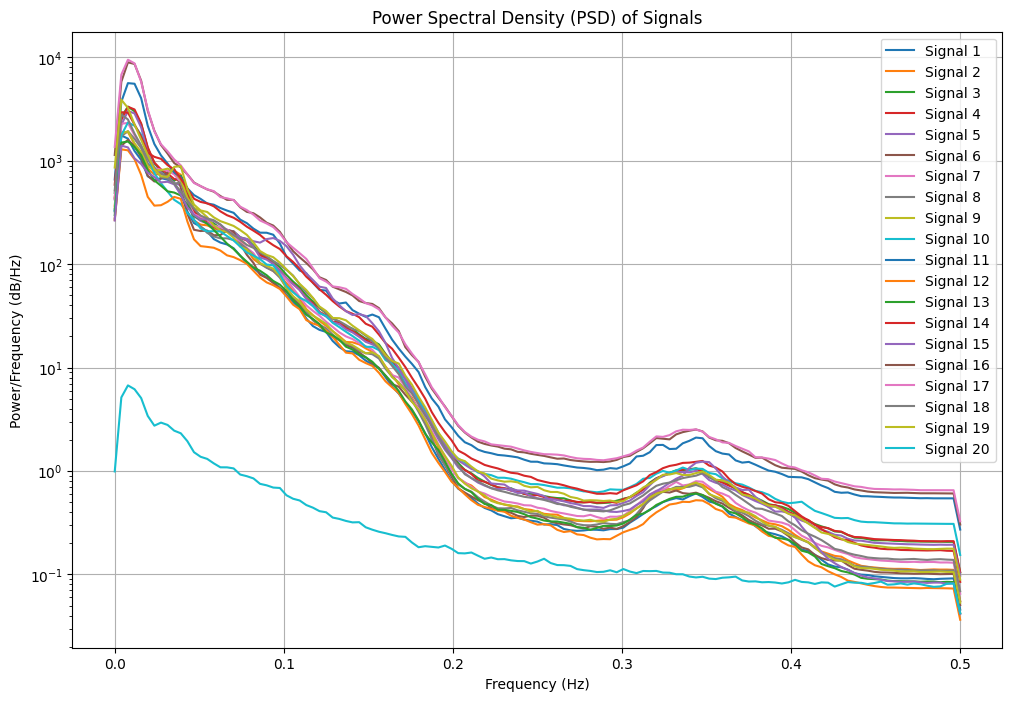

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Assuming your dataset contains multiple signals in each row, you need to transpose it for easier manipulation
df123_transposed = df123.T

# Compute Power Spectral Density (PSD) for each signal
psd_signals = []
for signal in df123_transposed.values:
    f, Pxx = welch(signal, fs=1.0, nperseg=256)  # Adjust parameters as needed
    psd_signals.append((f, Pxx))

# Plot the PSD graphs for each signal
plt.figure(figsize=(12, 8))
for i, (f, Pxx) in enumerate(psd_signals):
    plt.semilogy(f, Pxx, label=f'Signal {i+1}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of Signals')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Plot each signal
plt.figure(figsize=(12, 8))
for i, row in df123.iterrows():
    plt.plot(row, label=f'Signal {i+1}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signals')
plt.legend()
plt.grid(True)
plt.show()

# Compute Power Spectral Density (PSD) for each signal
psd_signals = []
for i, row in df123.iterrows():
    f, Pxx = welch(row, fs=1.0, nperseg=256)  # Adjust parameters as needed
    psd_signals.append((f, Pxx))

# Plot the PSD graphs for each signal
plt.figure(figsize=(12, 8))
for i, (f, Pxx) in enumerate(psd_signals):
    plt.semilogy(f, Pxx, label=f'Signal {i+1}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of Signals')
plt.legend()
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 1008x2544803 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

/opt/conda/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:589: UserWarning: nperseg = 256 is greater than input length  = 20, using nperseg = 20
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


KeyboardInterrupt: 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Clip the signals to the range of -45 to +45
df123_clipped = df123.clip(lower=-45, upper=45)

# Compute Power Spectral Density (PSD) for each signal
psd_signals = []
for i, row in df123_clipped.iterrows():
    f, Pxx = welch(row, fs=1.0, nperseg=min(len(row), 256))  # Adjust parameters as needed
    psd_signals.append((f, Pxx))

# Plot the PSD graphs for each signal
plt.figure(figsize=(12, 8))
for i, (f, Pxx) in enumerate(psd_signals):
    plt.semilogy(f, Pxx, label=f'Signal {i+1}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of Signals')
plt.legend()
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 1012x2544824 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

/opt/conda/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:589: UserWarning: nperseg = 256 is greater than input length  = 19, using nperseg = 19
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


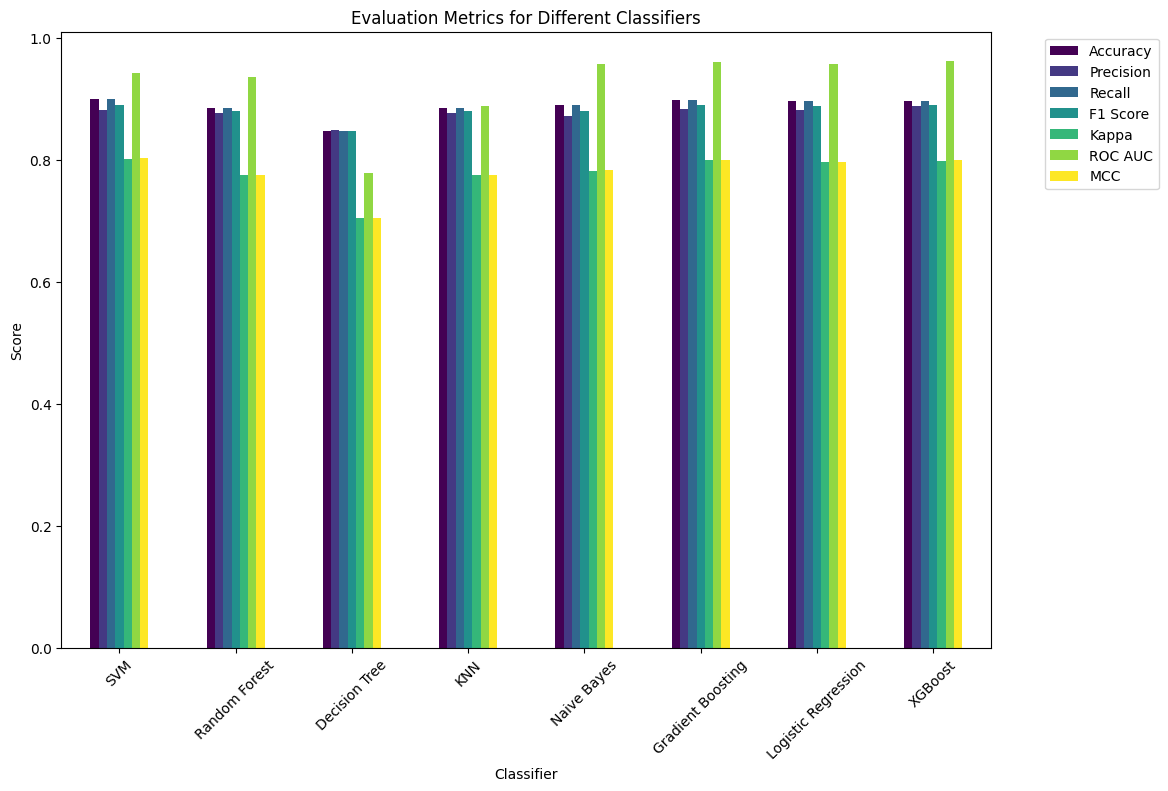

            Classifier  Accuracy  Precision    Recall  F1 Score  \
0                  SVM  0.899457   0.882703  0.899457  0.890797   
1        Random Forest  0.885498   0.877399  0.885498  0.880219   
2        Decision Tree  0.847539   0.849343  0.847539  0.848405   
3                  KNN  0.885564   0.877747  0.885564  0.880546   
4          Naive Bayes  0.889778   0.872248  0.889778  0.880916   
5    Gradient Boosting  0.898107   0.883998  0.898107  0.889789   
6  Logistic Regression  0.896428   0.881531  0.896428  0.888784   
7              XGBoost  0.897745   0.889433  0.897745  0.889609   

                    TP                   TN                 FP  \
0    [14767, 12554, 0]    [0, 12554, 14767]    [1160, 1894, 0]   
1   [14661, 12188, 48]   [48, 12188, 14661]  [1407, 1952, 119]   
2  [14279, 11324, 141]  [141, 11324, 14279]  [1850, 2235, 546]   
3   [14642, 12206, 51]   [51, 12206, 14642]  [1376, 1968, 132]   
4    [14901, 12126, 0]    [0, 12126, 14901]    [1588, 1760, 0]   


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from scipy.signal import welch

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute Power Spectral Density for each signal and add them as features
psd_features = []
for i in range(len(X)):
    # Assuming X contains time-domain signals in each row
    signal = X.iloc[i]
    f, Pxx = welch(signal, fs=1.0, nperseg=256)  # Adjust parameters as needed
    psd_features.append(Pxx)

# Concatenate the original features with PSD features
X_psd = np.concatenate((X, np.array(psd_features)), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_psd, y, test_size=0.25, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LDA
lda = LDA(n_components=2)  # You can adjust the number of components as needed
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store evaluation metrics for each classifier
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []
kappa_list = []
roc_auc_list = []
mcc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_lda, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test_lda)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_list.append(precision)
    
    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_list.append(recall)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_score_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tp_list.append(np.diag(cm))
    tn_list.append(np.diag(cm[::-1, ::-1]))
    fp_list.append(np.sum(cm, axis=0) - tp_list[-1])
    fn_list.append(np.sum(cm, axis=1) - tp_list[-1])
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_list.append(kappa)
    
    # ROC AUC
    if len(classifier.classes_) == 2:  # Binary classification
        y_prob = classifier.predict_proba(X_test_lda)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:  # Multi-class classification
        y_prob = classifier.predict_proba(X_test_lda)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    roc_auc_list.append(roc_auc)
    
    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_list.append(mcc)

# Convert lists to DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'TP': tp_list,
    'TN': tn_list,
    'FP': fp_list,
    'FN': fn_list,
    'Kappa': kappa_list,
    'ROC AUC': roc_auc_list,
    'MCC': mcc_list
})

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


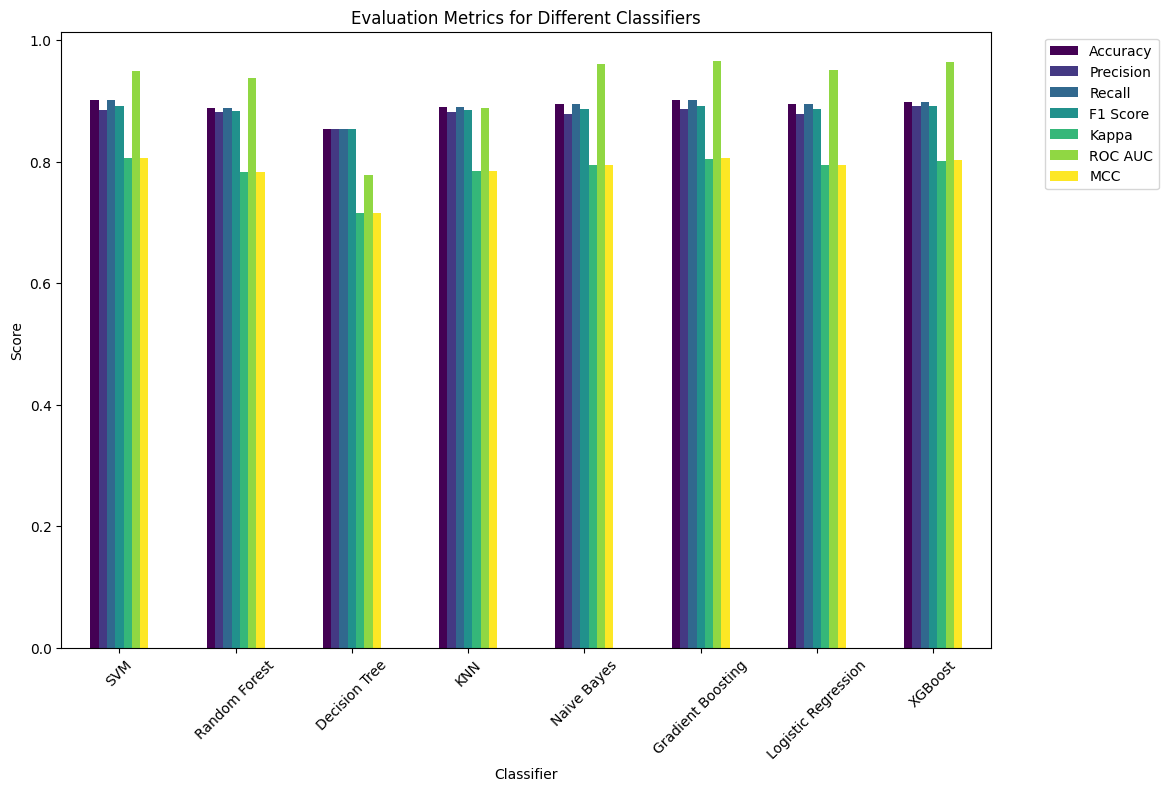

            Classifier  Accuracy  Precision    Recall  F1 Score  \
0                  SVM  0.901169   0.884620  0.901169  0.892530   
1        Random Forest  0.889053   0.881482  0.889053  0.884260   
2        Decision Tree  0.853432   0.854655  0.853432  0.854027   
3                  KNN  0.889942   0.882577  0.889942  0.885328   
4          Naive Bayes  0.895868   0.878278  0.895868  0.886985   
5    Gradient Boosting  0.900840   0.886396  0.900840  0.892255   
6  Logistic Regression  0.895506   0.879020  0.895506  0.887169   
7              XGBoost  0.899160   0.891254  0.899160  0.891393   

                    TP                   TN                 FP  \
0    [14750, 12623, 0]    [0, 12623, 14750]    [1091, 1911, 0]   
1   [14708, 12241, 56]   [56, 12241, 14708]  [1330, 1897, 143]   
2  [14362, 11436, 125]  [125, 11436, 14362]  [1754, 2167, 531]   
3   [14708, 12266, 58]   [58, 12266, 14708]  [1295, 1895, 153]   
4    [14962, 12250, 0]    [0, 12250, 14962]    [1464, 1699, 0]   


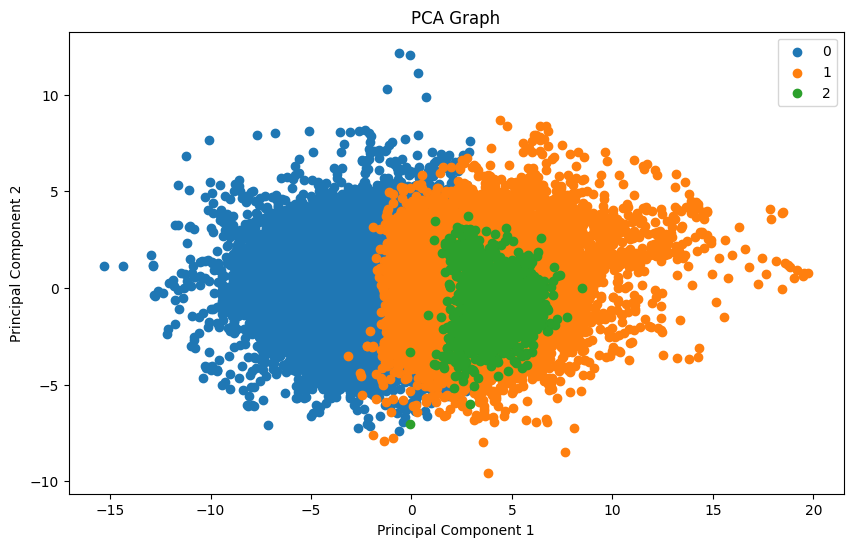

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store evaluation metrics for each classifier
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []
kappa_list = []
roc_auc_list = []
mcc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_pca, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test_pca)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_list.append(precision)
    
    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_list.append(recall)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_score_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tp_list.append(np.diag(cm))
    tn_list.append(np.diag(cm[::-1, ::-1]))
    fp_list.append(np.sum(cm, axis=0) - tp_list[-1])
    fn_list.append(np.sum(cm, axis=1) - tp_list[-1])
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_list.append(kappa)
    
    # ROC AUC
    if len(classifier.classes_) == 2:  # Binary classification
        y_prob = classifier.predict_proba(X_test_pca)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:  # Multi-class classification
        y_prob = classifier.predict_proba(X_test_pca)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    roc_auc_list.append(roc_auc)
    
    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_list.append(mcc)

# Convert lists to DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'TP': tp_list,
    'TN': tn_list,
    'FP': fp_list,
    'FN': fn_list,
    'Kappa': kappa_list,
    'ROC AUC': roc_auc_list,
    'MCC': mcc_list
})

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)

# Plot PCA graph
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
plt.title('PCA Graph')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


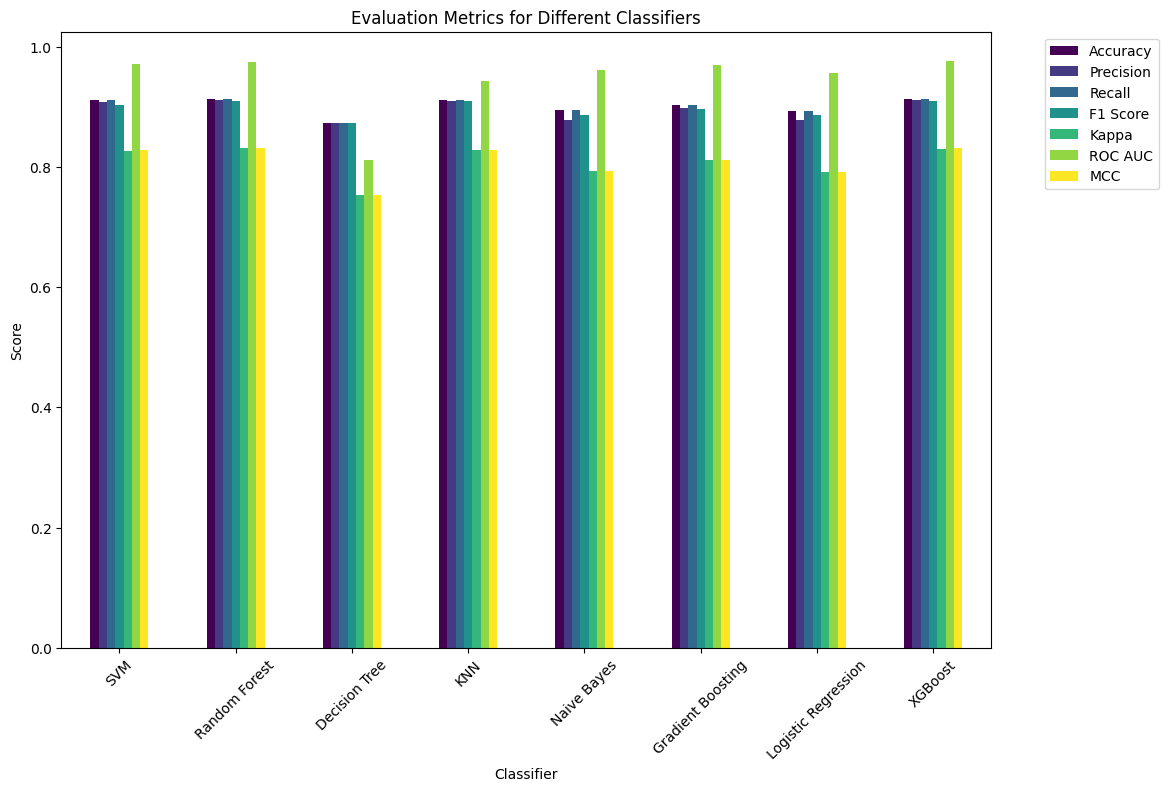

            Classifier  Accuracy  Precision    Recall  F1 Score  \
0                  SVM  0.912066   0.908059  0.912066  0.903473   
1        Random Forest  0.914008   0.911770  0.914008  0.909291   
2        Decision Tree  0.873053   0.873658  0.873053  0.873351   
3                  KNN  0.912099   0.910030  0.912099  0.910360   
4          Naive Bayes  0.895440   0.877809  0.895440  0.886529   
5    Gradient Boosting  0.904000   0.898216  0.904000  0.896495   
6  Logistic Regression  0.894189   0.878733  0.894189  0.886232   
7              XGBoost  0.913613   0.910844  0.913613  0.910027   

                    TP                   TN                 FP  \
0    [14974, 12726, 4]    [4, 12726, 14974]     [986, 1683, 2]   
1  [15038, 12622, 103]  [103, 12622, 15038]   [1057, 1520, 35]   
2  [14528, 11789, 202]  [202, 11789, 14528]  [1513, 1918, 425]   
3  [14959, 12525, 221]  [221, 12525, 14959]  [1065, 1476, 129]   
4    [14983, 12216, 0]    [0, 12216, 14983]    [1498, 1678, 0]   


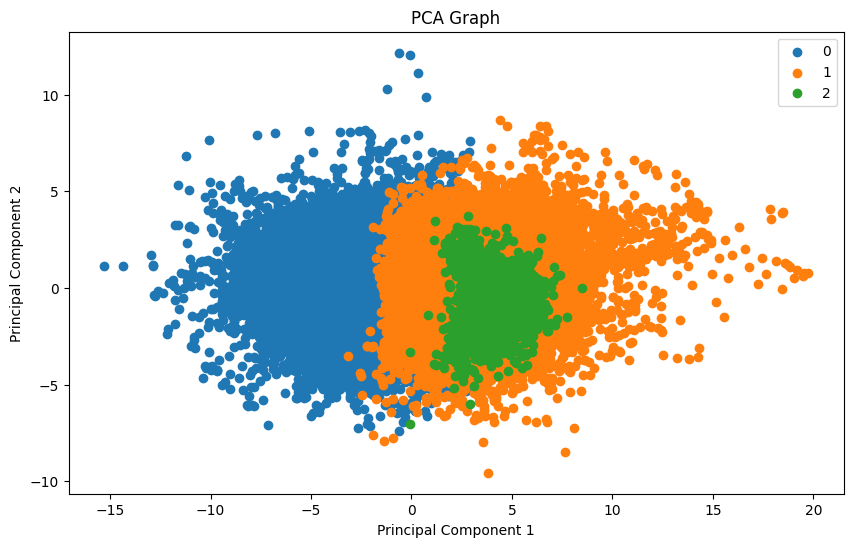

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store evaluation metrics for each classifier
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []
kappa_list = []
roc_auc_list = []
mcc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_pca, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test_pca)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_list.append(precision)
    
    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_list.append(recall)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_score_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tp_list.append(np.diag(cm))
    tn_list.append(np.diag(cm[::-1, ::-1]))
    fp_list.append(np.sum(cm, axis=0) - tp_list[-1])
    fn_list.append(np.sum(cm, axis=1) - tp_list[-1])
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_list.append(kappa)
    
    # ROC AUC
    if len(classifier.classes_) == 2:  # Binary classification
        y_prob = classifier.predict_proba(X_test_pca)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:  # Multi-class classification
        y_prob = classifier.predict_proba(X_test_pca)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    roc_auc_list.append(roc_auc)
    
    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_list.append(mcc)

# Convert lists to DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'TP': tp_list,
    'TN': tn_list,
    'FP': fp_list,
    'FN': fn_list,
    'Kappa': kappa_list,
    'ROC AUC': roc_auc_list,
    'MCC': mcc_list
})

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)

# Plot PCA graph
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
plt.title('PCA Graph')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LDA
lda = LDA(n_components=2)  # You can adjust the number of components as needed
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store evaluation metrics for each classifier
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []
kappa_list = []
roc_auc_list = []
mcc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_lda, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test_lda)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_list.append(precision)
    
    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_list.append(recall)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_score_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tp_list.append(np.diag(cm))
    tn_list.append(np.diag(cm[::-1, ::-1]))
    fp_list.append(np.sum(cm, axis=0) - tp_list[-1])
    fn_list.append(np.sum(cm, axis=1) - tp_list[-1])
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_list.append(kappa)
    
    # ROC AUC
    if len(classifier.classes_) == 2:  # Binary classification
        y_prob = classifier.predict_proba(X_test_lda)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:  # Multi-class classification
        y_prob = classifier.predict_proba(X_test_lda)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    roc_auc_list.append(roc_auc)
    
    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_list.append(mcc)

# Convert lists to DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'TP': tp_list,
    'TN': tn_list,
    'FP': fp_list,
    'FN': fn_list,
    'Kappa': kappa_list,
    'ROC AUC': roc_auc_list,
    'MCC': mcc_list
})

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)

# Plot LDA graph
plt.figure(figsize=(10, 6))
for label in np.unique(y_train):
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], label=label)
plt.title('LDA Graph')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.show()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Variables to keep track of the highest accuracy
max_accuracy = 0
best_classifier = None

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if the current accuracy is the highest
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_classifier = name

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:\n{cm}\n")
    print(f"{name} Accuracy: {accuracy}\n")

# Print the highest accuracy and the corresponding classifier
print(f"Highest Accuracy: {max_accuracy} obtained with {best_classifier}")


SVM Confusion Matrix:
[[12015   872     0]
 [  796 10146     0]
 [    1   470     0]]

SVM Accuracy: 0.9119753086419753

Random Forest Confusion Matrix:
[[12076   811     0]
 [  823 10097    22]
 [    1   390    80]]

Random Forest Accuracy: 0.915761316872428

Decision Tree Confusion Matrix:
[[11667  1218     2]
 [ 1182  9418   342]
 [    2   286   183]]

Decision Tree Accuracy: 0.8752263374485597

KNN Confusion Matrix:
[[12050   837     0]
 [  844  9998   100]
 [    2   298   171]]

KNN Accuracy: 0.9143621399176954

Naive Bayes Confusion Matrix:
[[12088   799     0]
 [ 1407  9535     0]
 [    1   470     0]]

Naive Bayes Accuracy: 0.8898353909465021

Gradient Boosting Confusion Matrix:
[[11946   941     0]
 [  872 10060    10]
 [    1   443    27]]

Gradient Boosting Accuracy: 0.9067078189300412

Highest Accuracy: 0.915761316872428 obtained with Random Forest


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Variables to keep track of the highest accuracy
max_accuracy = 0
best_classifier = None

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if the current accuracy is the highest
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_classifier = name

    # Confusion Matrix for Logistic Regression
    if name == "Logistic Regression":
        cm = confusion_matrix(y_test, y_pred)
        print(f"{name} Confusion Matrix:\n{cm}\n")

    print(f"{name} Accuracy: {accuracy}\n")

# Print the highest accuracy and the corresponding classifier
print(f"Highest Accuracy: {max_accuracy} obtained with {best_classifier}")


SVM Accuracy: 0.9119753086419753

Random Forest Accuracy: 0.9159259259259259

Decision Tree Accuracy: 0.8739506172839506

KNN Accuracy: 0.9143621399176954

Naive Bayes Accuracy: 0.8898353909465021

Gradient Boosting Accuracy: 0.9067078189300412

Logistic Regression Confusion Matrix:
[[11936   951     0]
 [ 1010  9901    31]
 [    1   470     0]]

Logistic Regression Accuracy: 0.898641975308642

Highest Accuracy: 0.9159259259259259 obtained with Random Forest


SVM Accuracy: 0.9119753086419753

Random Forest Accuracy: 0.9167078189300412

Decision Tree Accuracy: 0.874238683127572

KNN Accuracy: 0.9143621399176954

Naive Bayes Accuracy: 0.8898353909465021

Gradient Boosting Accuracy: 0.9067078189300412

Logistic Regression Accuracy: 0.898641975308642



ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 7 colors were provided

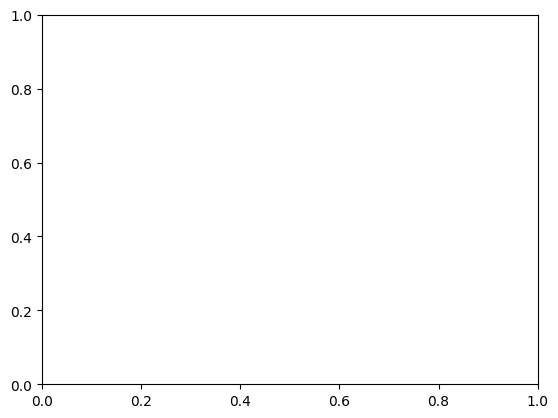

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy values
accuracies = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"{name} Accuracy: {accuracy}\n")

# Plotting the histogram
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
plt.hist(accuracies, bins=np.arange(0, 1.1, 0.1), color=colors, edgecolor='black', linewidth=1.2)
plt.title('Accuracy Histogram')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()


SVM Accuracy: 0.9119753086419753

Random Forest Accuracy: 0.9156378600823045

Decision Tree Accuracy: 0.8734979423868313

KNN Accuracy: 0.9143621399176954

Naive Bayes Accuracy: 0.8898353909465021

Gradient Boosting Accuracy: 0.9067078189300412

Logistic Regression Accuracy: 0.898641975308642



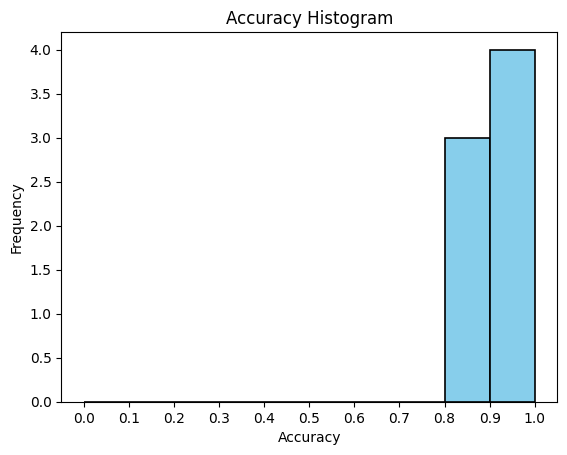

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy values
accuracies = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"{name} Accuracy: {accuracy}\n")

# Plotting the histogram with a single color
plt.hist(accuracies, bins=np.arange(0, 1.1, 0.1), color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Accuracy Histogram')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()


SVM Accuracy: 0.9145020576131687

Random Forest Accuracy: 0.944724279835391

Decision Tree Accuracy: 0.9030781893004115

KNN Accuracy: 0.9094979423868312

Naive Bayes Accuracy: 0.8629794238683127

Gradient Boosting Accuracy: 0.9609547325102881

Logistic Regression Accuracy: 0.8941563786008231



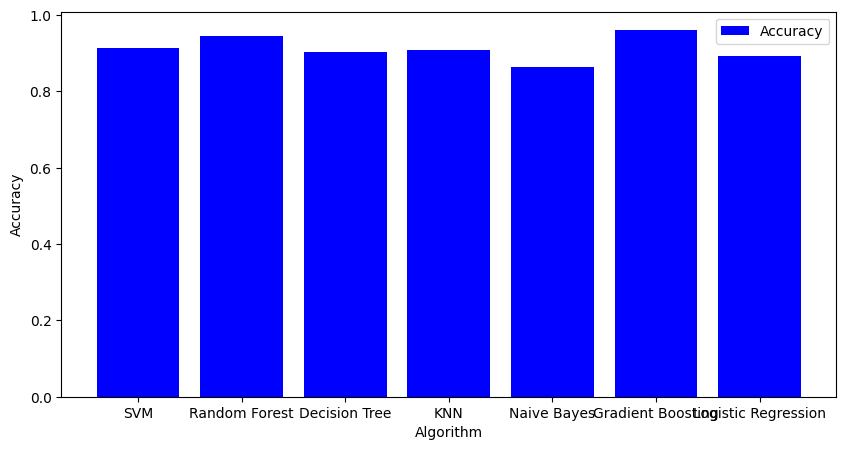

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy, precision, recall, and F1-Score values
accuracies = []
labels = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    labels.append(name)

    print(f"{name} Accuracy: {accuracy}\n")

# Plotting the histogram with distinct colors for each algorithm
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
ax1.bar(labels, accuracies, color='blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.legend()

plt.xlabel('Algorithm')
plt.show()


SVM Accuracy: 0.9145020576131687

Random Forest Accuracy: 0.944559670781893

Decision Tree Accuracy: 0.9037695473251028

KNN Accuracy: 0.9094979423868312

Naive Bayes Accuracy: 0.8629794238683127

Gradient Boosting Accuracy: 0.9609547325102881

Logistic Regression Accuracy: 0.8941563786008231

XGBoost Accuracy: 0.9760658436213991



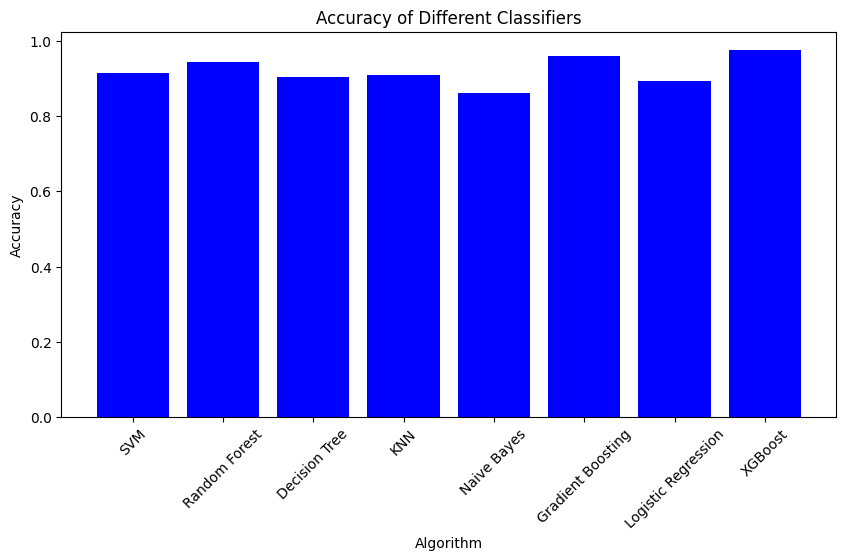

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier()  # Add XGBoost classifier
}

# Lists to store accuracy and algorithm names
accuracies = []
labels = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    labels.append(name)

    print(f"{name} Accuracy: {accuracy}\n")

# Plotting the histogram with distinct colors for each algorithm
plt.figure(figsize=(10, 5))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier()
}

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision, Recall, F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # ROC Curve
    if hasattr(classifier, "predict_proba"):
        y_prob = classifier.predict_proba(X_test)[:, 1]  # probability of positive class
    else:
        y_prob = classifier.decision_function(X_test)  # use decision function for SVC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    
    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print("Confusion Matrix:")
    print(cm)
    print(f"AUC: {auc}")
    print()
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()


ValueError: multiclass format is not supported

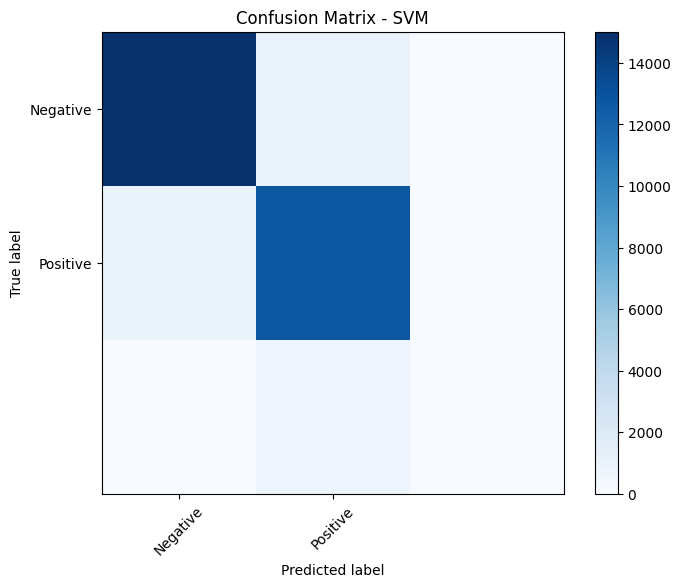

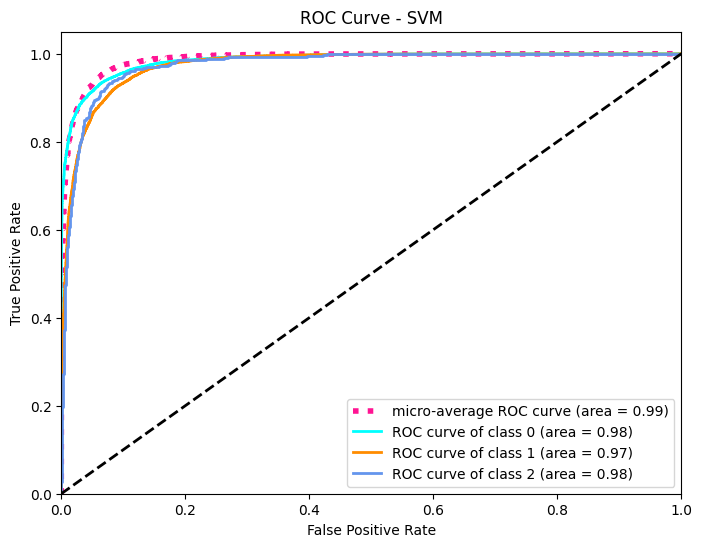

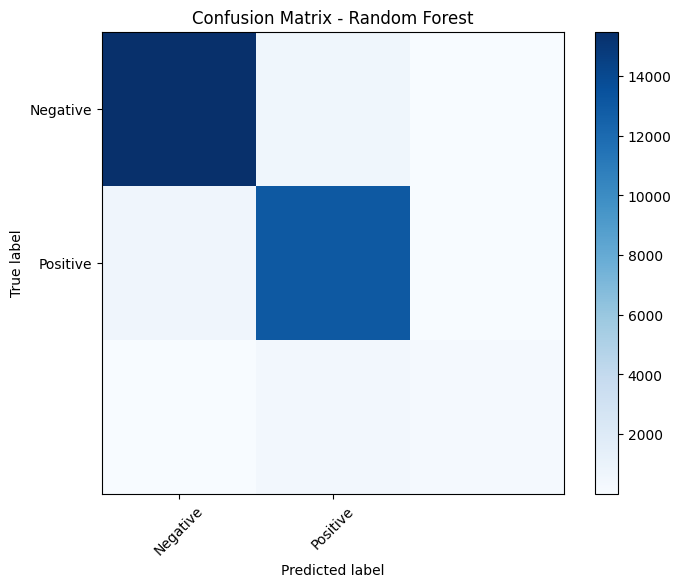

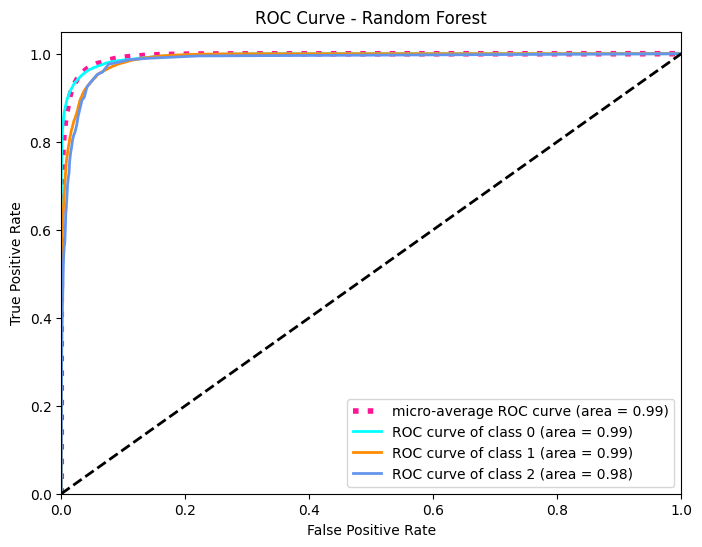

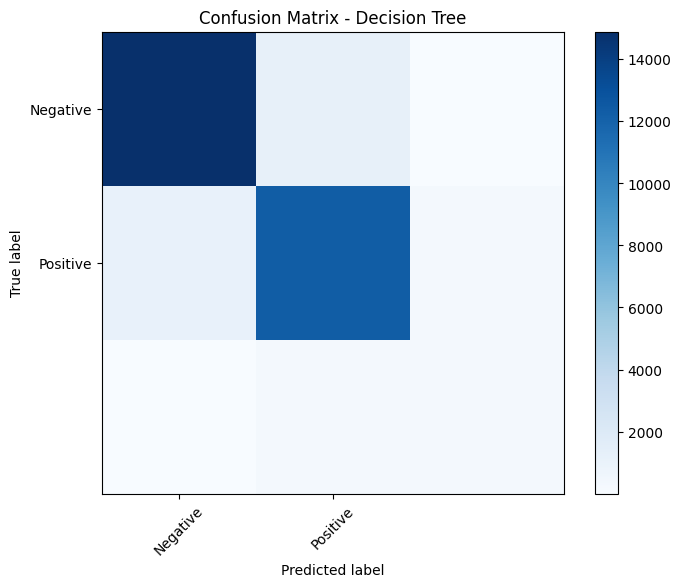

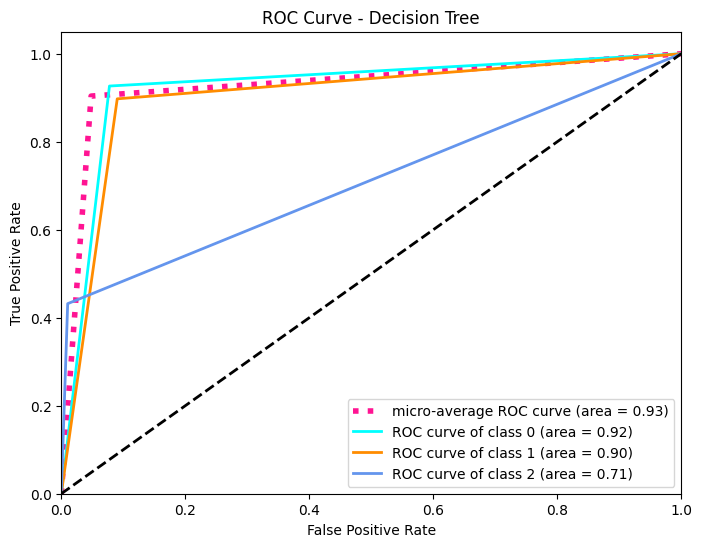

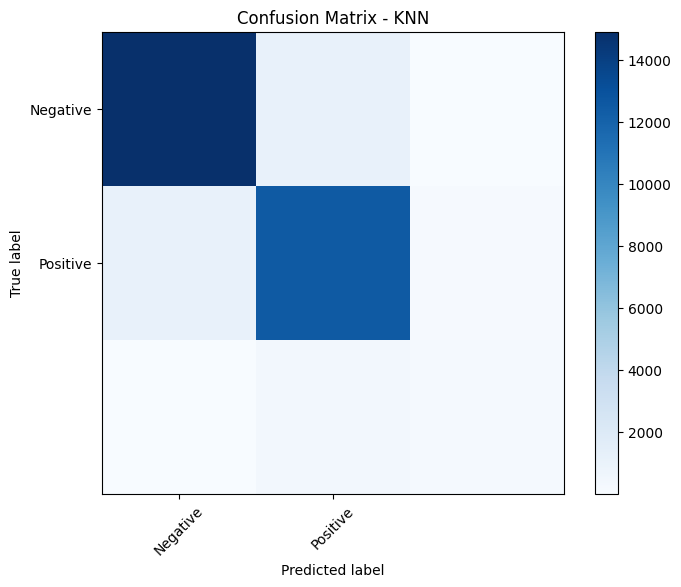

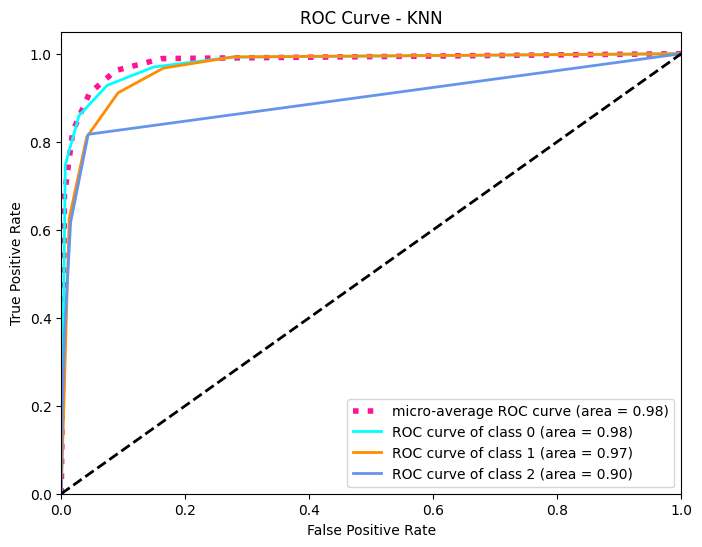

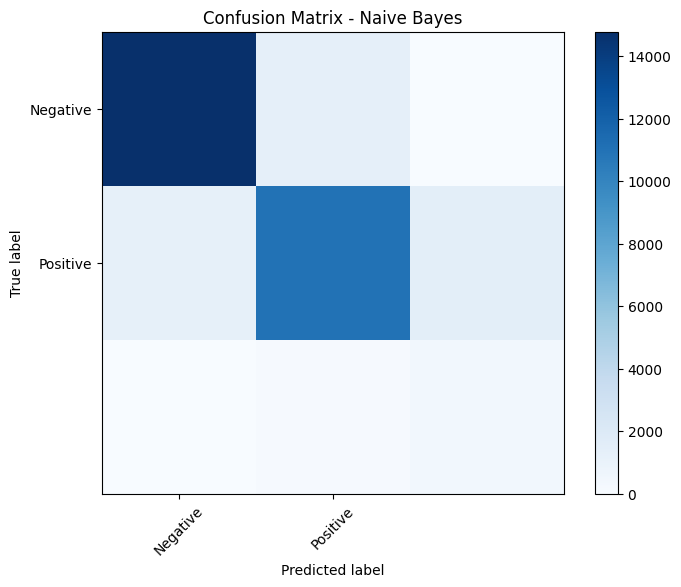

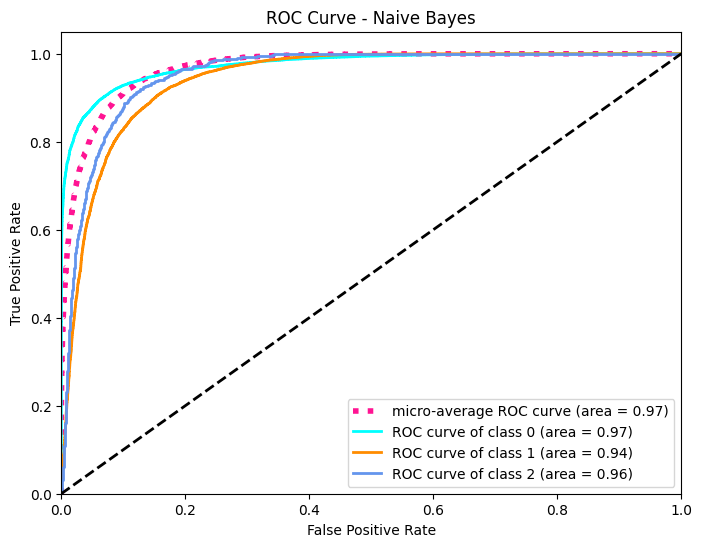

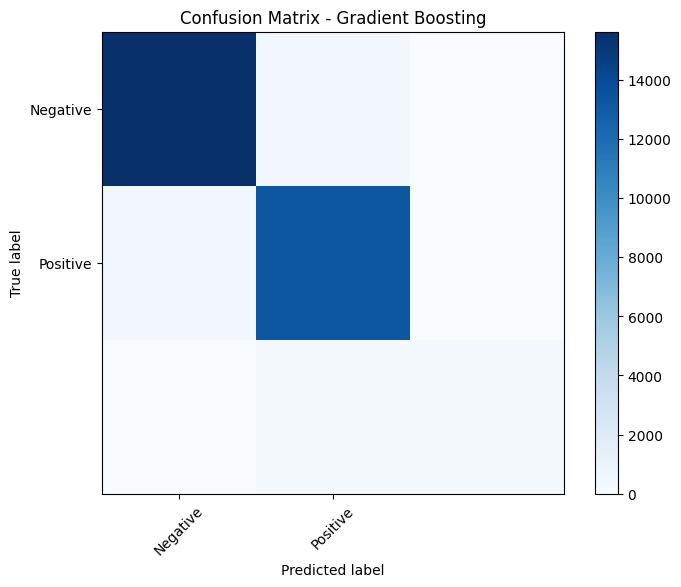

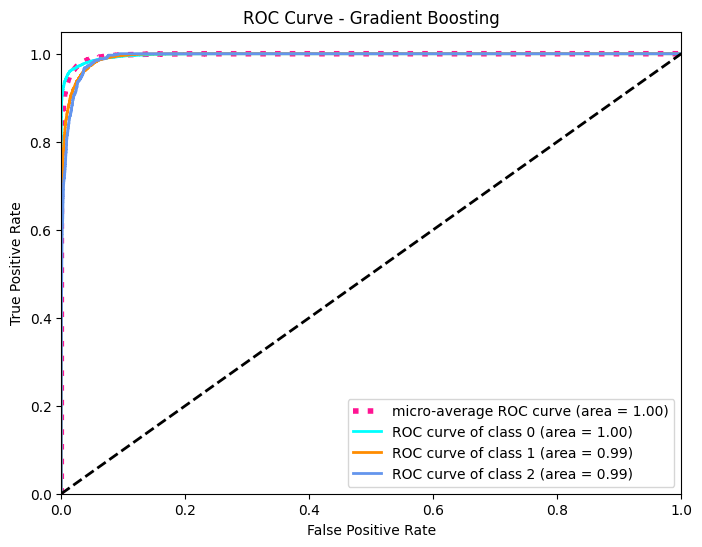

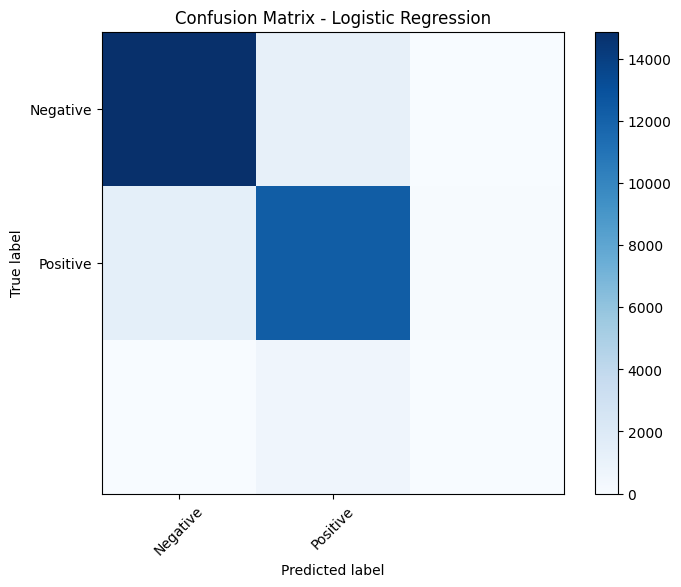

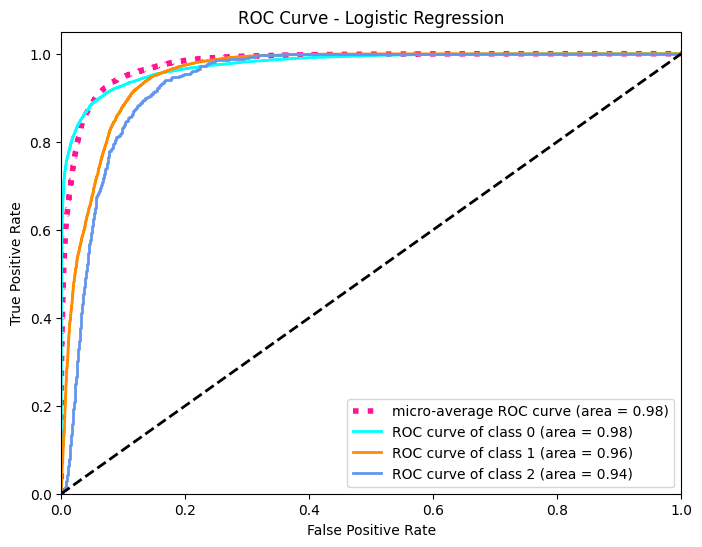

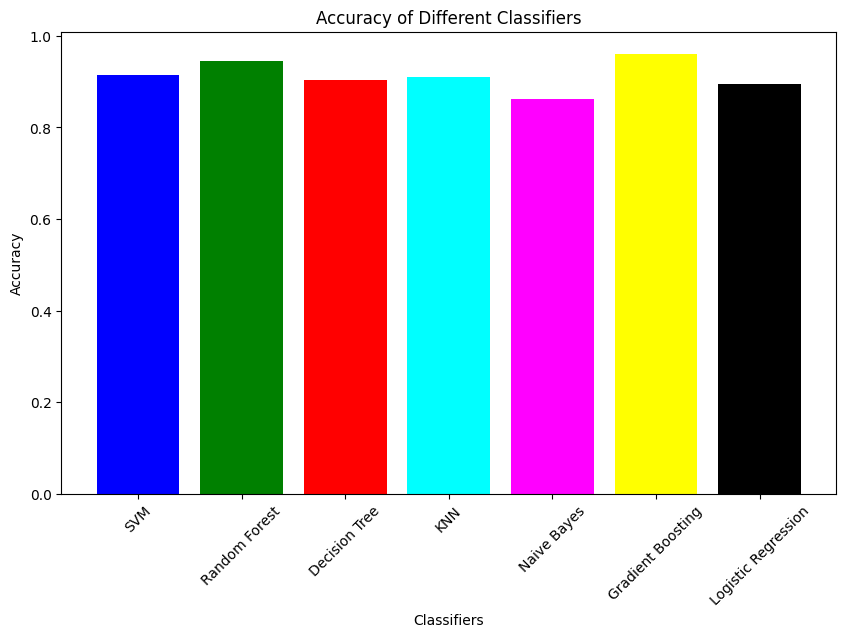

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store evaluation metrics for each classifier
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []
kappa_list = []
roc_auc_list = []
mcc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Precision, Recall, F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tp_list.append(np.diag(cm))
    tn_list.append(np.diag(cm[::-1, ::-1]))
    fp_list.append(np.sum(cm, axis=0) - tp_list[-1])
    fn_list.append(np.sum(cm, axis=1) - tp_list[-1])
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_list.append(kappa)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()
    classes = ["Negative", "Positive"]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    # Compute ROC curve and ROC area for each class
    y_prob = classifier.predict_proba(X_test)
    n_classes = len(classifier.classes_)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(np.eye(n_classes)[y_test].ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
    for i, color in zip(range(n_classes), cycle(['aqua', 'darkorange', 'cornflowerblue'])):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

# Plotting Accuracy Histogram
plt.figure(figsize=(10, 6))
classifiers_names = classifiers.keys()
plt.bar(classifiers_names, accuracy_list, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
plt.show()


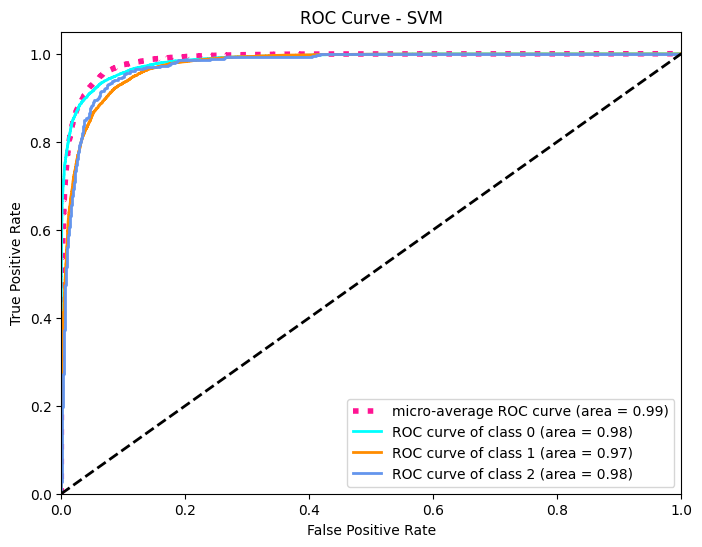

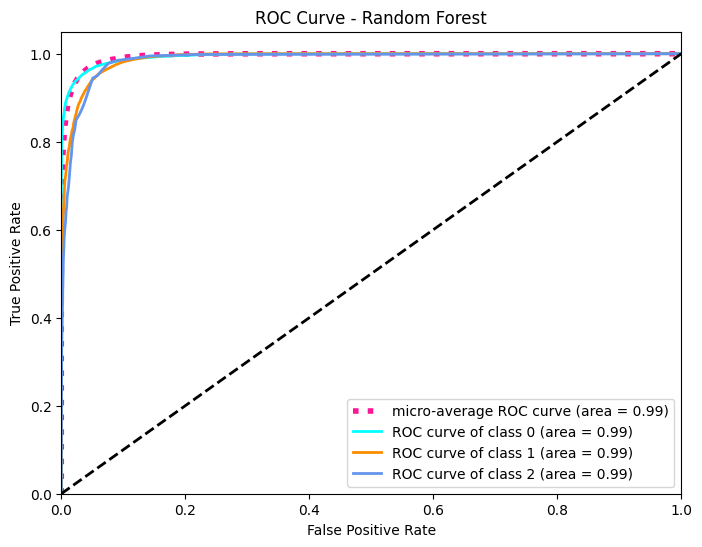

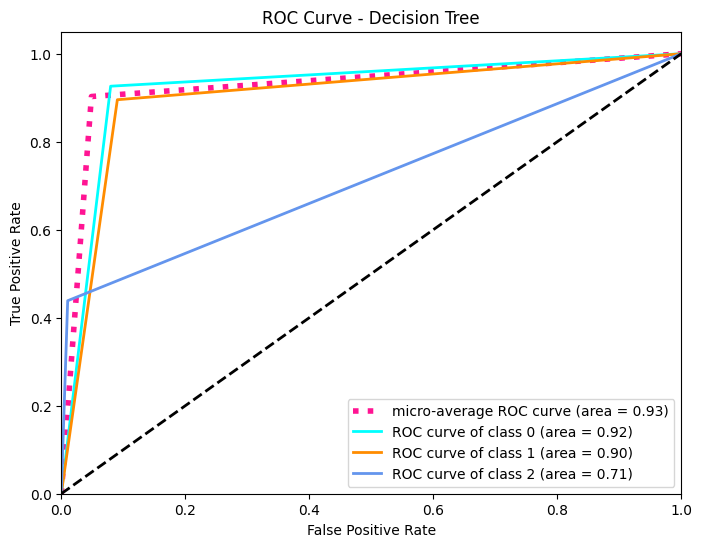

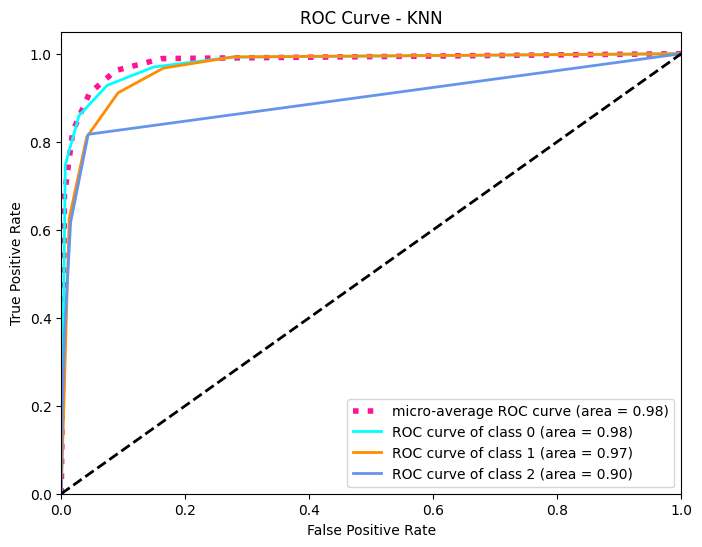

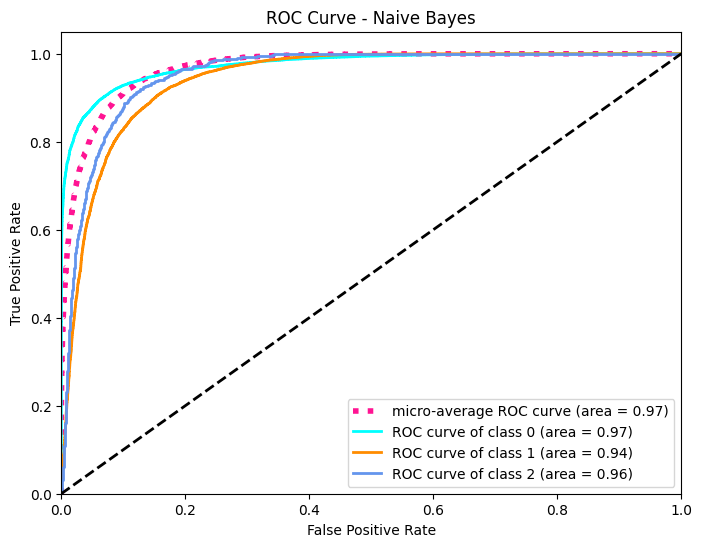

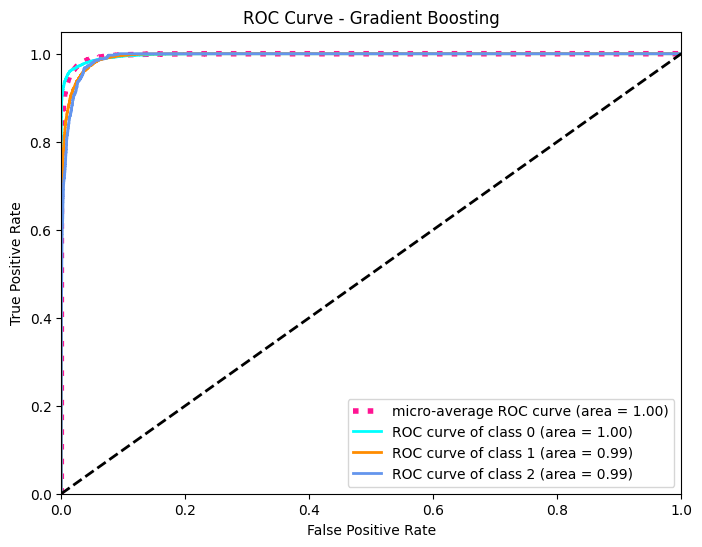

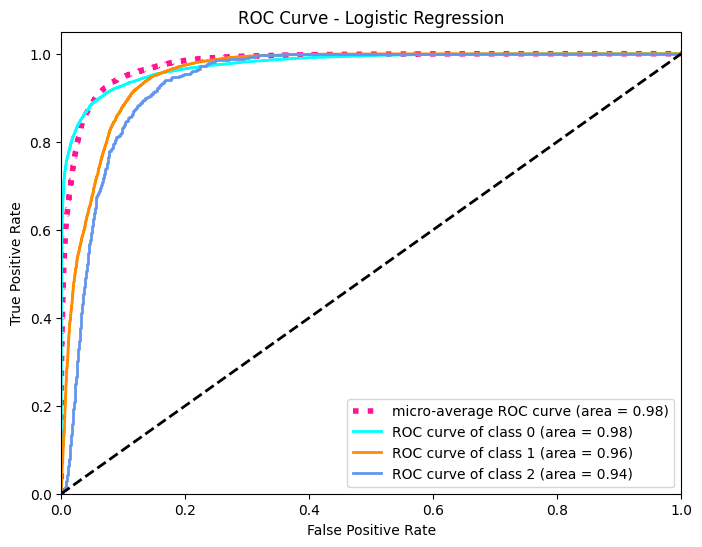

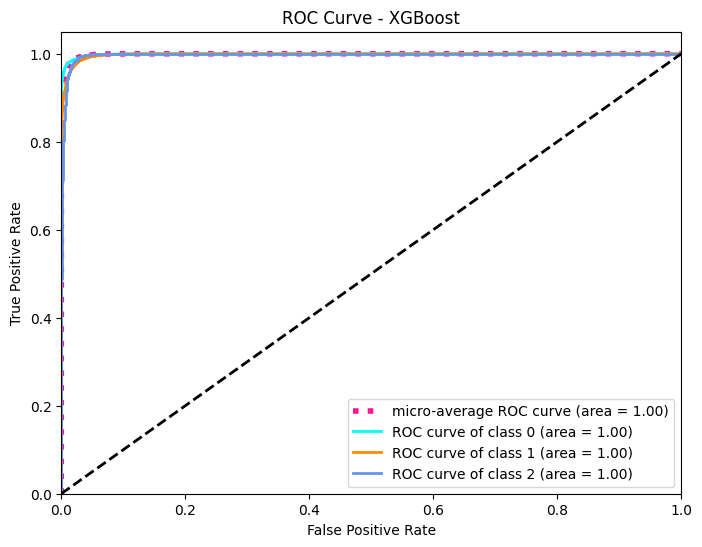

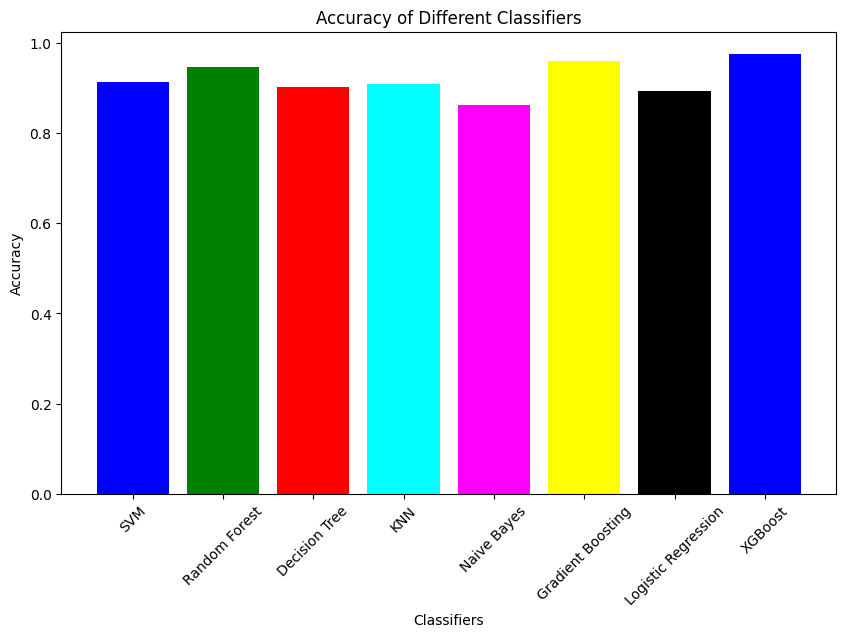

ValueError: All arrays must be of the same length

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from itertools import cycle

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store evaluation metrics for each classifier
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []
kappa_list = []
roc_auc_list = []
mcc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Precision, Recall, F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tp_list.append(np.diag(cm))
    tn_list.append(np.diag(cm[::-1, ::-1]))
    fp_list.append(np.sum(cm, axis=0) - tp_list[-1])
    fn_list.append(np.sum(cm, axis=1) - tp_list[-1])
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_list.append(kappa)
    
    # Compute ROC curve and ROC area for each class
    y_prob = classifier.predict_proba(X_test)
    n_classes = len(classifier.classes_)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(np.eye(n_classes)[y_test].ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
    for i, color in zip(range(n_classes), cycle(['aqua', 'darkorange', 'cornflowerblue'])):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_list.append(mcc)

# Plotting Accuracy Histogram
plt.figure(figsize=(10, 6))
classifiers_names = classifiers.keys()
plt.bar(classifiers_names, accuracy_list, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
plt.show()

# Convert lists to DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'TP': tp_list,
    'TN': tn_list,
    'FP': fp_list,
    'FN': fn_list,
    'Kappa': kappa_list,
    'ROC AUC': roc_auc_list,
    'MCC': mcc_list
})

print(metrics_df)


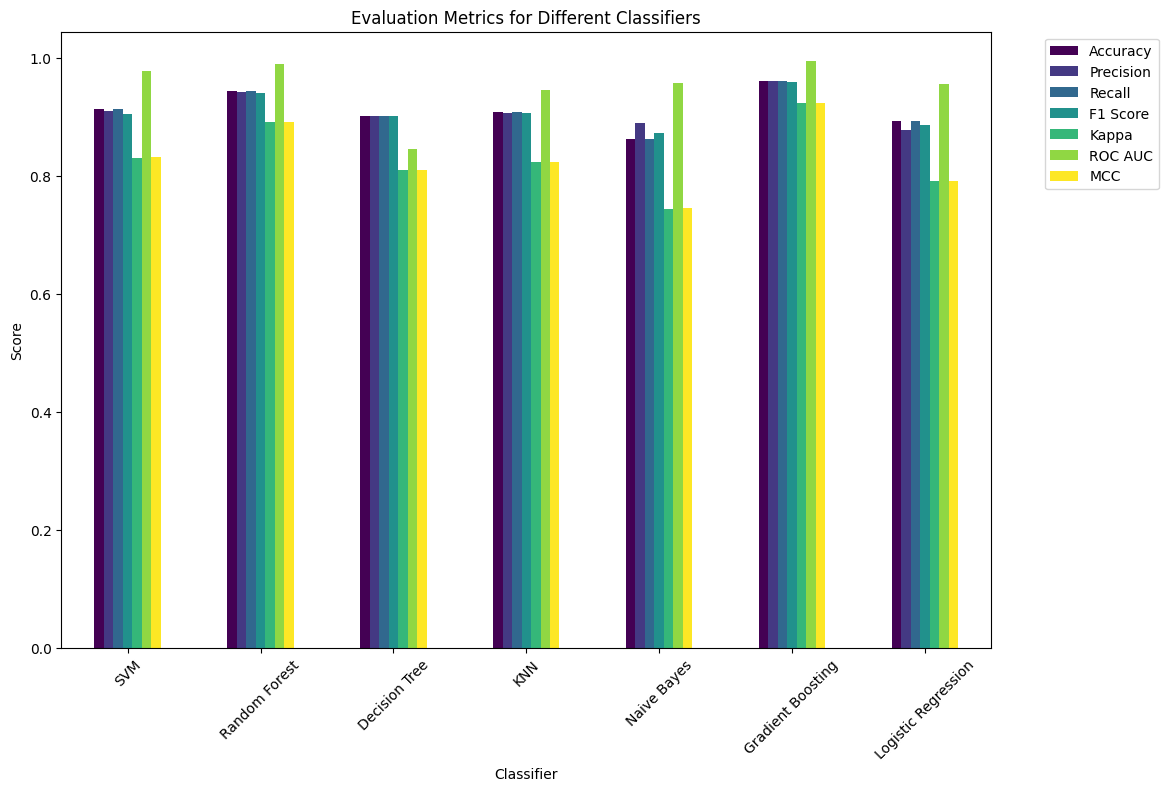

            Classifier  Accuracy  Precision    Recall  F1 Score  \
0                  SVM  0.914502   0.910405  0.914502  0.905876   
1        Random Forest  0.944560   0.943730  0.944560  0.941776   
2        Decision Tree  0.901926   0.901883  0.901926  0.901903   
3                  KNN  0.909498   0.907325  0.909498  0.907848   
4          Naive Bayes  0.862979   0.890802  0.862979  0.873465   
5    Gradient Boosting  0.960955   0.960828  0.960955  0.959359   
6  Logistic Regression  0.894156   0.878851  0.894156  0.886299   

                    TP                   TN                  FP  \
0    [15019, 12755, 4]    [4, 12755, 15019]      [957, 1638, 2]   
1  [15465, 13028, 198]  [198, 13028, 15465]      [656, 997, 31]   
2  [14885, 12252, 259]  [259, 12252, 14885]   [1144, 1505, 330]   
3  [14913, 12498, 215]  [215, 12498, 14913]   [1066, 1529, 154]   
4  [14785, 10997, 431]  [431, 10997, 14785]  [1265, 1444, 1453]   
5  [15636, 13272, 281]  [281, 13272, 15636]      [425, 741, 2

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store evaluation metrics for each classifier
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []
kappa_list = []
roc_auc_list = []
mcc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_list.append(precision)
    
    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_list.append(recall)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_score_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tp_list.append(np.diag(cm))
    tn_list.append(np.diag(cm[::-1, ::-1]))
    fp_list.append(np.sum(cm, axis=0) - tp_list[-1])
    fn_list.append(np.sum(cm, axis=1) - tp_list[-1])
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_list.append(kappa)
    
    # ROC AUC
    if len(classifier.classes_) == 2:  # Binary classification
        y_prob = classifier.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:  # Multi-class classification
        y_prob = classifier.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    roc_auc_list.append(roc_auc)
    
    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_list.append(mcc)

# Convert lists to DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'TP': tp_list,
    'TN': tn_list,
    'FP': fp_list,
    'FN': fn_list,
    'Kappa': kappa_list,
    'ROC AUC': roc_auc_list,
    'MCC': mcc_list
})

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Define bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")



# Apply bandpass filter to each column
for col in df123.columns:
    if col != "label":
        df123[col] = bandpass_filter(df123[col], lowcut=2, highcut=45, fs=1000)  # Adjust fs according to your sampling frequency

# Keep values between -45 and +45
df123 = df123.clip(lower=-45, upper=45)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers...
# Rest of your code...


             Fp1        Fp2        Fz         F3         F4         F7  \
0       9.662193   7.622425  1.965962  -4.957524  -5.858142  -2.802360   
1       6.596319   6.486828  4.302120  -4.940345  -4.022539  -3.533635   
2       4.558969   7.054800  7.259966  -4.188592  -1.330638  -3.489346   
3       5.121100   9.114088  7.999608  -3.707532  -1.181901  -2.085345   
4       7.128025  12.181034  7.540347  -3.382131  -2.061659  -0.344953   
...          ...        ...       ...        ...        ...        ...   
121495 -0.894065  -1.641048 -4.298911   2.686524   3.951741   5.823529   
121496 -0.598654  -0.099320 -2.537056   4.196800   6.113242   6.706574   
121497  1.019708   3.108053  1.068990   7.758027   9.714323   8.534701   
121498  2.193583   5.421213  4.291161  10.682675  12.910114  10.110996   
121499  0.351798   4.475214  2.437578   8.694924  12.148548   9.011306   

               F8        Cz         C3        C4      T7/T3      T8/T4  \
0       -0.590095  2.019577   4.64696

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Define bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Apply bandpass filter to each column
for col in df123.columns:
    if col != "label":
        df123[col] = bandpass_filter(df123[col], lowcut=2, highcut=45, fs=1000)  # Adjust fs according to your sampling frequency

# Keep values between -45 and +45
df123 = df123.clip(lower=-45, upper=45)

# Print the dataset
print(df123)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers...
# Rest of your code...


             Fp1       Fp2        Fz        F3        F4        F7        F8  \
0       2.586227  3.239815  5.136881  1.883467 -0.435649 -0.519952 -1.279481   
1       2.364121  3.608829  5.570297  2.003432 -0.433159 -0.276636 -1.348004   
2       2.124011  3.934769  5.957667  2.116938 -0.426414 -0.050904 -1.407245   
3       1.847069  4.177894  6.255816  2.213104 -0.417841  0.142385 -1.450841   
4       1.516806  4.304576  6.429084  2.283506 -0.408318  0.291098 -1.474568   
...          ...       ...       ...       ...       ...       ...       ...   
121495 -1.725604 -2.698235 -2.889125 -3.079981 -3.724197 -3.248094  1.984043   
121496 -1.408596 -1.990475 -2.003699 -2.445835 -3.034644 -2.952476  1.652370   
121497 -1.112664 -1.273609 -1.062469 -1.823693 -2.336932 -2.718924  1.189766   
121498 -0.836612 -0.559165 -0.087543 -1.215825 -1.638106 -2.534875  0.625572   
121499 -0.577497  0.142322  0.898158 -0.623631 -0.946158 -2.385769 -0.004992   

              Cz        C3        C4   

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.signal import butter, filtfilt

# Define bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Apply bandpass filter to each column
for col in df123.columns:
    if col != "label":
        df123[col] = bandpass_filter(df123[col], lowcut=2, highcut=45, fs=1000)  # Adjust fs according to your sampling frequency

# Keep values between -45 and +45
df123 = df123.clip(lower=-45, upper=45)

# Save the modified dataset to a new CSV file
df123.to_csv("filtered_dataset.csv", index=False)

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers...
# Rest of your code...


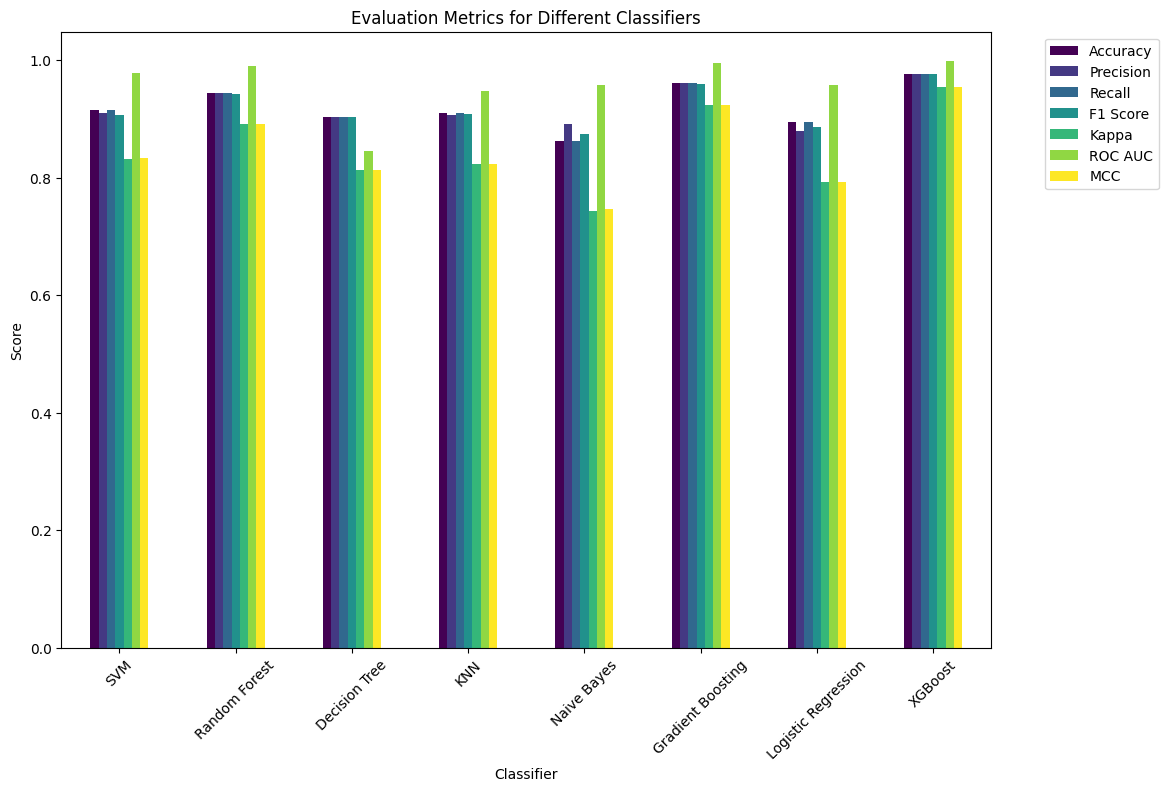

            Classifier  Accuracy  Precision    Recall  F1 Score  \
0                  SVM  0.914502   0.910405  0.914502  0.905876   
1        Random Forest  0.944527   0.943795  0.944527  0.941688   
2        Decision Tree  0.903407   0.902839  0.903407  0.903100   
3                  KNN  0.909498   0.907325  0.909498  0.907848   
4          Naive Bayes  0.862979   0.890802  0.862979  0.873465   
5    Gradient Boosting  0.960955   0.960828  0.960955  0.959359   
6  Logistic Regression  0.894156   0.878851  0.894156  0.886299   
7              XGBoost  0.976066   0.975759  0.976066  0.975602   

                    TP                   TN                  FP  \
0    [15019, 12755, 4]    [4, 12755, 15019]      [957, 1638, 2]   
1  [15452, 13043, 195]  [195, 13043, 15452]     [643, 1013, 29]   
2  [14880, 12310, 251]  [251, 12310, 14880]   [1119, 1517, 298]   
3  [14913, 12498, 215]  [215, 12498, 14913]   [1066, 1529, 154]   
4  [14785, 10997, 431]  [431, 10997, 14785]  [1265, 1444, 145

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store evaluation metrics for each classifier
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []
kappa_list = []
roc_auc_list = []
mcc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_list.append(precision)
    
    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_list.append(recall)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_score_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tp_list.append(np.diag(cm))
    tn_list.append(np.diag(cm[::-1, ::-1]))
    fp_list.append(np.sum(cm, axis=0) - tp_list[-1])
    fn_list.append(np.sum(cm, axis=1) - tp_list[-1])
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_list.append(kappa)
    
    # ROC AUC
    if len(classifier.classes_) == 2:  # Binary classification
        y_prob = classifier.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:  # Multi-class classification
        y_prob = classifier.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # One-vs-Rest strategy
    roc_auc_list.append(roc_auc)
    
    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_list.append(mcc)

# Convert lists to DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'TP': tp_list,
    'TN': tn_list,
    'FP': fp_list,
    'FN': fn_list,
    'Kappa': kappa_list,
    'ROC AUC': roc_auc_list,
    'MCC': mcc_list
})

# Plotting
metrics_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(metrics_df)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
roc_auc = roc_auc_score(y_test, y_prob[:, 1])


# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision, Recall, F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print("Confusion Matrix:")
    print(cm)
    print()
    
    # Compute ROC curve and ROC area for each class
    y_prob = classifier.predict_proba(X_test)
    n_classes = len(classifier.classes_)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(np.eye(n_classes)[y_test].ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
    for i, color in zip(range(n_classes), cycle(['aqua', 'darkorange', 'cornflowerblue'])):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()


ValueError: multi_class must be in ('ovo', 'ovr')

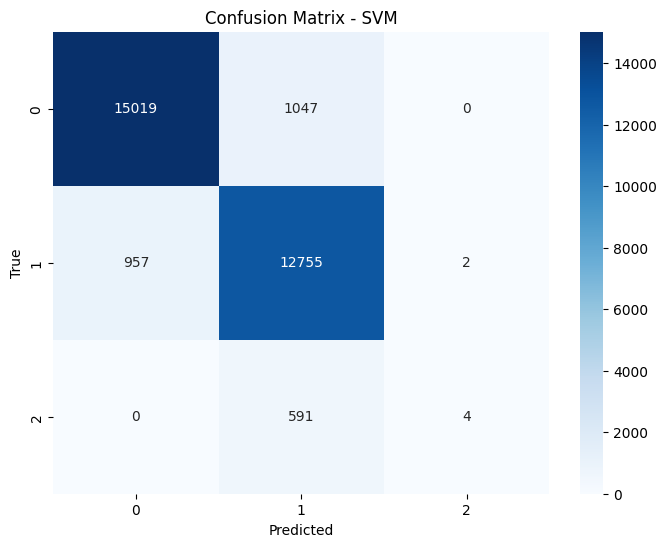

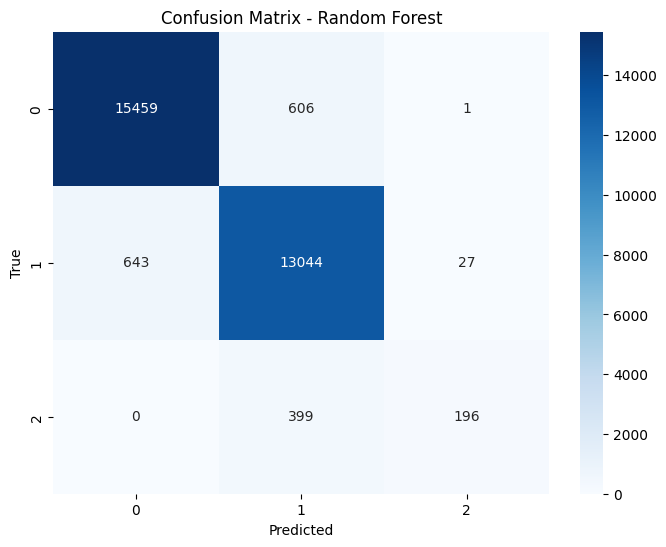

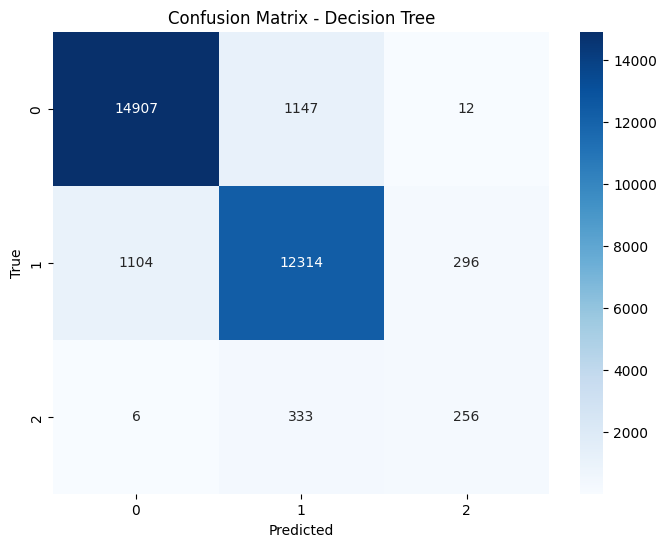

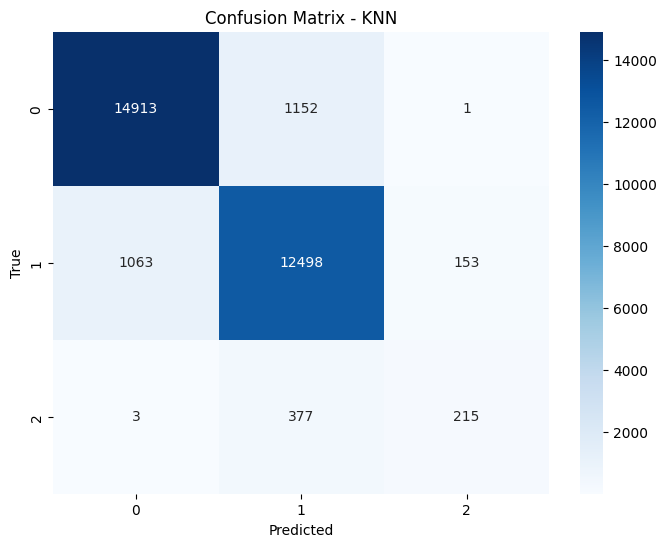

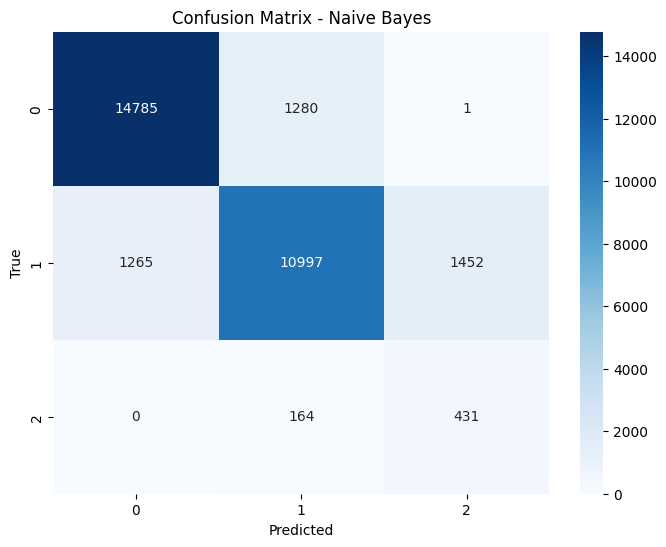

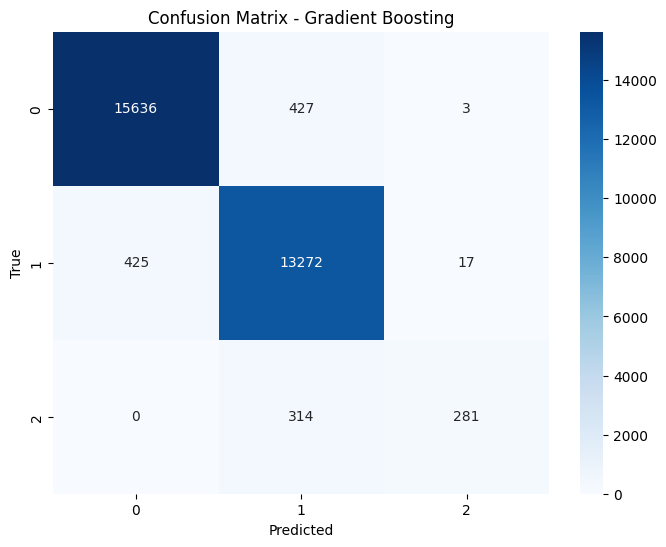

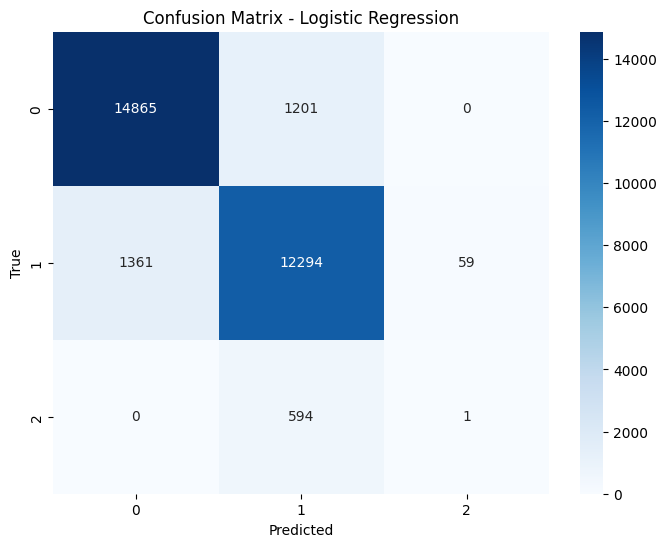

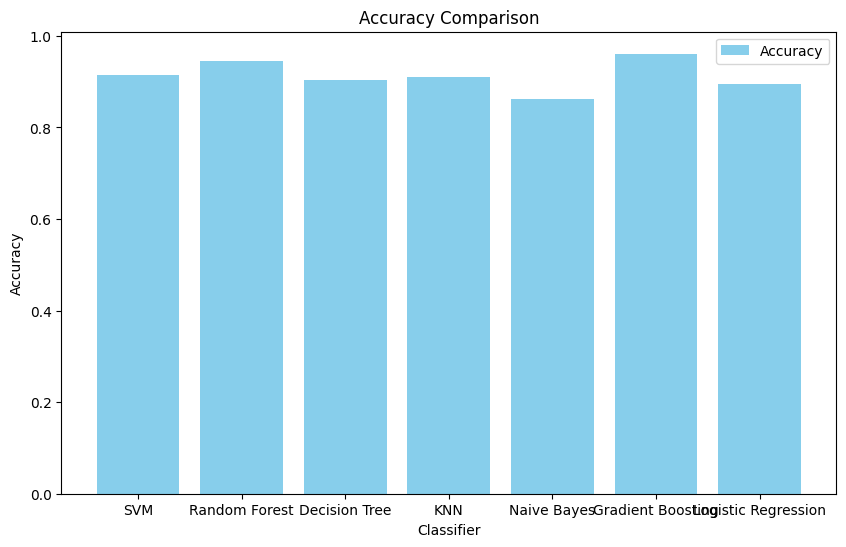

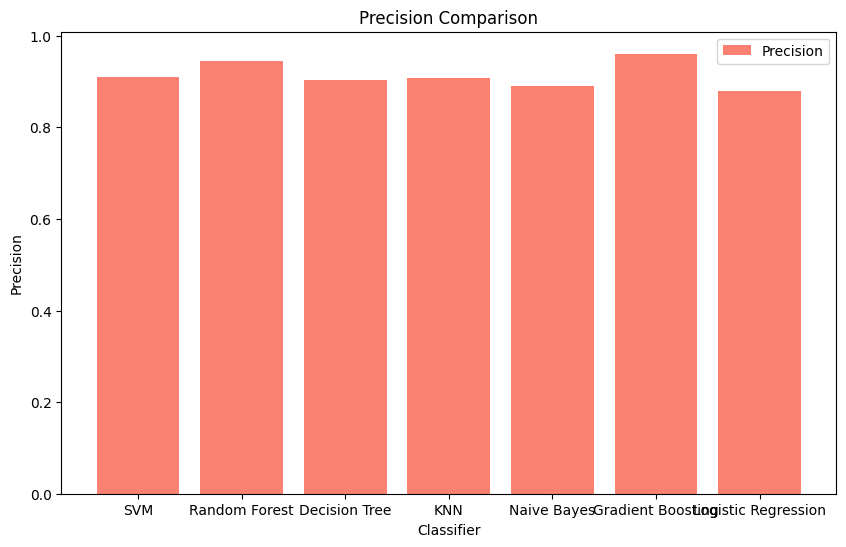

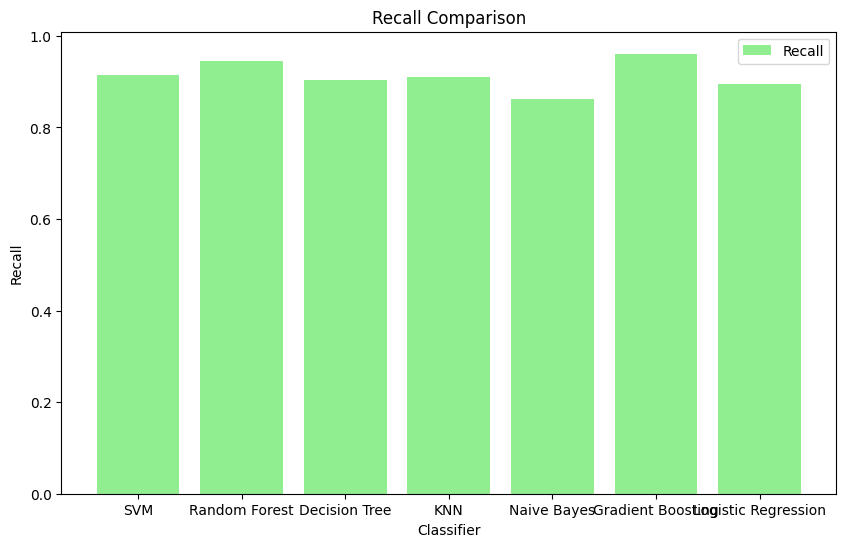

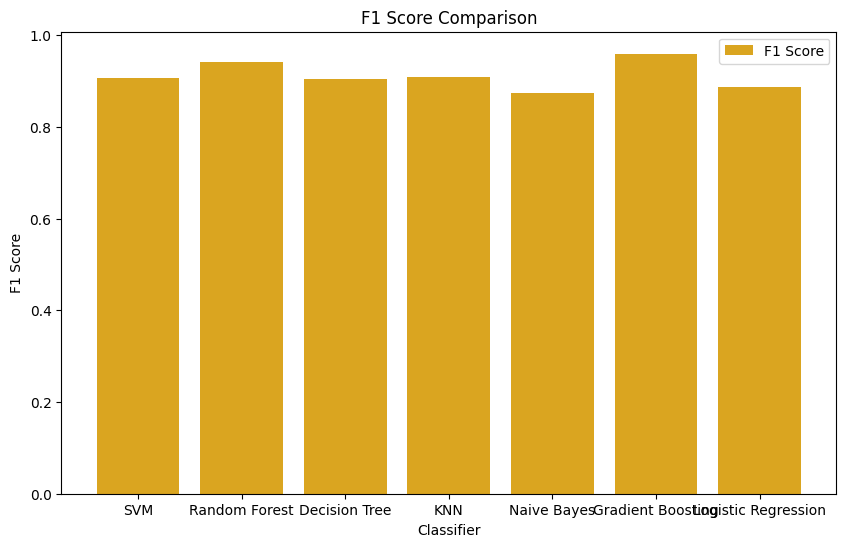

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store results for histogram
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Append to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot histograms
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracy_list, color='skyblue', label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), precision_list, color='salmon', label='Precision')
plt.ylabel('Precision')
plt.xlabel('Classifier')
plt.title('Precision Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), recall_list, color='lightgreen', label='Recall')
plt.ylabel('Recall')
plt.xlabel('Classifier')
plt.title('Recall Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), f1_list, color='goldenrod', label='F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Classifier')
plt.title('F1 Score Comparison')
plt.legend()
plt.show()


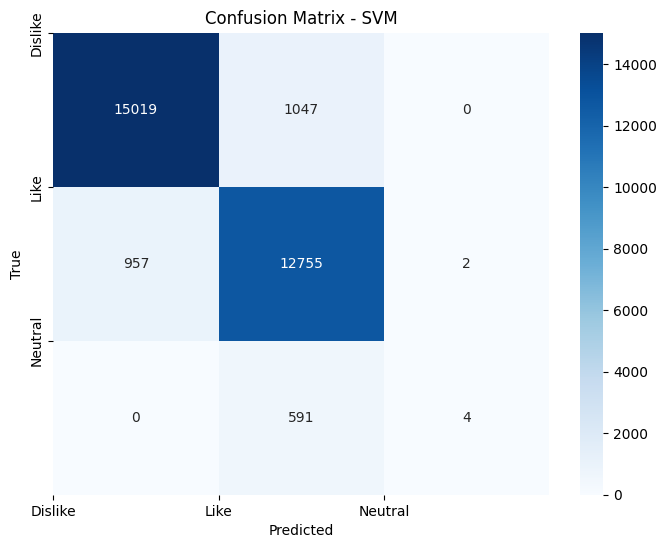

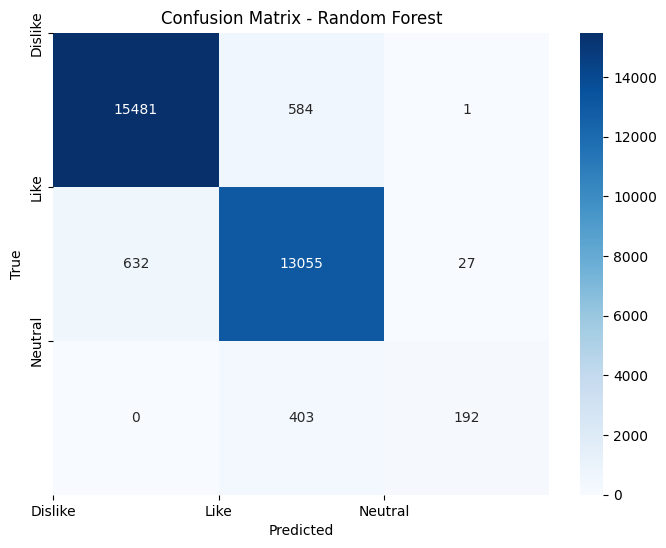

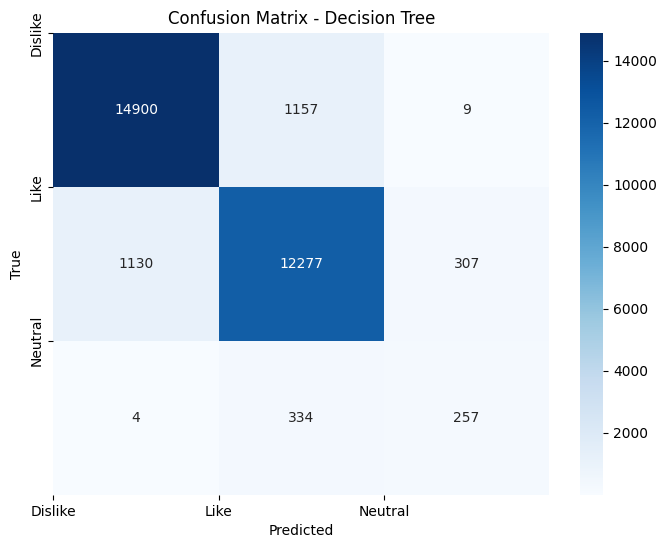

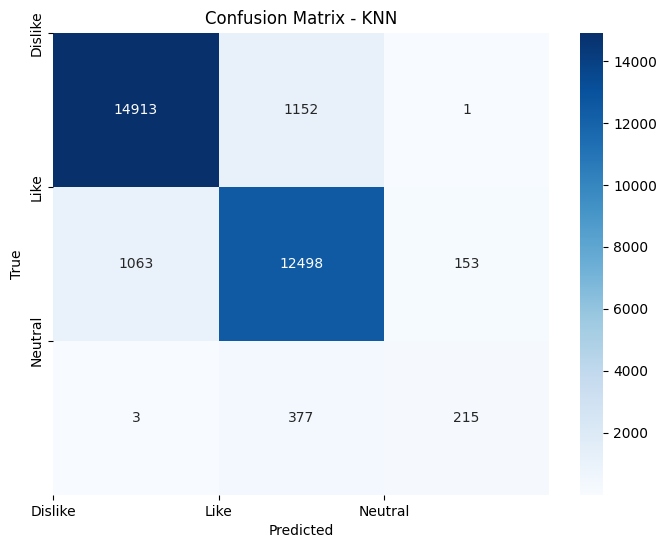

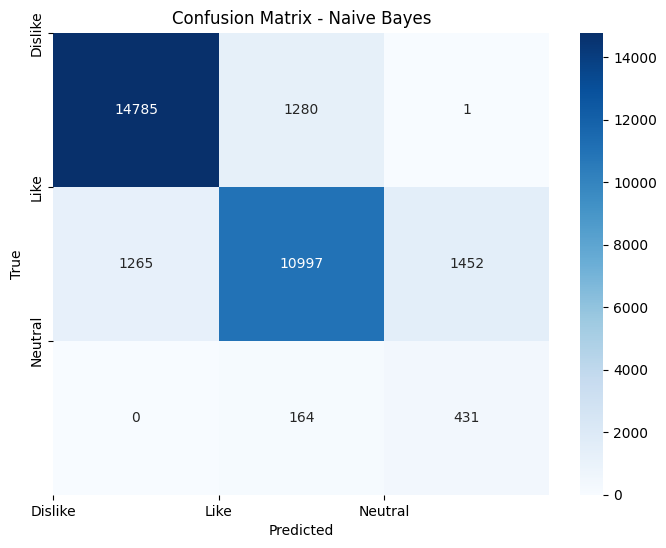

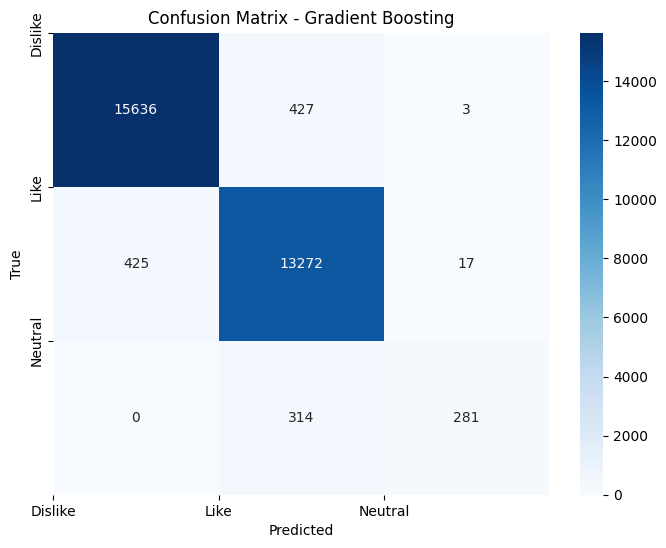

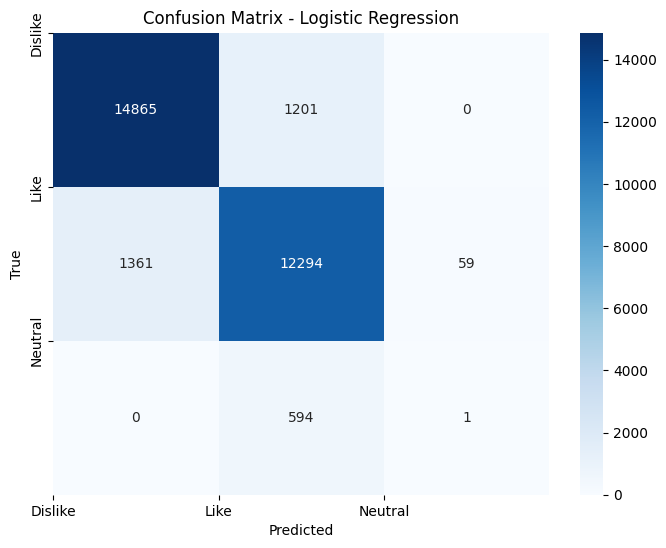

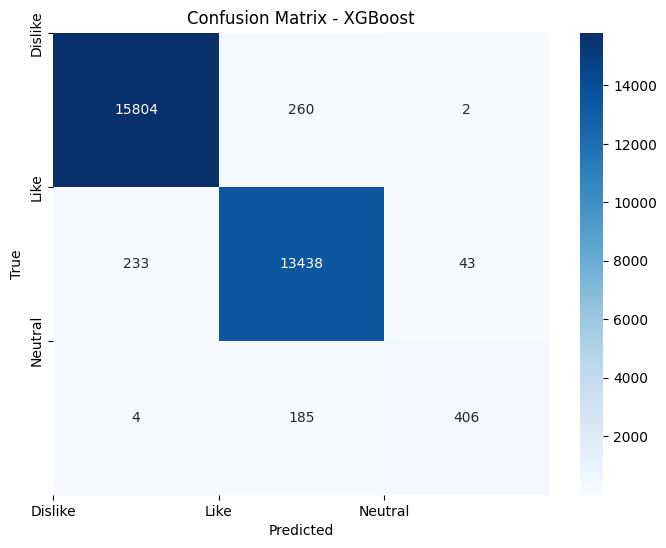

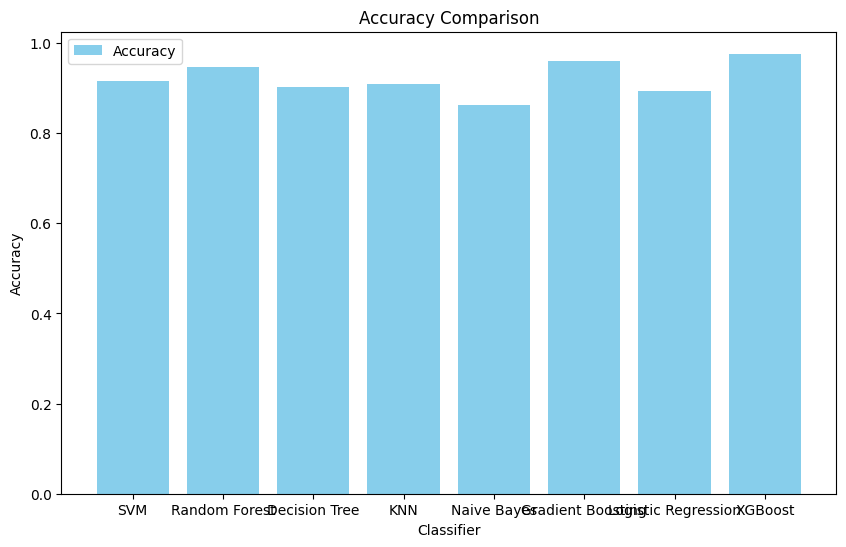

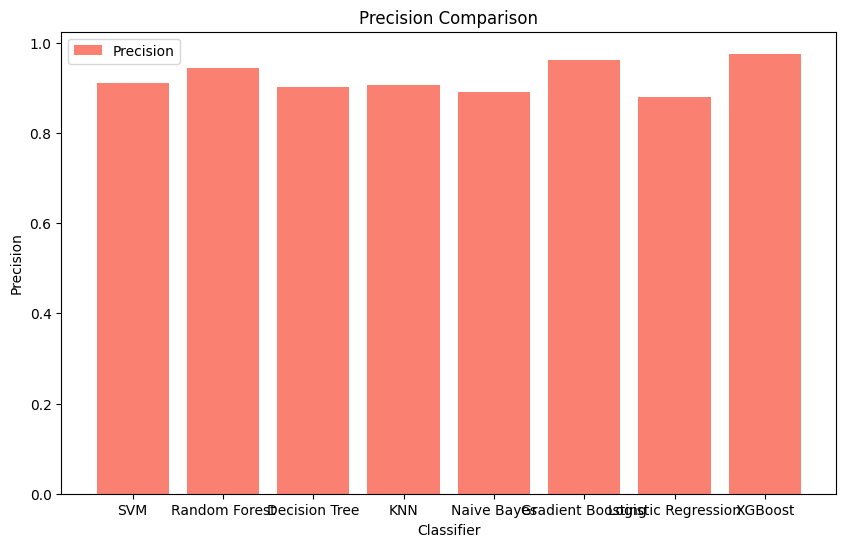

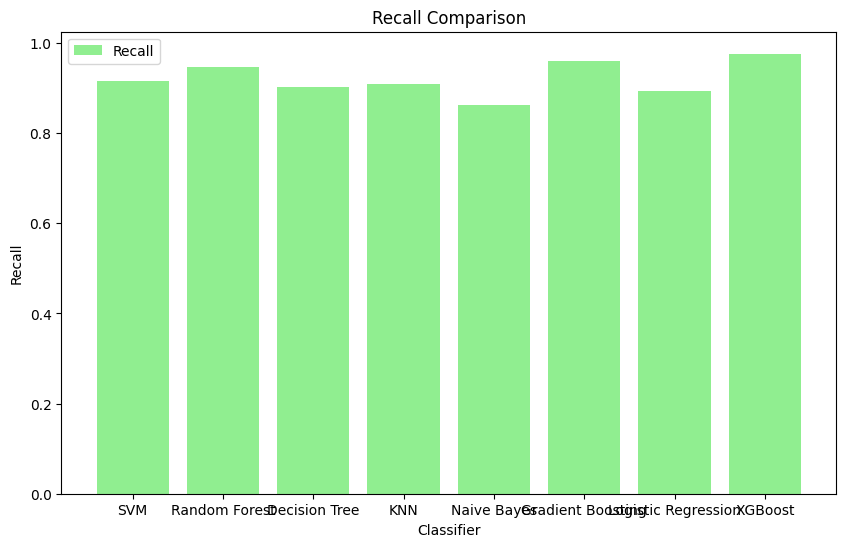

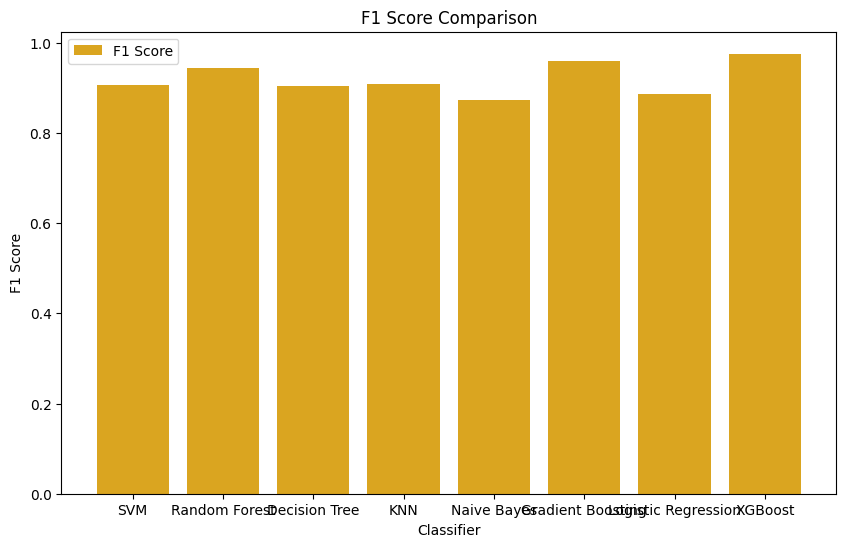

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store results for histogram
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Append to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Change labels
    tick_labels = ['Dislike', 'Like', 'Neutral']
    plt.xticks(np.arange(len(tick_labels)), tick_labels)
    plt.yticks(np.arange(len(tick_labels)), tick_labels)
    
    plt.show()

# Plot histograms
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracy_list, color='skyblue', label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), precision_list, color='salmon', label='Precision')
plt.ylabel('Precision')
plt.xlabel('Classifier')
plt.title('Precision Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), recall_list, color='lightgreen', label='Recall')
plt.ylabel('Recall')
plt.xlabel('Classifier')
plt.title('Recall Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), f1_list, color='goldenrod', label='F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Classifier')
plt.title('F1 Score Comparison')
plt.legend()
plt.show()


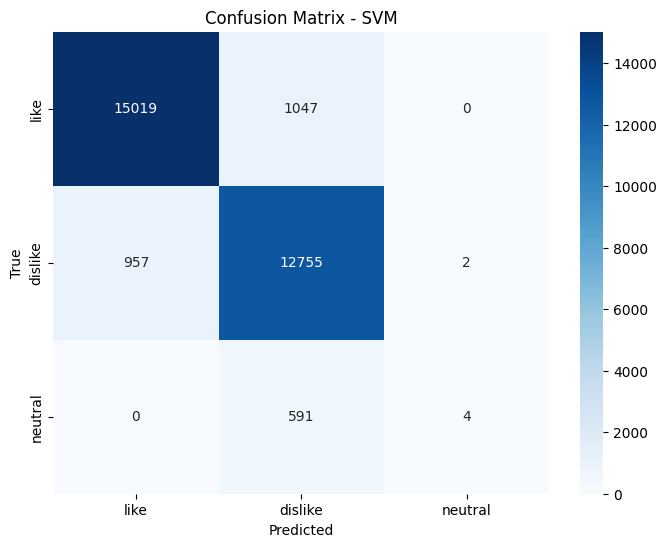

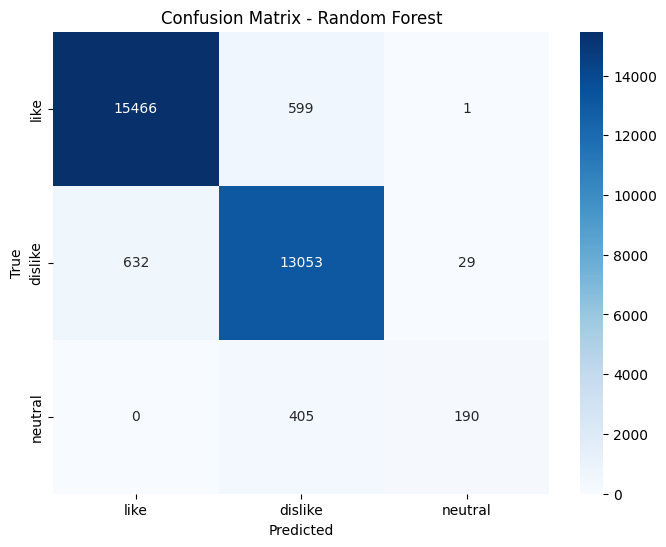

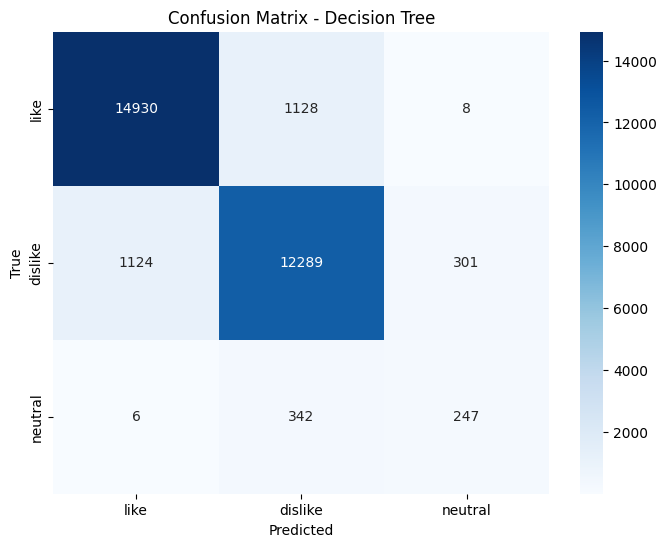

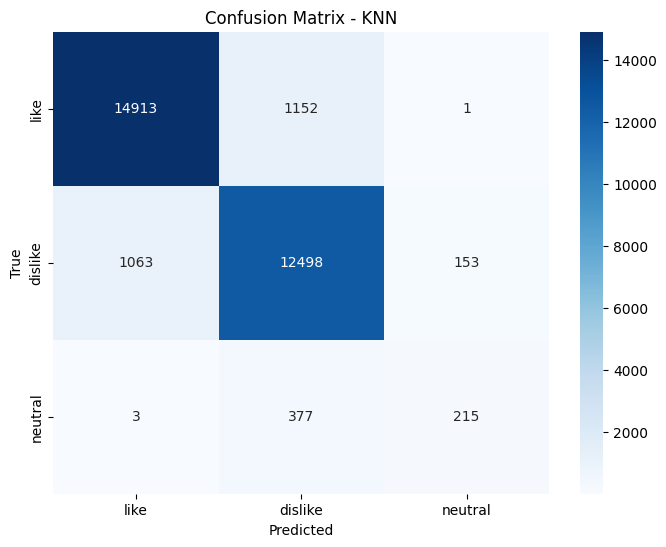

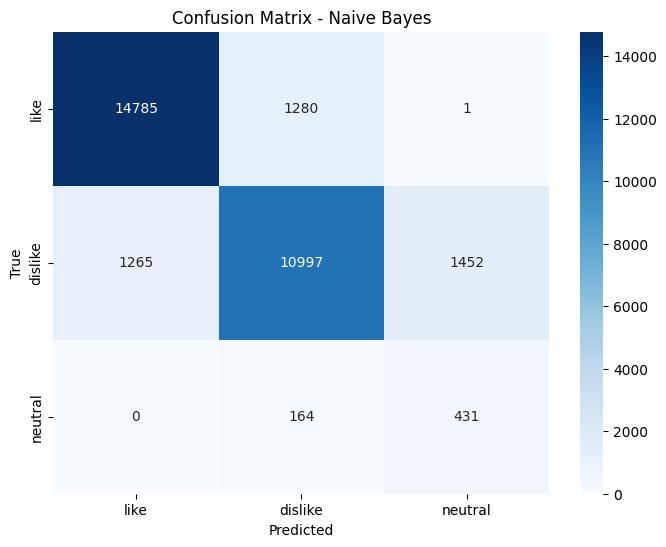

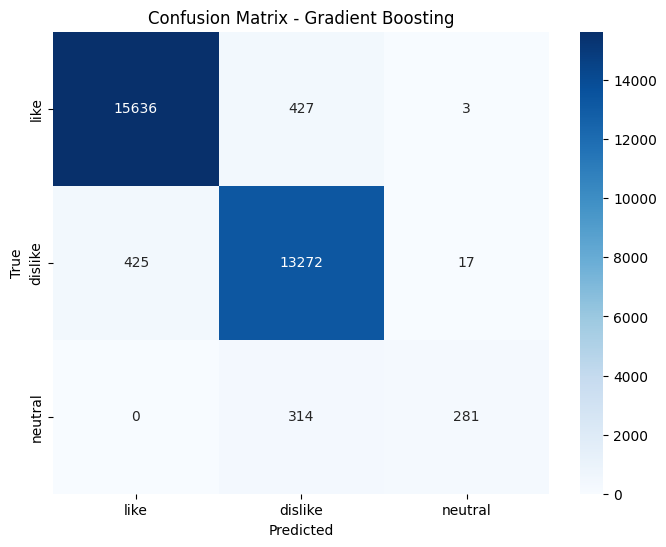

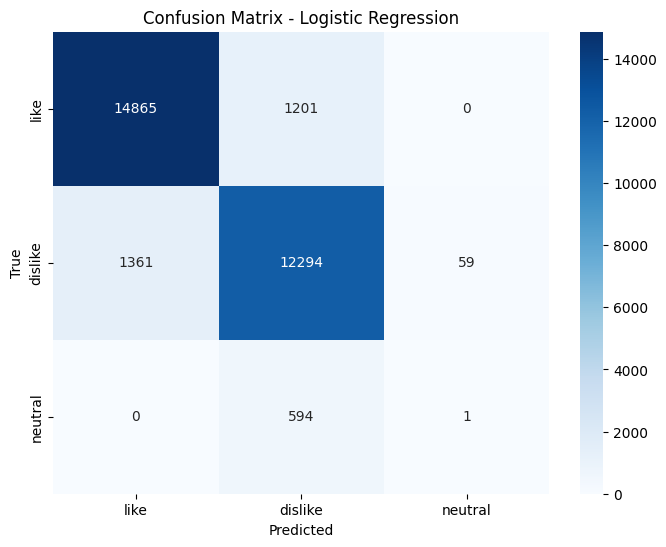

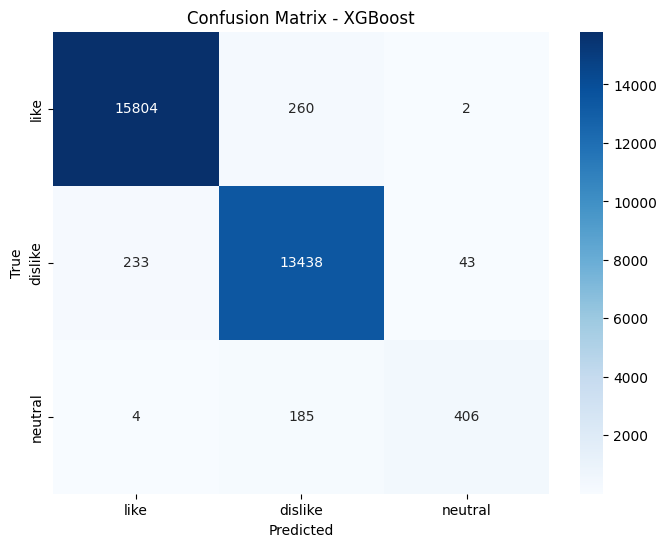

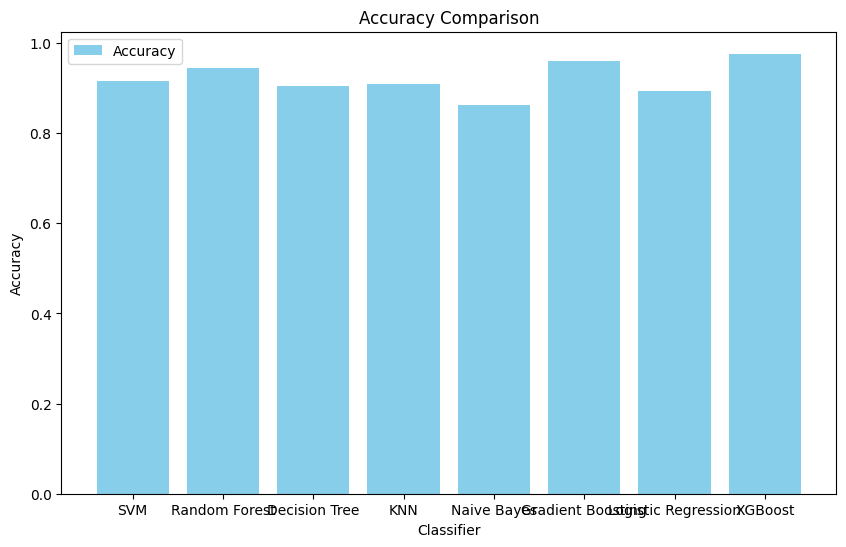

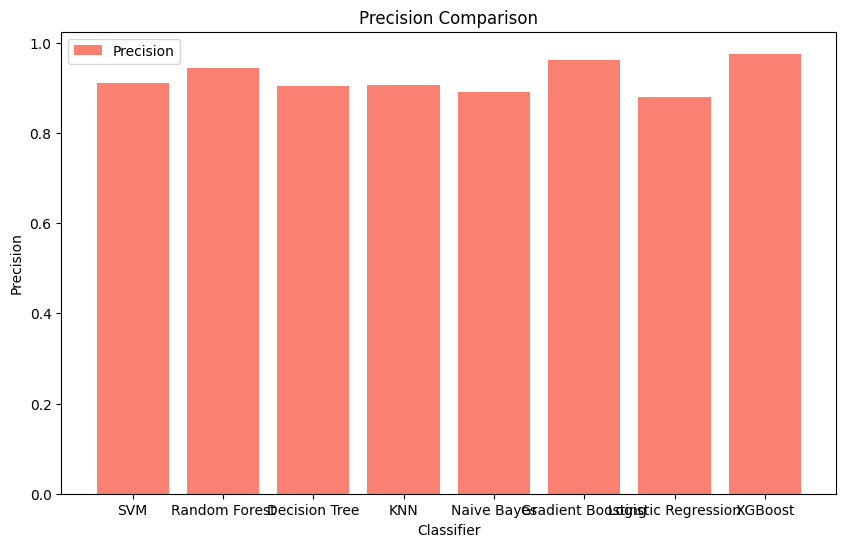

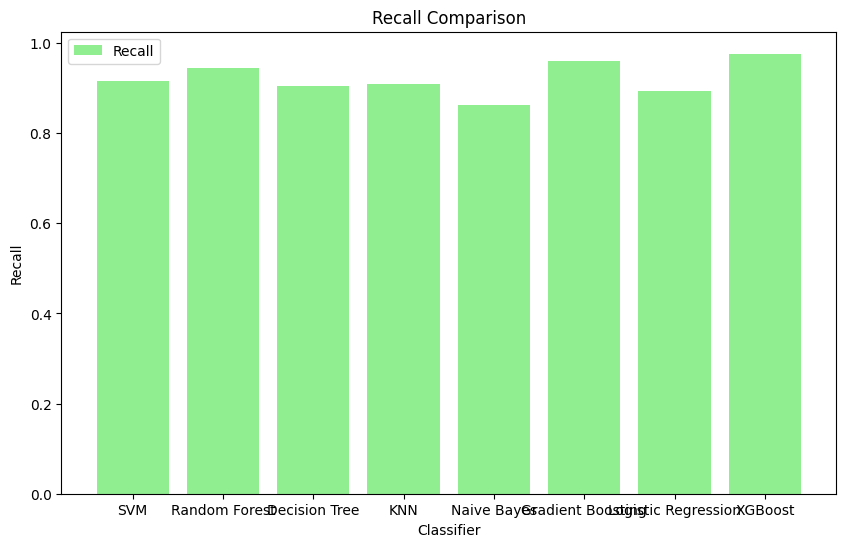

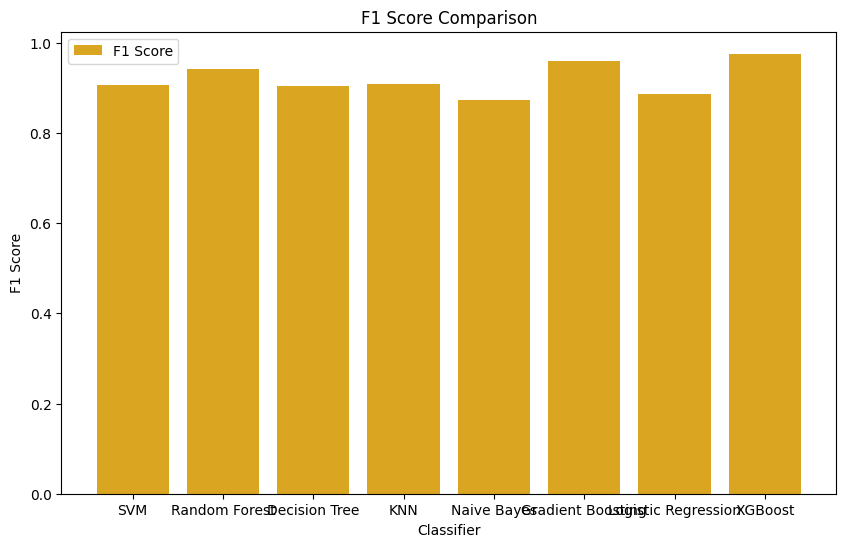

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store results for histogram
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Append to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['like', 'dislike', 'neutral'])
    plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['like', 'dislike', 'neutral'])
    plt.show()

# Plot histograms
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracy_list, color='skyblue', label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), precision_list, color='salmon', label='Precision')
plt.ylabel('Precision')
plt.xlabel('Classifier')
plt.title('Precision Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), recall_list, color='lightgreen', label='Recall')
plt.ylabel('Recall')
plt.xlabel('Classifier')
plt.title('Recall Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), f1_list, color='goldenrod', label='F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Classifier')
plt.title('F1 Score Comparison')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignals/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),  # Set probability=True for SVM
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Lists to store results for histogram
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Append to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['like', 'dislike', 'neutral'])
    plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['like', 'dislike', 'neutral'])
    plt.show()

# Plot histograms
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracy_list, color='skyblue', label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), precision_list, color='salmon', label='Precision')
plt.ylabel('Precision')
plt.xlabel('Classifier')
plt.title('Precision Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), recall_list, color='lightgreen', label='Recall')
plt.ylabel('Recall')
plt.xlabel('Classifier')
plt.title('Recall Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), f1_list, color='goldenrod', label='F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Classifier')
plt.title('F1 Score Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()


SVM Accuracy: 0.9144855967078189

Random Forest Accuracy: 0.9453909465020576

Decision Tree Accuracy: 0.9052674897119342

KNN Accuracy: 0.9142386831275721

Naive Bayes Accuracy: 0.8650205761316873

Gradient Boosting Accuracy: 0.9648971193415637

Logistic Regression Accuracy: 0.8983539094650206



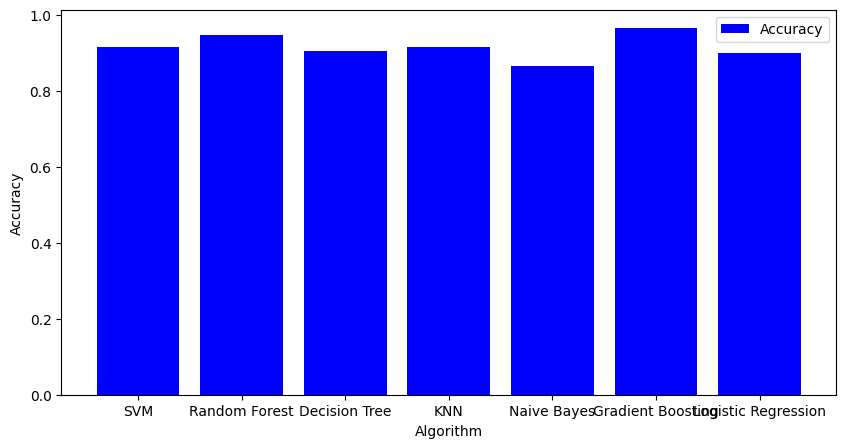

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy, precision, recall, and F1-Score values
accuracies = []
labels = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    labels.append(name)

    print(f"{name} Accuracy: {accuracy}\n")

# Plotting the histogram with distinct colors for each algorithm
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
ax1.bar(labels, accuracies, color='blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.legend()

plt.xlabel('Algorithm')
plt.show()


SVM Accuracy: 0.9119753086419753

Random Forest Accuracy: 0.915679012345679

Decision Tree Accuracy: 0.8735802469135803

KNN Accuracy: 0.9143621399176954

Naive Bayes Accuracy: 0.8898353909465021

Gradient Boosting Accuracy: 0.9067078189300412

Logistic Regression Accuracy: 0.898641975308642



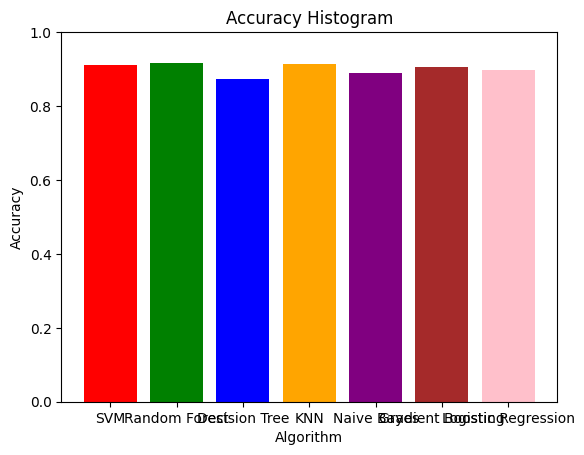

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy values and labels
accuracies = []
labels = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    labels.append(name)

    print(f"{name} Accuracy: {accuracy}\n")

# Plotting the histogram with distinct colors for each algorithm
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
plt.bar(labels, accuracies, color=colors)
plt.title('Accuracy Histogram')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_pca)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)


SVM Accuracy: 0.9119753086419753
SVM Confusion Matrix:
[[12015   872     0]
 [  796 10146     0]
 [    1   470     0]]


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_pca)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)


SVM Accuracy: 0.9119753086419753
SVM Confusion Matrix:
[[12015   872     0]
 [  796 10146     0]
 [    1   470     0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Metrics:
Accuracy: 0.9119753086419753
Precision: 0.8950253841025423
Recall: 0.9119753086419753
F1-Score: 0.9032545933344843

Random Forest Metrics:
Accuracy: 0.9165020576131687
Precision: 0.9155004047007506
Recall: 0.9165020576131687
F1-Score: 0.911777182300153

Decision Tree Metrics:
Accuracy: 0.8740740740740741
Precision: 0.8755214743025155
Recall: 0.8740740740740741
F1-Score: 0.8747652568379336

KNN Metrics:
Accuracy: 0.9143621399176954
Precision: 0.9121506982392956
Recall: 0.9143621399176954
F1-Score: 0.9125259042222779

Naive Bayes Metrics:
Accuracy: 0.8898353909465021
Precision: 0.872400258149862
Recall: 0.8898353909465021
F1-Score: 0.8808428477485108



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Metrics:
Accuracy: 0.9067078189300412
Precision: 0.9041885598940899
Recall: 0.9067078189300412
F1-Score: 0.8996738627044247

Logistic Regression Metrics:
Accuracy: 0.898641975308642
Precision: 0.8826904626492282
Recall: 0.898641975308642
F1-Score: 0.8905468721352896



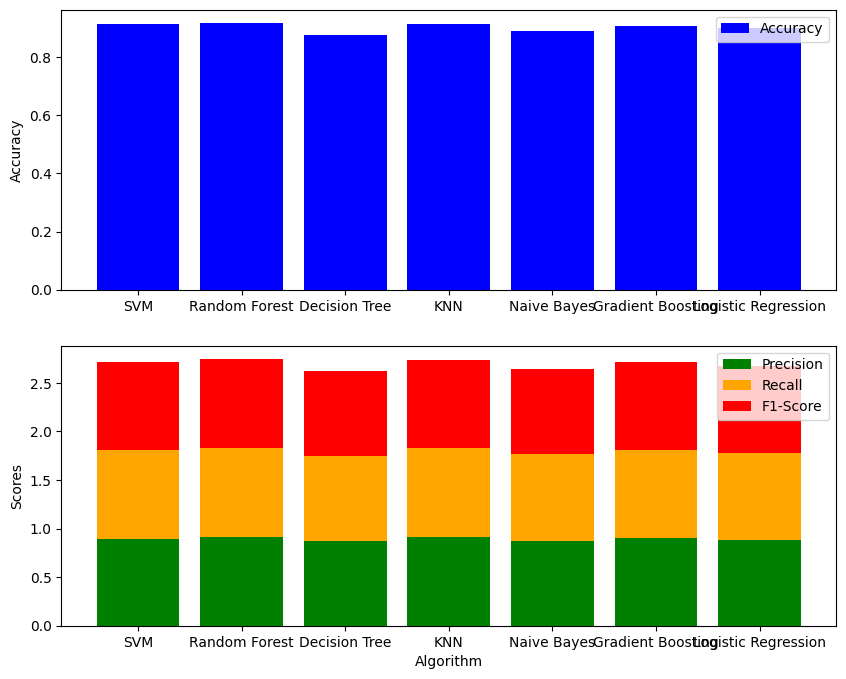

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy, precision, recall, and F1-Score values
accuracies = []
precisions = []
recalls = []
f1_scores = []
labels = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    labels.append(name)

    # Precision, Recall, F1-Score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}\n")

# Plotting the histogram with distinct colors for each algorithm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.bar(labels, accuracies, color='blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.bar(labels, precisions, color='green', label='Precision')
ax2.bar(labels, recalls, color='orange', label='Recall', bottom=precisions)
ax2.bar(labels, f1_scores, color='red', label='F1-Score', bottom=np.array(precisions) + np.array(recalls))
ax2.set_ylabel('Scores')
ax2.legend()

plt.xlabel('Algorithm')
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy, precision, recall, and F1-Score values
accuracies = []
precisions = []
recalls = []
f1_scores = []
labels = []

# Lists to store true positive rate, false negative rate, and ROC AUC
tpr_list = []
fpr_list = []
roc_auc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    y_proba = classifier.predict_proba(X_test_pca)[:, 1]

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    labels.append(name)

    # Precision, Recall, F1-Score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # True Positive Rate (Sensitivity), False Negative Rate
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    roc_auc_list.append(roc_auc)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"True Positive Rate (Sensitivity): {tpr[1]}")
    print(f"False Negative Rate: {1 - tpr[1]}")
    print(f"ROC AUC: {roc_auc}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}\n")

# Plotting the histogram with distinct colors for each algorithm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.bar(labels, accuracies, color='blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.bar(labels, precisions, color='green', label='Precision')
ax2.bar(labels, recalls, color='orange', label='Recall', bottom=precisions)
ax2.bar(labels, f1_scores, color='red', label='F1-Score', bottom=np.array(precisions) + np.array(recalls))
ax2.set_ylabel('Scores')
ax2.legend()

plt.xlabel('Algorithm')
plt.show()

# Plot ROC curves
plt.figure(figsize=(8, 8))
for i in range(len(classifiers)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'{labels[i]} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: multiclass format is not supported

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy, precision, recall, and F1-Score values
accuracies = []
precisions = []
recalls = []
f1_scores = []
labels = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    labels.append(name)

    # Precision, Recall, F1-Score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision (macro): {precision}")
    print(f"Recall (macro): {recall}")
    print(f"F1-Score (macro): {f1_score}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}\n")

# Plotting the histogram with distinct colors for each algorithm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.bar(labels, accuracies, color='blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.bar(labels, precisions, color='green', label='Precision')
ax2.bar(labels, recalls, color='orange', label='Recall', bottom=precisions)
ax2.bar(labels, f1_scores, color='red', label='F1-Score', bottom=np.array(precisions) + np.array(recalls))
ax2.set_ylabel('Scores')
ax2.legend()

plt.xlabel('Algorithm')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy, precision, recall, and F1-Score values
accuracies = []
precisions = []
recalls = []
f1_scores = []
labels = []

# Lists to store true positive rate, false negative rate, and ROC AUC
tpr_list = []
fpr_list = []
roc_auc_list = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    y_proba = classifier.predict_proba(X_test_pca)[:, 1]

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    labels.append(name)

    # Precision, Recall, F1-Score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # True Positive Rate (Sensitivity), False Negative Rate
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    roc_auc_list.append(roc_auc)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"ROC AUC: {roc_auc}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}\n")

# Plotting the histogram with distinct colors for each algorithm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.bar(labels, accuracies, color='blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.bar(labels, precisions, color='green', label='Precision')
ax2.bar(labels, recalls, color='orange', label='Recall', bottom=precisions)
ax2.bar(labels, f1_scores, color='red', label='F1-Score', bottom=np.array(precisions) + np.array(recalls))
ax2.set_ylabel('Scores')
ax2.legend()

plt.xlabel('Algorithm')
plt.show()

# Plot ROC curves
plt.figure(figsize=(8, 8))
for i in range(len(classifiers)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'{labels[i]} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Metrics:
Accuracy: 0.8986831275720165
Precision: 0.8834140171114366
Recall: 0.8986831275720165
F1-Score: 0.8902948231584987

Random Forest Metrics:
Accuracy: 0.8860493827160494
Precision: 0.8800105404266534
Recall: 0.8860493827160494
F1-Score: 0.8816531536241872

Decision Tree Metrics:
Accuracy: 0.8488888888888889
Precision: 0.8503017636936895
Recall: 0.8488888888888889
F1-Score: 0.8495790848988491

KNN Metrics:
Accuracy: 0.8866255144032922
Precision: 0.8801234722813177
Recall: 0.8866255144032922
F1-Score: 0.882189860010786

Naive Bayes Metrics:
Accuracy: 0.8902469135802469
Precision: 0.8729435458795035
Recall: 0.8902469135802469
F1-Score: 0.8815084609044844



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Metrics:
Accuracy: 0.8977366255144033
Precision: 0.8822707151984777
Recall: 0.8977366255144033
F1-Score: 0.8894684864294782

Logistic Regression Metrics:
Accuracy: 0.8959670781893004
Precision: 0.8802770056542145
Recall: 0.8959670781893004
F1-Score: 0.8879716511481435



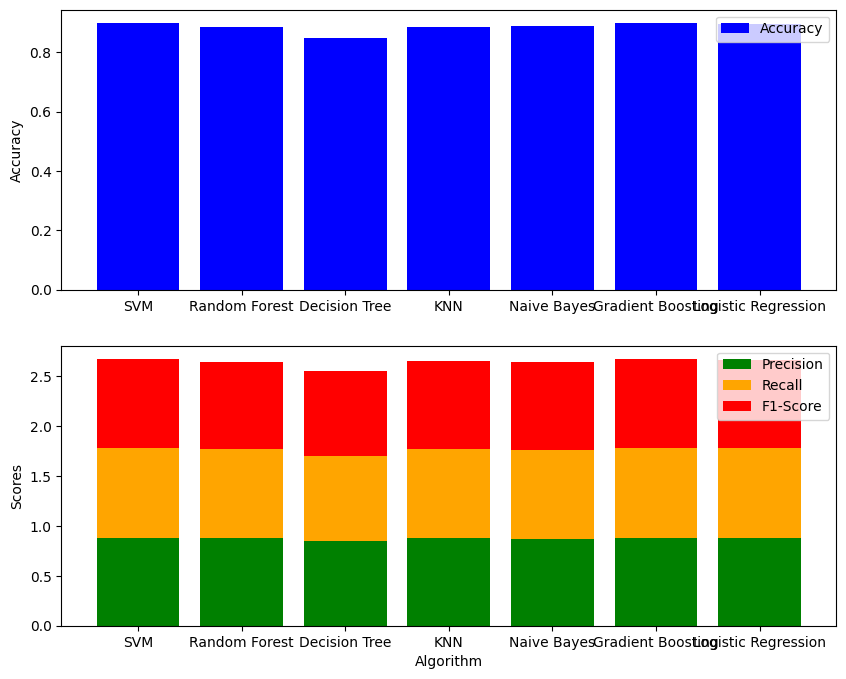

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Lists to store accuracy, precision, recall, and F1-Score values
accuracies = []
precisions = []
recalls = []
f1_scores = []
labels = []

# Loop through classifiers
for name, classifier in classifiers.items():
    # Train and evaluate each classifier
    classifier.fit(X_train_lda, y_train)
    y_pred = classifier.predict(X_test_lda)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    labels.append(name)

    # Precision, Recall, F1-Score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}\n")

# Plotting the histogram with distinct colors for each algorithm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.bar(labels, accuracies, color='blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.bar(labels, precisions, color='green', label='Precision')
ax2.bar(labels, recalls, color='orange', label='Recall', bottom=precisions)
ax2.bar(labels, f1_scores, color='red', label='F1-Score', bottom=np.array(precisions) + np.array(recalls))
ax2.set_ylabel('Scores')
ax2.legend()

plt.xlabel('Algorithm')
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv1D, LSTM

# Load the dataset
df = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for neural networks
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build Artificial Neural Network (ANN)
model_ann = keras.Sequential([
    Flatten(input_shape=(X_train.shape[1], 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate ANN
ann_accuracy = model_ann.evaluate(X_test_scaled, y_test)[1]
print(f"ANN Accuracy: {ann_accuracy}")

# Build Convolutional Neural Network (CNN)
model_cnn = keras.Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate CNN
cnn_accuracy = model_cnn.evaluate(X_test_scaled, y_test)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

# Build Deep Neural Network (DNN)
model_dnn = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate DNN
dnn_accuracy = model_dnn.evaluate(X_test_scaled, y_test)[1]
print(f"DNN Accuracy: {dnn_accuracy}")

# Build Recurrent Neural Network (RNN)
model_rnn = keras.Sequential([
    LSTM(32, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate RNN
rnn_accuracy = model_rnn.evaluate(X_test_scaled, y_test)[1]
print(f"RNN Accuracy: {rnn_accuracy}")


2024-02-04 11:50:15.009768: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 11:50:15.009869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 11:50:15.155273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10
3418/3418 [==============================] - 6s 2ms/step - loss: -1041658.8125 - accuracy: 0.4512 - val_loss: -3703096.2500 - val_accuracy: 0.4585
Epoch 2/10
3418/3418 [==============================] - 6s 2ms/step - loss: -11049431.0000 - accuracy: 0.4514 - val_loss: -20657862.0000 - val_accuracy: 0.4585
Epoch 3/10
3418/3418 [==============================] - 6s 2ms/step - loss: -37104324.0000 - accuracy: 0.4514 - val_loss: -55768552.0000 - val_accuracy: 0.4585
Epoch 4/10
3418/3418 [==============================] - 5s 2ms/step - loss: -84376280.0000 - accuracy: 0.4514 - val_loss: -114360360.0000 - val_accuracy: 0.4585
Epoch 5/10
3418/3418 [==============================] - 6s 2ms/step - loss: -157953232.0000 - accuracy: 0.4514 - val_loss: -201132736.0000 - val_accuracy: 0.4585
Epoch 6/10
3418/3418 [==============================] - 5s 2ms/step - loss: -262340640.0000 - accuracy: 0.4514 - val_loss: -320468544.0000 - val_accuracy: 0.4585
Epoch 7/10
3418/3418 [===============

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv1D, LSTM

# Load the dataset
df = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for neural networks
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build Artificial Neural Network (ANN)
model_ann = keras.Sequential([
    Flatten(input_shape=(X_train.shape[1], 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate ANN
ann_accuracy = model_ann.evaluate(X_test_scaled, y_test)[1]
print(f"ANN Accuracy: {ann_accuracy}")

# Build Convolutional Neural Network (CNN)
model_cnn = keras.Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate CNN
cnn_accuracy = model_cnn.evaluate(X_test_scaled, y_test)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

# Build Deep Neural Network (DNN)
model_dnn = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate DNN
dnn_accuracy = model_dnn.evaluate(X_test_scaled, y_test)[1]
print(f"DNN Accuracy: {dnn_accuracy}")

# Build Recurrent Neural Network (RNN)
model_rnn = keras.Sequential([
    LSTM(32, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate RNN
rnn_accuracy = model_rnn.evaluate(X_test_scaled, y_test)[1]
print(f"RNN Accuracy: {rnn_accuracy}")


2024-02-05 07:08:55.479748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 07:08:55.479950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 07:08:55.668774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10
3418/3418 [==============================] - 10s 3ms/step - loss: -1035988.3125 - accuracy: 0.4512 - val_loss: -3660456.0000 - val_accuracy: 0.4585
Epoch 2/10
3418/3418 [==============================] - 9s 3ms/step - loss: -10808231.0000 - accuracy: 0.4514 - val_loss: -20174174.0000 - val_accuracy: 0.4585
Epoch 3/10
3418/3418 [==============================] - 8s 2ms/step - loss: -36240896.0000 - accuracy: 0.4514 - val_loss: -54421688.0000 - val_accuracy: 0.4585
Epoch 4/10
3418/3418 [==============================] - 9s 3ms/step - loss: -82146760.0000 - accuracy: 0.4514 - val_loss: -111256776.0000 - val_accuracy: 0.4585
Epoch 5/10
3418/3418 [==============================] - 9s 3ms/step - loss: -153650992.0000 - accuracy: 0.4514 - val_loss: -195793008.0000 - val_accuracy: 0.4585
Epoch 6/10
3418/3418 [==============================] - 9s 3ms/step - loss: -255697104.0000 - accuracy: 0.4514 - val_loss: -312389088.0000 - val_accuracy: 0.4585
Epoch 7/10
3418/3418 [==============

SVM Accuracy: 0.9119753086419753
SVM Confusion Matrix:
[[12015   872     0]
 [  796 10146     0]
 [    1   470     0]]

Random Forest Accuracy: 0.9165020576131687
Random Forest Confusion Matrix:
[[12081   806     0]
 [  812 10105    25]
 [    1   385    85]]

Decision Tree Accuracy: 0.8741152263374485
Decision Tree Confusion Matrix:
[[11663  1221     3]
 [ 1204  9387   351]
 [    2   278   191]]

KNN Accuracy: 0.9143621399176954
KNN Confusion Matrix:
[[12050   837     0]
 [  844  9998   100]
 [    2   298   171]]

Naive Bayes Accuracy: 0.8898353909465021
Naive Bayes Confusion Matrix:
[[12088   799     0]
 [ 1407  9535     0]
 [    1   470     0]]

Gradient Boosting Accuracy: 0.9067078189300412
Gradient Boosting Confusion Matrix:
[[11946   941     0]
 [  872 10060    10]
 [    1   443    27]]



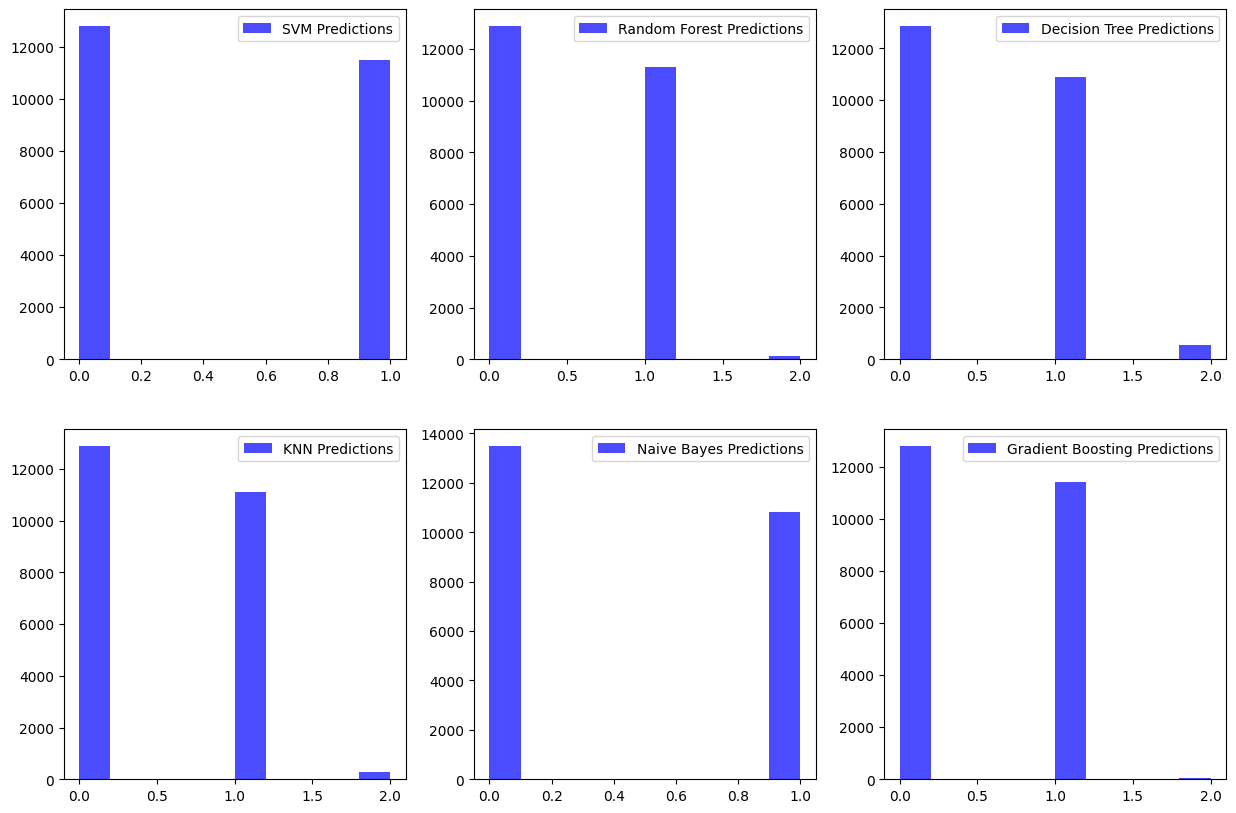

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for (name, classifier), ax in zip(classifiers.items(), axes.flatten()):
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:\n{cm}\n")

    # Plotting histogram with different color for each algorithm
    ax.hist(y_pred, alpha=0.7, label=f'{name} Predictions', color=plt.cm.get_cmap('viridis')(0.2))
    ax.legend()

plt.show()


SVM Confusion Matrix:
[[12015   872     0]
 [  796 10146     0]
 [    1   470     0]]

SVM Accuracy: 0.9119753086419753

Random Forest Confusion Matrix:
[[12068   819     0]
 [  811 10108    23]
 [    1   388    82]]

Random Forest Accuracy: 0.9159670781893005

Decision Tree Confusion Matrix:
[[11660  1225     2]
 [ 1206  9382   354]
 [    4   280   187]]

Decision Tree Accuracy: 0.8736213991769547

KNN Confusion Matrix:
[[12050   837     0]
 [  844  9998   100]
 [    2   298   171]]

KNN Accuracy: 0.9143621399176954

Naive Bayes Confusion Matrix:
[[12088   799     0]
 [ 1407  9535     0]
 [    1   470     0]]

Naive Bayes Accuracy: 0.8898353909465021

Gradient Boosting Confusion Matrix:
[[11946   941     0]
 [  872 10060    10]
 [    1   443    27]]

Gradient Boosting Accuracy: 0.9067078189300412



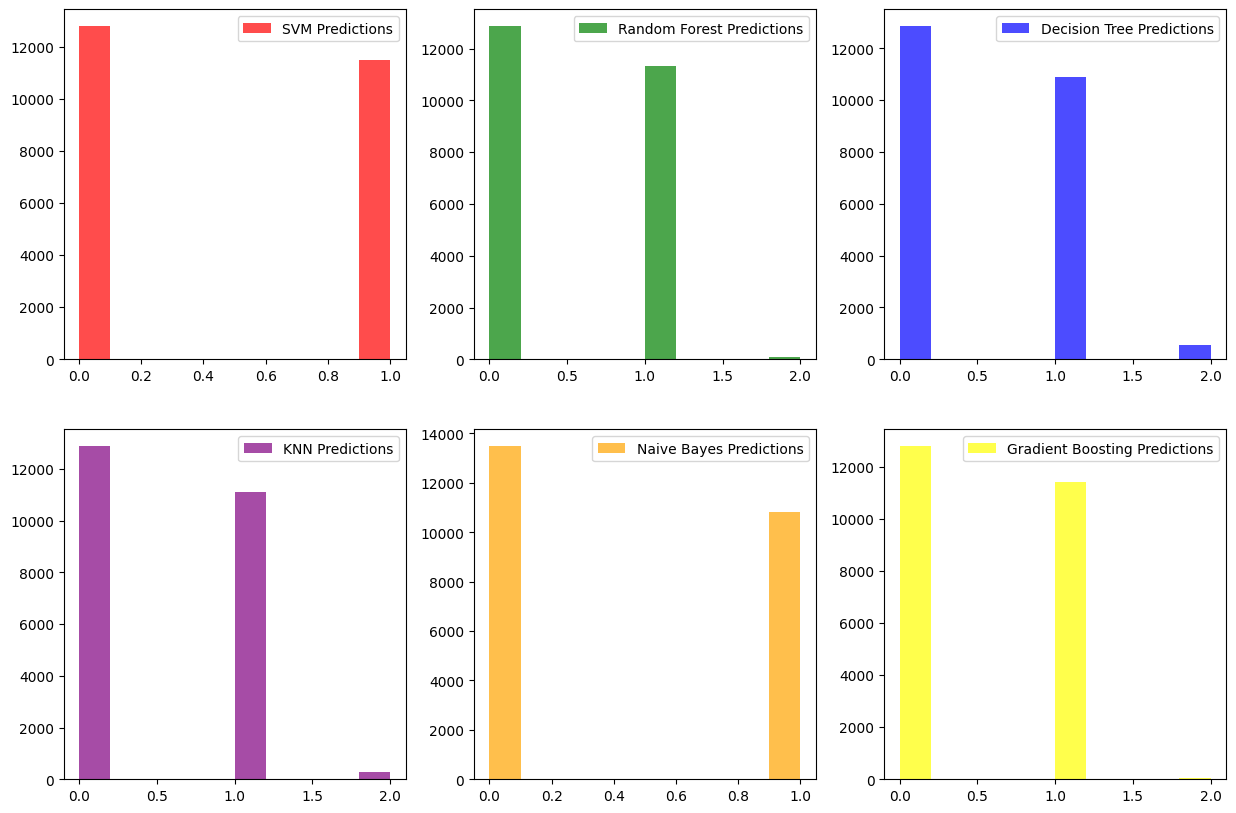

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df123 = pd.read_csv("/kaggle/input/brainsignal-s02/bc1.csv")

# Separate features and labels
X = df123.drop("label", axis=1)
y = df123["label"]

# Encode labels to numerical values (if they are not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Colors for histograms
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow']

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for (name, classifier), ax, color in zip(classifiers.items(), axes.flatten(), colors):
    # Train and evaluate each classifier
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:\n{cm}\n")

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}\n")

    # Plotting histogram with different color for each algorithm
    ax.hist(y_pred, alpha=0.7, label=f'{name} Predictions', color=color)
    ax.legend()

plt.show()
